In [2]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

df_film = pd.read_excel('D:/works/paper1/my_works/Experimental Data.xlsx', sheet_name='20241002Film')

df_film.columns = ['Experiment Condition', 'E-81 amount [g]', 'Vacuum distillation time [min]', 'Curing agent amount [%]', 
                   'Thickness [um]', 'Curing power1 [%]', 'Curing power2 [%]', 'Distance [cm]', 
                   'Time1 [s]', 'Time2 [s]', 'Notes']

f_film = pd.concat([df_film], ignore_index=True)


df_film['Notes'] = df_film['Notes'].replace({'A': 1, 'B': 0, 'C': 0})


df_film


Experiment Condition  E-81 amount [g]  Vacuum distillation time [min]  \
0                      1               30                             180   
1                      2               30                             300   
2                      3               10                              60   
3                      4               10                             300   
4                      5               40                             240   
5                      6               50                             300   
6                      7               10                              60   
7                      8               30                             180   
8                      9               40                             240   
9                     10               50                             300   
10                    11               10                              60   
11                    12               30                              60   
12                    13               40                             240   
13                    14               50                             300   
14                    15               30                             180   
15                    16               10                              60   
16                    17               10                              60   
17                    18               40                             240   
18                    19               40                             240   
19                    20               10                              60   

    Curing agent amount [%]  Thickness [um]  Curing power1 [%]  \
0                       2.0             400                 20   
1                       4.5             400                 10   
2                       4.5             400                 50   
3                       4.5             400                 10   
4                       3.0             400                 20   
5                       4.0             600                 10   
6                       4.5             400                 10   
7                       2.0             600                 20   
8                       3.0             400                 40   
9                       4.0             600                 10   
10                      4.5             800                 10   
11                      4.5             800                 10   
12                      3.0             800                 10   
13                      4.0             800                 10   
14                      2.0             800                 20   
15                      4.5             400                 50   
16                      4.5             800                 50   
17                      3.0             600                 10   
18                      3.0             800                 10   
19                      4.5             400                 10   

    Curing power2 [%]  Distance [cm]  Time1 [s]  Time2 [s]  Notes  
0                  80             12          4          6      1  
1                  80             18          1          9      1  
2                  60             18          1          9      1  
3                  80             18          1          9      1  
4                  90              6          2          8      1  
5                 100              6          2          8      0  
6                 100             12          2          8      1  
7                  90             18          2          8      1  
8                  70             12          3          7      1  
9                  80              6          2          8      1  
10                 80             18          1          9      1  
11                 80             18          1          9      1  
12                 80             18          1          9      0  
13                 80             18          1

In [7]:
df_PreData = pd.read_excel('D:/works/paper1/my_works/Experimental Data.xlsx', sheet_name='PreData')
print(df_PreData.columns)
df_PreData.columns = ['Experiment Condition', 'E-81 amount [g]','Vacuum distillation time [min]',
                    'Curing agent amount [%]', 'Thickness [um]', 'Curing power1 [%]', 
                     'Curing power2 [%]', 'Distance [cm]', 'Time1 [s]', 'Time2 [s]', 
                      'Transmittance [%]']
df_PreData

Index(['Experiment Condition', 'GQDs-30 amount/g',
       'Vacuum distillation time/min', 'Curing agent amount/%', 'Thickness/um',
       'Curing power1/%', 'Curing power2/%', 'Distance/cm', 'Time1/s',
       'Time2/s', 'Transmittance/%'],
      dtype='object')


Experiment Condition  E-81 amount [g]  Vacuum distillation time [min]  \
0                      1               10                               5   
1                      2               10                              15   
2                      3               10                              25   
3                      4               10                              60   
4                      5               10                             120   
5                      6               10                             180   
6                      7               10                             240   
7                      8               20                              10   
8                      9               20                              20   
9                     10               20                              30   
10                    11               20                              40   
11                    12               20                              50   
12                    13               20                              60   
13                    14               20                             120   
14                    15               30                               5   
15                    16               30                              10   
16                    17               30                              15   
17                    18               30                              20   
18                    19               30                              25   
19                    20               30                              30   
20                    21               30                              60   
21                    22               40                              60   
22                    23               40                             120   
23                    24               40                             180   
24                    25               40                             240   
25                    26                0                               0   
26                    27                0                               0   
27                    28                0                               0   
28                    29                0                               0   
29                    30                0                               0   
30                    31                0                               0   
31                    32                0                               0   
32                    33                0                               0   
33                    34                0                               0   
34                    35                0                               0   
35                    36                0                               0   
36                    37                0                               0   
37                    38                0                               0   
38                    39                0                               0   
39                    40                0                               0   

    Curing agent amount [%]  Thickness [um]  Curing power1 [%]  \
0                       3.0             400                 10   
1                       3.0             400                 10   
2                       3.0             400                 10   
3                       3.0             400                 10   
4                       3.0             450                 20   
5                       3.0             450                 20   
6                       3.0             450                 15   
7                       4.5             500                 20   
8                       4.5             500                 20   
9                       4.5             500                 20   
10                      4.5             500                 20   
11                      4.5             500           

In [8]:
df_device = pd.read_excel('D:/works/paper1/my_works/Experimental Data.xlsx', sheet_name='20241002Device')

print("Columns before renaming:", df_device.columns)

df_device.columns = ['Experiment Condition', 'E-81 amount [g]', 'Vacuum distillation time [min]',
                      'Curing agent amount [%]', 'Thickness [um]', 'Curing power1 [%]', 
                     'Curing power2 [%]', 'Distance [cm]', 'Time1 [s]', 'Time2 [s]', 
                      'Transmittance [%]']

df_device = df_device[df_device['Transmittance [%]'].notna()]

df_device

Columns before renaming: Index(['Experiment Condition', 'GQDs-30 amount/g',
       'Vacuum distillation time/min', 'Curing agent amount/%', 'Thickness/um',
       'Curing power1/%', 'Curing power2/%', 'Distance/cm', 'Time1/s',
       'Time2/s', 'Transmittance/%'],
      dtype='object')


Experiment Condition  E-81 amount [g]  Vacuum distillation time [min]  \
0                      1               30                             180   
1                      2               30                             300   
2                      3               10                              60   
3                      4               10                             300   
4                      5               40                             240   
6                      7               10                              60   
7                      8               30                             180   
8                      9               40                             240   
9                     10               50                             300   
10                    11               10                              60   
11                    12               30                              60   
13                    14               50                             300   
14                    15               30                             180   
17                    18               40                             240   
18                    19               40                             240   
19                    20               10                              60   

    Curing agent amount [%]  Thickness [um]  Curing power1 [%]  \
0                       2.0             400                 20   
1                       4.5             400                 10   
2                       4.5             400                 50   
3                       4.5             400                 10   
4                       3.0             400                 20   
6                       4.5             400                 10   
7                       2.0             600                 20   
8                       3.0             400                 40   
9                       4.0             600                 10   
10                      4.5             800                 10   
11                      4.5             800                 10   
13                      4.0             800                 10   
14                      2.0             800                 20   
17                      3.0             600                 10   
18                      3.0             800                 10   
19                      4.5             400                 10   

    Curing power2 [%]  Distance [cm]  Time1 [s]  Time2 [s]  Transmittance [%]  
0                  80             12          4          6              58.02  
1                  80             18          1          9              82.94  
2                  60             18          1          9              71.91  
3                  80             18          1          9              84.57  
4                  90              6          2          8              82.01  
6                 100             12          2          8              77.39  
7                  90             18          2          8              75.33  
8                  70             12          3          7              82.85  
9                  80              6          2          8              63.12  
10                 80             18          1          9              81.36  
11                 80             18          1          9              74.32  
13                 80             18          1          9              83.43  
14                 90             12          2          8              59.00  
17                100             12          2          8              80.46  
18                100             12          2          8              77.53  
19                 80             18          1          9              81.36

In [9]:
GQDs_min, GQDs_max, GQDs_step = [10, 50, 10] 
GQDs_var = np.arange(GQDs_min, GQDs_max+GQDs_step, GQDs_step)
GQDs_num = len(GQDs_var)

Vtime_min, Vtime_max, Vtime_step = [60, 300, 60] 
Vtime_var = np.arange(Vtime_min, Vtime_max+Vtime_step, Vtime_step)
Vtime_num = len(Vtime_var)

Camount_min, Camount_max, Camount_step = [1, 5, 0.5] 
Camount_var = np.arange(Camount_min, Camount_max+Camount_step, Camount_step)
Camount_num = len(Camount_var)

Thickness_min, Thickness_max, Thickness_step = [100, 1000, 100] 
Thickness_var = np.arange(Thickness_min, Thickness_max+Thickness_step, Thickness_step)
Thickness_num = len(Thickness_var)

Cpower1_min, Cpower1_max, Cpower1_step = [10, 50, 10] 
Cpower1_var = np.arange(Cpower1_min, Cpower1_max+Cpower1_step, Cpower1_step)
Cpower1_num = len(Cpower1_var)

Cpower2_min, Cpower2_max, Cpower2_step = [50, 100, 10] 
Cpower2_var = np.arange(Cpower2_min, Cpower2_max+Cpower2_step, Cpower2_step)
Cpower2_num = len(Cpower2_var)

Distance_min, Distance_max, Distance_step = [6, 24, 6] 
Distance_var = np.arange(Distance_min, Distance_max+Distance_step, Distance_step)
Distance_num = len(Distance_var)

Time1_min, Time1_max, Time1_step = [1, 5, 1] 
Time1_var = np.arange(Time1_min, Time1_max+Time1_step, Time1_step)
Time1_num = len(Time1_var)

Time2_min, Time2_max, Time2_step = [6, 10, 1] 
Time2_var = np.arange(Time2_min, Time2_max+Time2_step, Time2_step)
Time2_num = len(Time2_var)


var_array = [GQDs_var,  Vtime_var,Camount_var, Thickness_var,
             Cpower1_var,Cpower2_var,Distance_var,Time1_var,Time2_var]
x_labels = ['GQDs-30 amount [g]', 'Vacuum distillation time [min]','Curing agent amount [%]', 'Thickness [um]', 'Curing power1 [%]', 
                     'Curing power2 [%]', 'Distance [cm]', 'Time1 [s]', 'Time2 [s]']
def x_normalizer(X):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    
    x_norm = []
    for x in (X):
           x_norm.append([max_min_scaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])  
    return np.array(x_norm)

def x_denormalizer(x_norm):
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                                         max(var_array[i]), 
                                         min(var_array[i])) for i in range(len(x))])
    return np.array(x_original)



def get_closest_array(suggested_x):
    
    def get_closest_value(given_value, array_list):
        absolute_difference_function = lambda list_value : abs(list_value - given_value)
        closest_value = min(array_list, key=absolute_difference_function)
        return closest_value
    
    var_list = var_array
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [10]:
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

parameter_space = ParameterSpace([ContinuousParameter('GQDs', 0-1/(GQDs_num-1)/2, 1+1/(GQDs_num-1)/2),
                                 ContinuousParameter('Vtime', 0-1/(Vtime_num-1)/2, 1+1/(Vtime_num-1)/2),
                                  ContinuousParameter('Camount', 0-1/(Camount_num-1)/2, 1+1/(Camount_num-1)/2),
                                 ContinuousParameter('Thickness', 0-1/(Thickness_num-1)/2, 1+1/(Thickness_num-1)/2),
                                 ContinuousParameter('Cpower1', 0-1/(Cpower1_num-1)/2, 1+1/(Cpower1_num-1)/2),
                                 ContinuousParameter('Cpower2', 0-1/(Cpower2_num-1)/2, 1+1/(Cpower2_num-1)/2),
                                 ContinuousParameter('Distance', 0-1/(Distance_num-1)/2, 1+1/(Distance_num-1)/2),
                                 ContinuousParameter('Time1', 0-1/(Time1_num-1)/2, 1+1/(Time1_num-1)/2),
                                 ContinuousParameter('Time2', 0-1/(Time2_num-1)/2, 1+1/(Time2_num-1)/2)])

In [11]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

    
        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.2)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1*acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                        lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                        lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        
        #loop_state = create_loop_state(model_objective.X, model_objective.Y, Y_constraint=model_constraint.Y)

        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                              [model_updater_objective, model_updater_constraint1,model_updater_constraint2],
                                                                              loop_state)
    # def suggest_next_locations(self):
    #     return self.candidate_point_calculator.compute_next_points(self.loop_state)
    
    # def acquisition_evaluate(self, X: loop_sate.X):
    #     return acquisition.evaluate(X), acquisition_constraint.evaluate(X), acquisition_constrained.evaluate(X)


In [12]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
       
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
       
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
       
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

In [13]:
np.random.seed(10)

from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

x_init = x_normalizer(df_device.iloc[:,1:10].values)
y_init = np.transpose([df_device.iloc[:,-1].values])
xc_init = x_normalizer(df_film.iloc[:,1:10].values)
yc_init = np.transpose([df_film.iloc[:,-1].values])
X, Y, Xc, Yc = [x_init, y_init, xc_init, yc_init]

Xc2 = x_normalizer(df_PreData.iloc[:,1:10].values)
Yc2 = np.transpose([df_PreData.iloc[:,-1].values])

input_dim = len(X[0])
ker = GPy.kern.Matern52(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-1, 1)
ker.variance.constrain_bounded(1e-1, 1000.0)
#ker += GPy.kern.Bias(input_dim = input_dim)
model_gpy = GPRegression(X , -Y, ker)#Emukit is a minimization tool; need to make Y negative
model_gpy.Gaussian_noise.variance = 1**2
model_gpy.Gaussian_noise.variance.fix()
model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)
objective_model = GPyModelWrapper(model_gpy)                                      

input_dim = len(Xc[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD = True)
ker.lengthscale.constrain_bounded(1e-1, 1)#upper bound set to 1 
ker.variance.constrain_bounded(1e-1, 1000.0) 
ker += GPy.kern.White(input_dim = input_dim)
yc_offset =np.mean(Yc) # constraint acquisition computes the probability of <0
gpy_constraint_model = GPRegression(Xc, -(Yc-yc_offset), ker) #Emukit is a minimization tool; need to make Y negative;
gpy_constraint_model.randomize()
gpy_constraint_model.optimize_restarts(num_restarts=20,verbose =False, messages=False) 
constraint_model1 = GPyModelWrapper(gpy_constraint_model)

input_dim = len(Xc2[0])
ker = GPy.kern.RBF(input_dim = input_dim, ARD =True)#
ker.lengthscale.constrain_bounded(1e-1, 1)#avoid overfitting; use a large lower bound
ker.variance.constrain_bounded(1e-1, 1000.0)
ker += GPy.kern.White(input_dim = input_dim)
yc2_offset = np.mean(Yc2)  # constraint acquisition computes the probability of <0
gpy_constraint_model2 = GPRegression(Xc2 , -(Yc2-yc2_offset), ker) #Emukit is a minimization tool; need to make Y negative;
gpy_constraint_model2.randomize()
gpy_constraint_model2.optimize_restarts(num_restarts=20,verbose =False, messages=False)
constraint_model2 = GPyModelWrapper(gpy_constraint_model2)


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.variance


In [14]:
objective_model.model.kern.lengthscale

GP_regression.Mat52.lengthscale:
Param([1.        , 1.        , 0.71033748, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

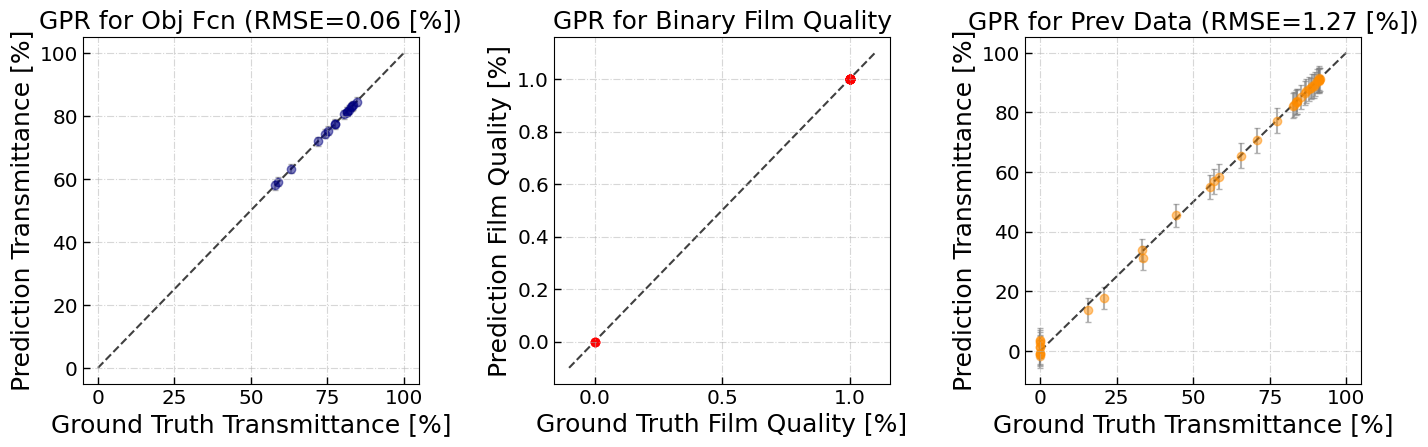

In [15]:
f_obj =  objective_model.model.predict
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

y_pred, y_uncer = f_obj(X)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

yc_pred, yc_uncer = f_cons1(Xc)
yc_pred = -yc_pred[:,-1]+yc_offset
yc_uncer = np.sqrt(yc_uncer[:,-1])

yc2_pred, yc2_uncer = f_cons2(Xc2)
yc2_pred = -yc2_pred[:,-1]+yc2_offset
yc2_uncer = np.sqrt(yc2_uncer[:,-1])


from sklearn.metrics import mean_squared_error
fig, axes = plt.subplots(1, 3, figsize=(5.5*3, 4.5))
fs = 18
lims1 = (0, 100)
axes[0].scatter(Y[:,-1], y_pred, alpha = 0.5, c = 'navy' , edgecolor = 'navy')
axes[0].errorbar(Y[:,-1], y_pred, yerr = y_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[0].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Y[:,-1], y_pred))
title = 'GPR for Obj Fcn' + " (RMSE=%.2f" % rmse_value+' [%])'
axes[0].set_xlabel('Ground Truth Transmittance [%]', fontsize = fs)
axes[0].set_ylabel('Prediction Transmittance [%]', fontsize = fs)
axes[0].set_title(title, fontsize = fs)

lims2 = (-.1, 1.1)
axes[1].scatter(Yc[:,-1], yc_pred, alpha = 0.6, edgecolor = 'r', c = 'r')
axes[1].errorbar(Yc[:,-1], yc_pred, yerr = yc_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)

axes[1].plot(lims2, lims2, 'k--', alpha=0.75, zorder=0)
title = 'GPR for Binary Film Quality'
axes[1].set_xlabel('Ground Truth Film Quality [%]', fontsize = fs)
axes[1].set_ylabel('Prediction Film Quality [%]', fontsize = fs)
axes[1].set_title(title, fontsize = fs)


lims3 = (0, 17)
axes[2].scatter(Yc2[:,-1], yc2_pred, alpha = 0.5, c = 'darkorange', edgecolor = 'darkorange')
axes[2].errorbar(Yc2[:,-1], yc2_pred, yerr = yc2_uncer, ms = 0, 
             ls = '', capsize = 2, alpha = 0.6,
             color = 'gray', zorder = 0)
axes[2].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
rmse_value = np.sqrt(mean_squared_error(Yc2[:,-1], yc2_pred))
title = 'GPR for Prev Data' + " (RMSE=%.2f" % rmse_value+' [%])'

axes[2].set_xlabel('Ground Truth Transmittance [%]', fontsize = fs)
axes[2].set_ylabel('Prediction Transmittance [%]', fontsize = fs)
axes[2].set_title(title, fontsize = fs)

        
for i in range(len(axes)):
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)

plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

mse = mean_squared_error
mse_all = mse(Y[:,-1], y_pred)
print ('all rmse: %.4f' % (np.sqrt(mse_all)))

rsquared_all = r2_score(Y[:,-1], y_pred)
print ('all R^2: %.4f' % (rsquared_all))

sprman_all = spearmanr(Y[:,-1], y_pred)
print ('all spearman: %.4f' % (sprman_all[0]))

all rmse: 0.0579
all R^2: 1.0000
all spearman: 0.9993


In [17]:
acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)

bayesopt_cons_pr = ProbabilisticConstraintBayesianOptimizationLoop2(model_objective=objective_model, 
                                                          space=parameter_space, 
                                                          acquisition=acquisition,
                                                          model_constraint1=constraint_model1,
                                                          model_constraint2=constraint_model2,
                                                          batch_size = 14)#batchsize>10 to account for duplication

X_new = bayesopt_cons_pr.candidate_point_calculator.compute_next_points(bayesopt_cons_pr.loop_state)
X_new = x_normalizer(get_closest_array(x_denormalizer(X_new)))

f_obj =  objective_model.model.predict       
f_cons1 = constraint_model1.model.predict
f_cons2 = constraint_model2.model.predict

f_cons_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.evaluate
f_raw_acq = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_1.evaluate
f_cons_pr = bayesopt_cons_pr.candidate_point_calculator.acquisition.acquisition.acquisition_2.evaluate

print('total condition no.:', len(Xc))
print('total device no.:', len(bayesopt_cons_pr.loop_state.Y))
print('maximum Y (Transmittance [%]): ', -np.min(np.transpose(np.round(bayesopt_cons_pr.loop_state.Y, 2))))

df_Xnew = pd.DataFrame(get_closest_array(x_denormalizer(X_new)), columns = df_film.columns[1:10])
df_all = pd.concat([df_film.iloc[:,1:10], df_Xnew])#.sort_values(by=list(df_film.columns[1:10]))
df_all_ = df_all.drop_duplicates()
df_Xnew = df_all_.iloc[20:30]
df_Xnew = df_Xnew.sort_values(by=list(df_film.columns[1:10]), ignore_index = True)
df_Xnew.index = np.arange(len(df_Xnew))+len(df_film)
df_Xnew

total condition no.: 20
total device no.: 16
maximum Y (Transmittance [%]):  84.57


E-81 amount [g]  Vacuum distillation time [min]  Curing agent amount [%]  \
20             10.0                           120.0                      4.5   
21             10.0                           120.0                      4.5   
22             10.0                           120.0                      4.5   
23             10.0                           180.0                      4.5   
24             10.0                           180.0                      4.5   
25             10.0                           240.0                      2.0   
26             10.0                           240.0                      4.5   
27             10.0                           240.0                      4.5   
28             20.0                           120.0                      4.5   
29             40.0                           120.0                      3.0   

    Thickness [um]  Curing power1 [%]  Curing power2 [%]  Distance [cm]  \
20           500.0               10.0               80.0           18.0   
21           500.0               20.0               80.0           18.0   
22           500.0               30.0               80.0           18.0   
23           500.0               10.0               80.0           18.0   
24           500.0               10.0               80.0           18.0   
25           500.0               20.0               90.0           18.0   
26           500.0               10.0               80.0           18.0   
27           500.0               10.0               80.0           18.0   
28           500.0               10.0               80.0           18.0   
29           400.0               10.0              100.0           12.0   

    Time1 [s]  Time2 [s]  
20        2.0        8.0  
21        2.0        8.0  
22        2.0        8.0  
23        2.0        8.0  
24        2.0        9.0  
25        2.0        8.0  
26        2.0        8.0  
27        2.0        9.0  
28        2.0        8.0  
29        2.0        8.0

In [18]:
X_new = x_normalizer(df_Xnew.values)

y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new
y_uncer_new = np.sqrt(y_uncer_new)

acq_produc = f_cons_acq(X_new)
acq_fcn = f_raw_acq(X_new)
acq_cons = f_cons_pr(X_new)

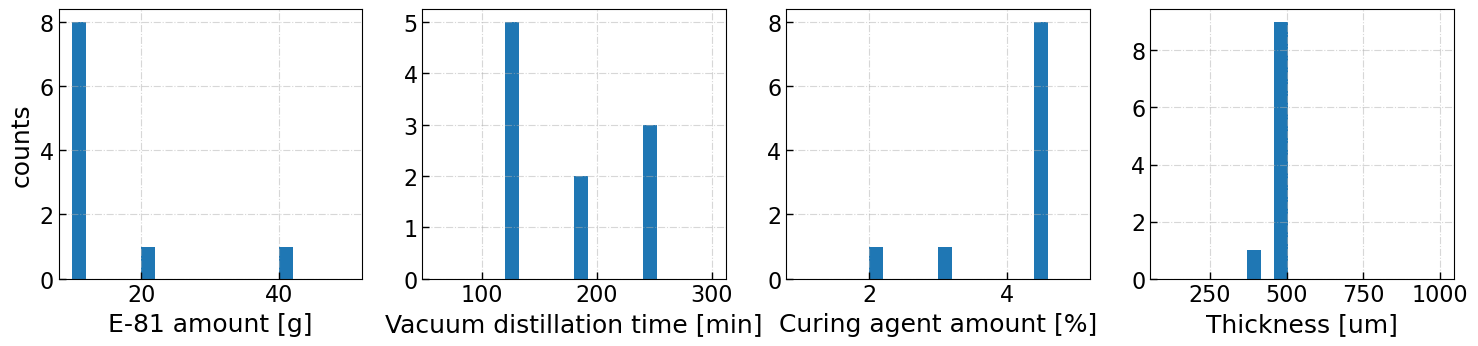

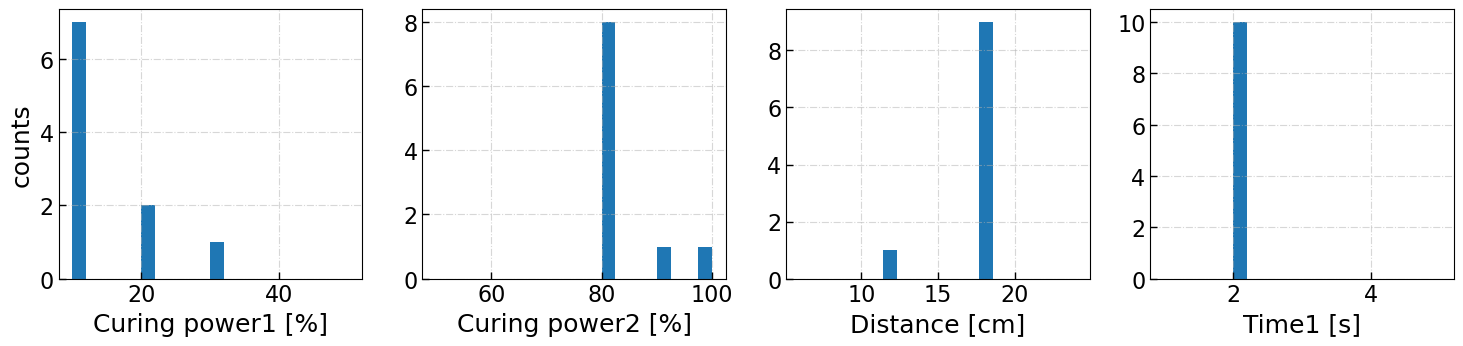

In [19]:
df = df_Xnew
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 8, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            axes[i].hist(df.iloc[:,n], bins= 20, range = (min(var_array[n]),max(var_array[n])))####
            axes[i].set_xlabel(df_cols[n], fontsize = 18)
            #axes[i].set_xlim(min(var_array[n])*0.8,max(var_array[n])*1.05)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

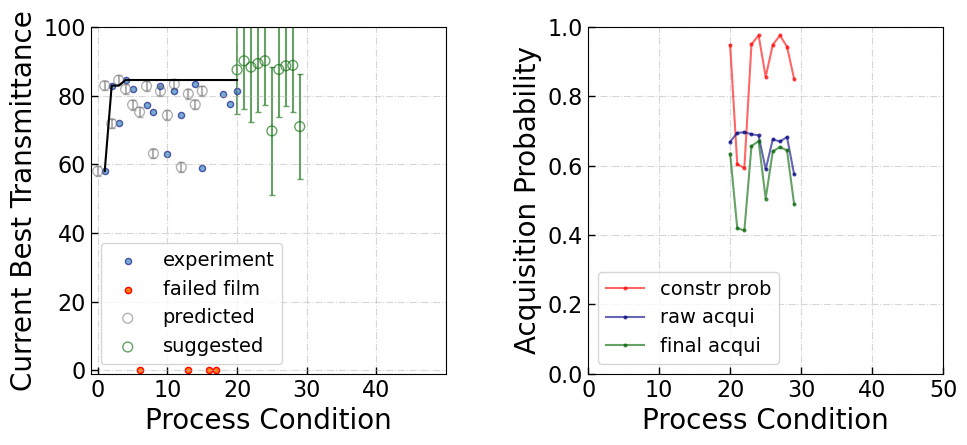

In [20]:
 f_obj =  objective_model.model.predict       

film_quality = df_film.sort_values('Experiment Condition').iloc[:,[0,-1]].values
device_tran = df_device.sort_values('Experiment Condition').iloc[:,[0,-1]].values

fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), sharey = False)
fs = 20
exp_cond = np.transpose(device_tran)[0]
exp_tran = np.transpose(device_tran)[1]

axes[0].scatter(exp_cond, exp_tran, #facecolor = 'none',
            edgecolor = 'navy', s = 20, alpha = 0.6, label = 'experiment')

unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
                #facecolor = 'none',
                edgecolor = 'red',
                s = 20, label = 'failed film')
all_cond = np.concatenate([device_tran, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), 
         marker = 'o', ms = 0, c = 'black')

X_sorted = x_normalizer(df_device.sort_values('Experiment Condition').iloc[:,1:10].values)
y_pred, y_uncer = f_obj(X_sorted)
y_pred = -y_pred[:,-1]
y_uncer = np.sqrt(y_uncer[:,-1])

axes[0].scatter(np.arange(len(X_sorted)), y_pred,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'gray', label = 'predicted')
axes[0].errorbar(np.arange(len(X_sorted)), y_pred, yerr = y_uncer,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'gray', zorder = 0)


y_pred_new, y_uncer_new = f_obj(X_new)
y_pred_new = -y_pred_new[:,-1]
y_uncer_new = np.sqrt(y_uncer_new[:,-1])

axes[0].scatter(np.arange(len(X_new))+len(Xc), y_pred_new,
                s = 50, facecolors='none', alpha = 0.6, edgecolor = 'darkgreen', label = 'suggested')
axes[0].errorbar(np.arange(len(X_new))+len(Xc), y_pred_new, yerr = y_uncer_new,  
                 ms = 0, ls = '', capsize = 2, alpha = 0.6, 
                 color = 'darkgreen', zorder = 0)


axes[0].set_ylabel('Current Best Transmittance', fontsize = 20)
axes[0].set_xlabel('Process Condition', fontsize = 20)

axes[0].set_ylim(-1, 100)
axes[0].set_xlim(-1, 50)
axes[0].set_xticks(np.arange(0,50,10))
axes[0].legend(fontsize = fs*0.7)

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_cons, marker = 'o',
                ms = 2, alpha = 0.6, color = 'red', label = 'constr prob')
axes[1].plot(np.arange(len(X_new))+len(Xc), acq_fcn/150, marker = 'o',
                ms = 2, alpha = 0.6, color = 'navy', label = 'raw acqui')

axes[1].plot(np.arange(len(X_new))+len(Xc), acq_produc/150, marker = 'o',
                ms = 2, alpha = 0.6, color = 'darkgreen', label = 'final acqui')


axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 2)
axes[1].set_xticks(np.arange(0,60,10))
axes[1].set_ylabel('Acquisition Probability', fontsize = fs)
axes[1].set_xlabel('Process Condition', fontsize = fs)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.7)
plt.show()



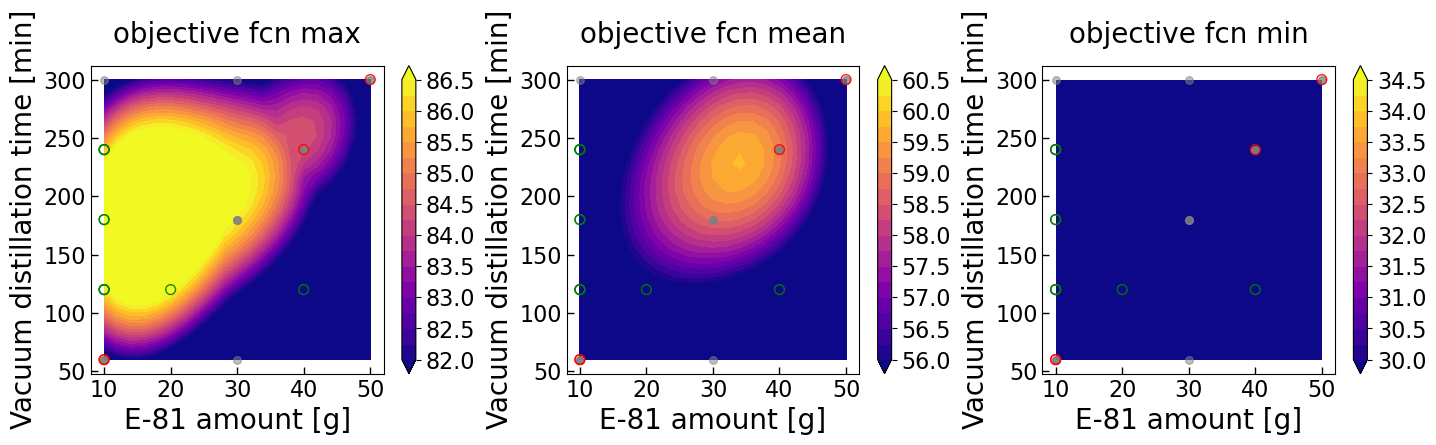

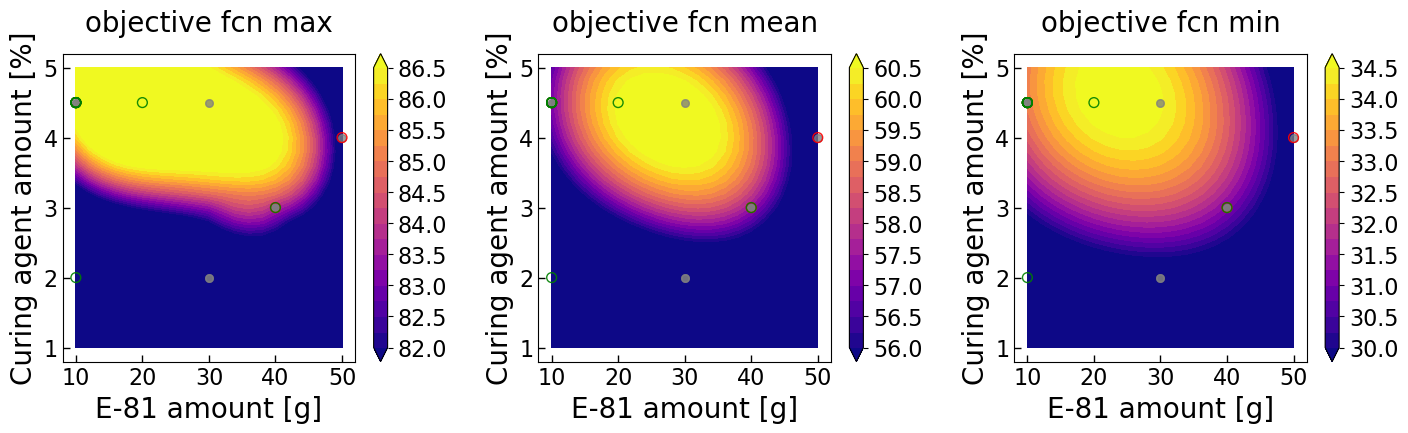

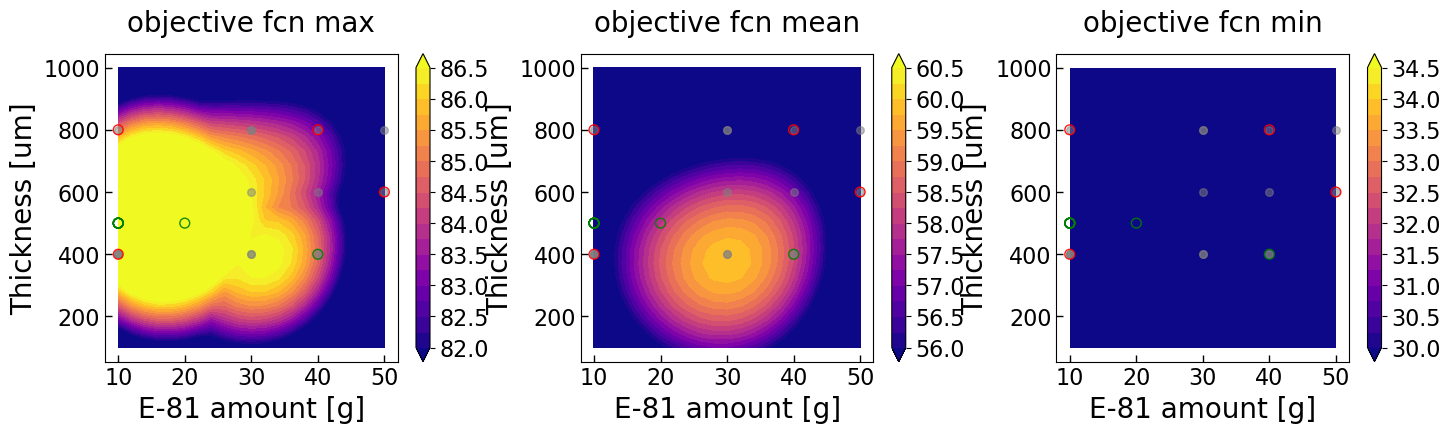

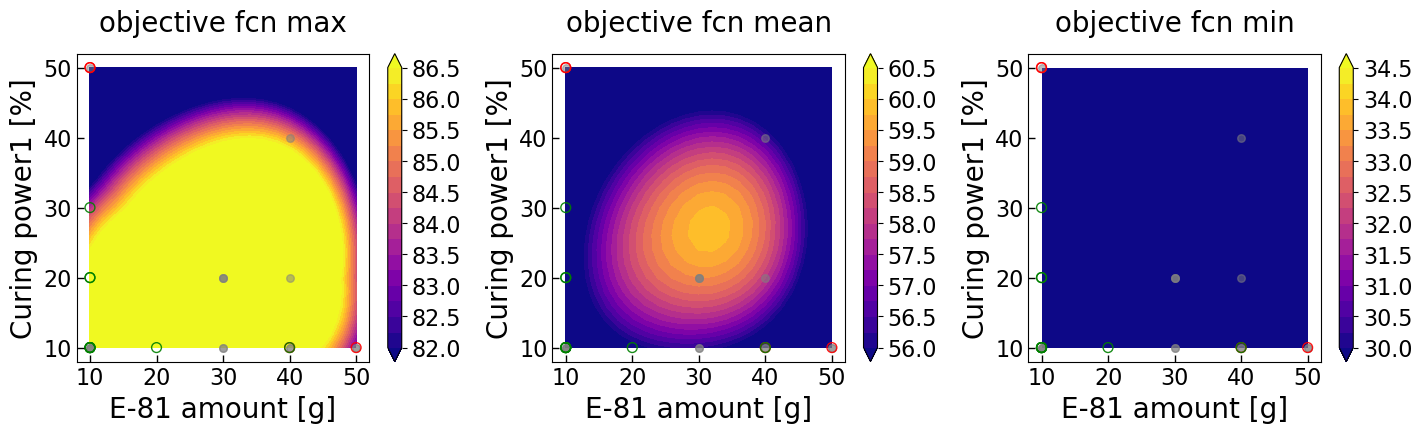

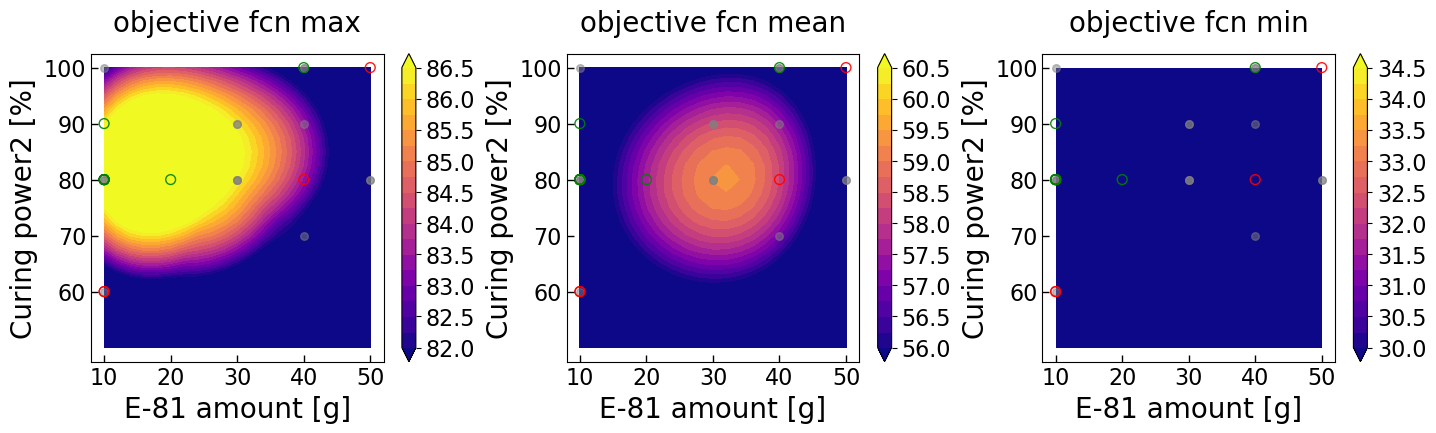

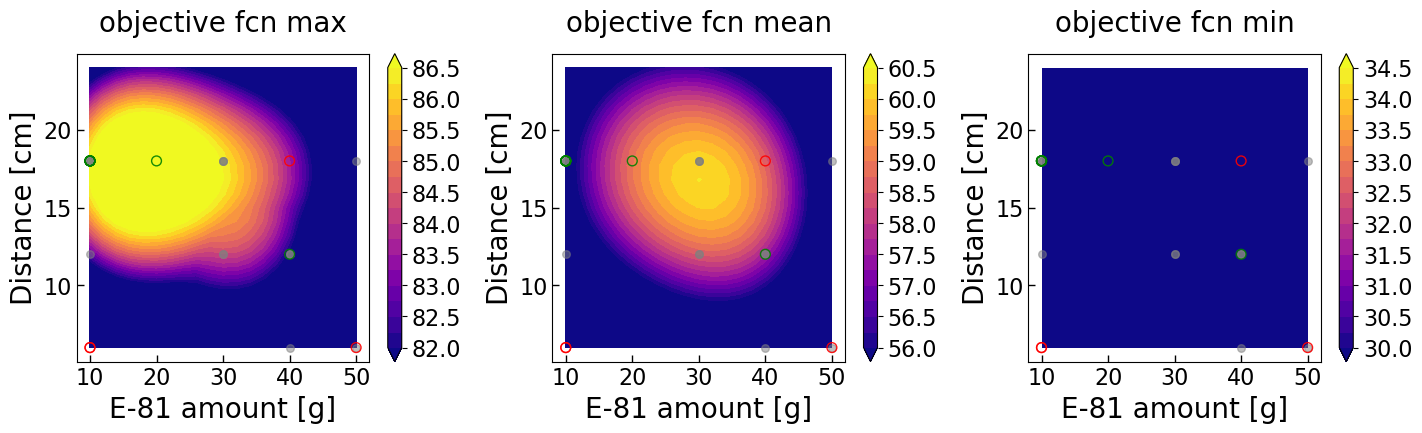

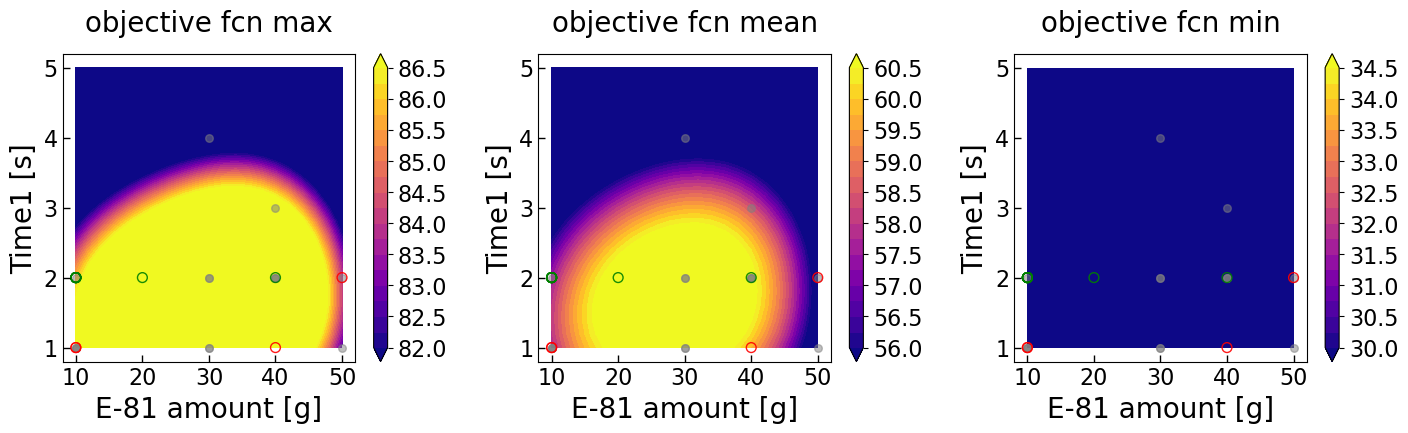

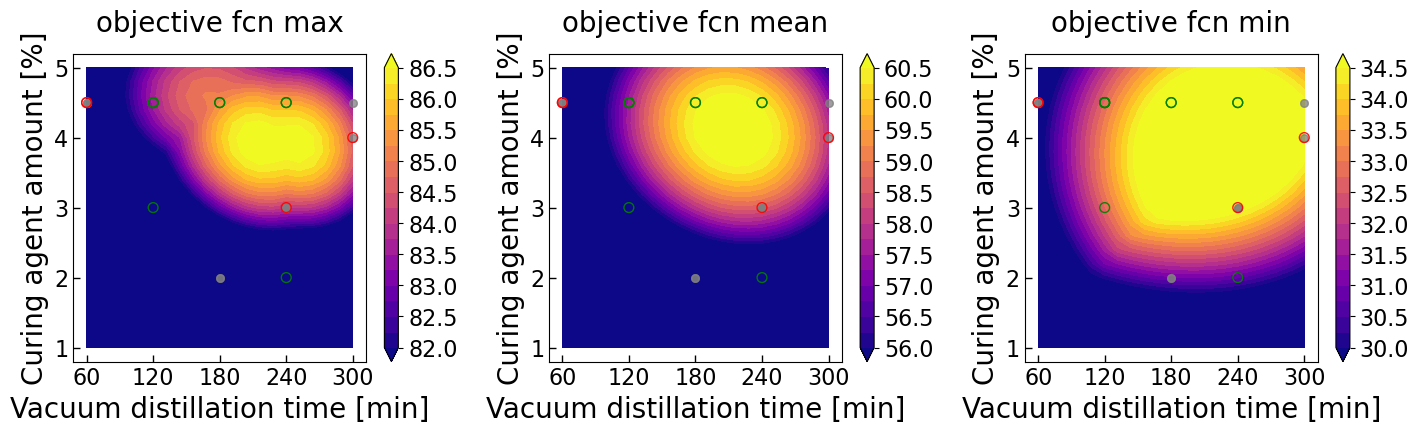

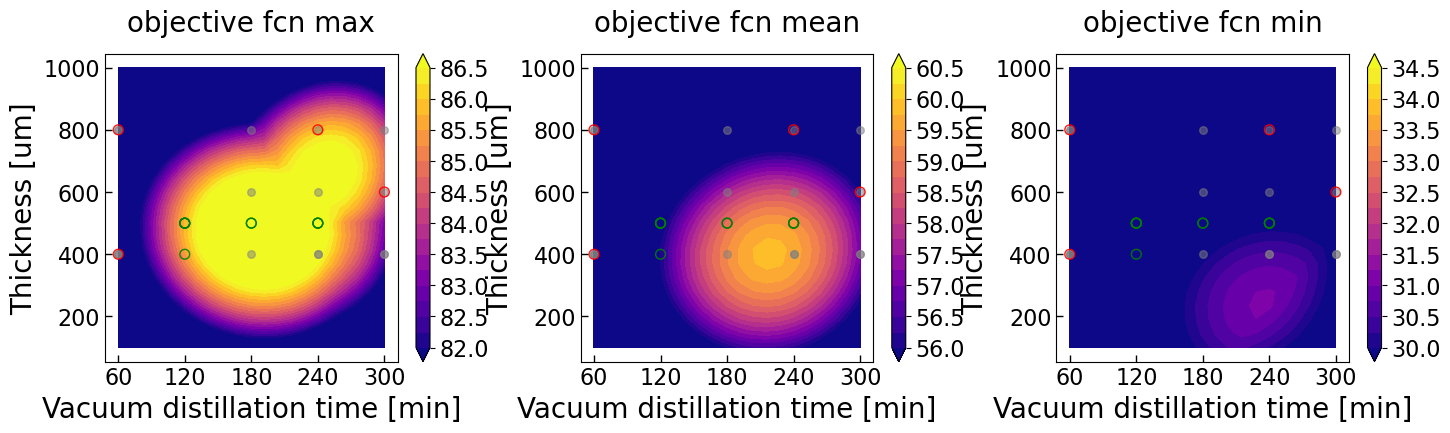

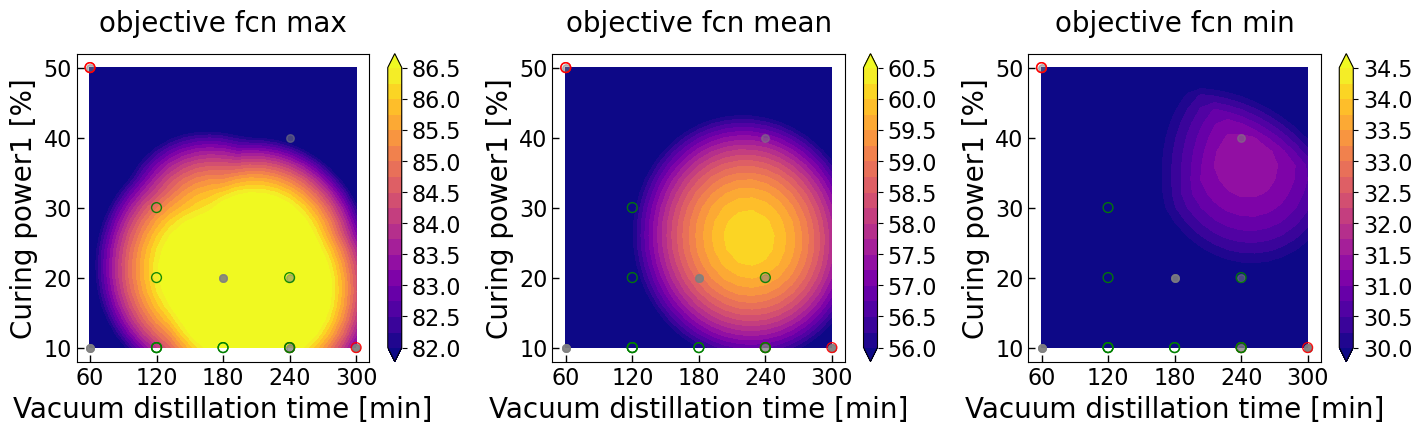

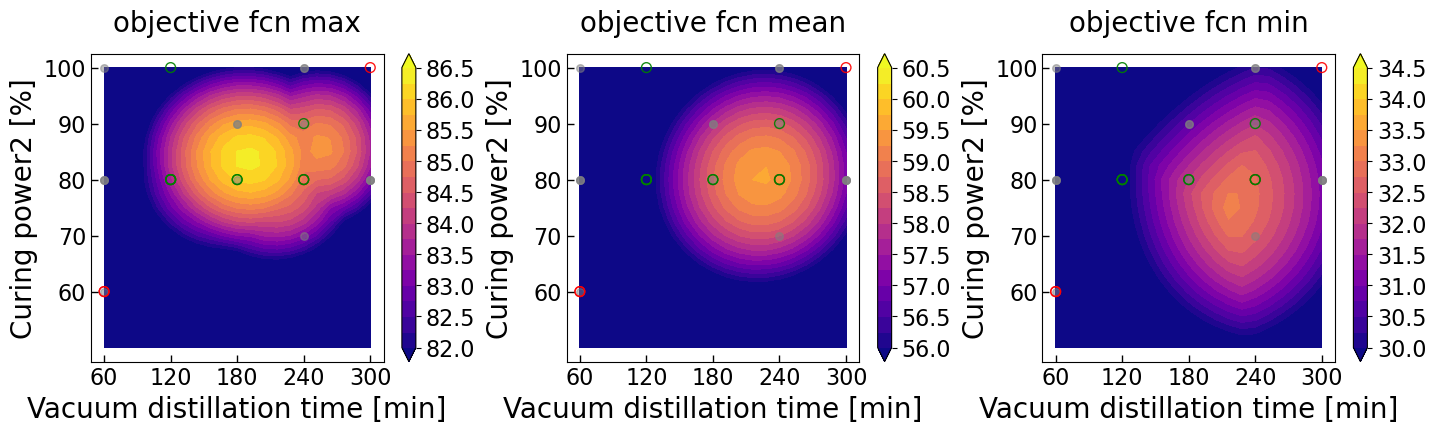

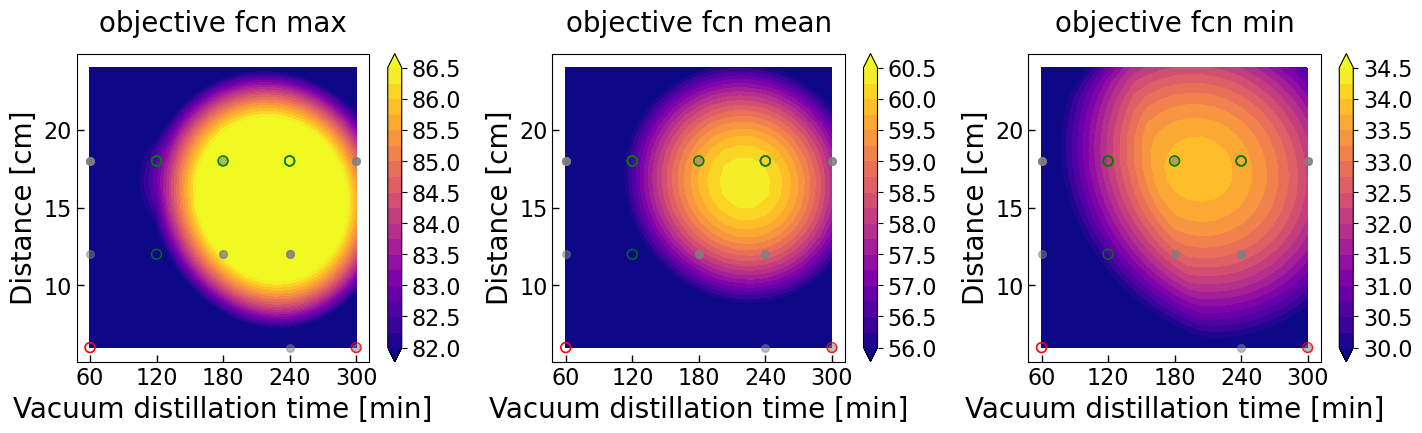

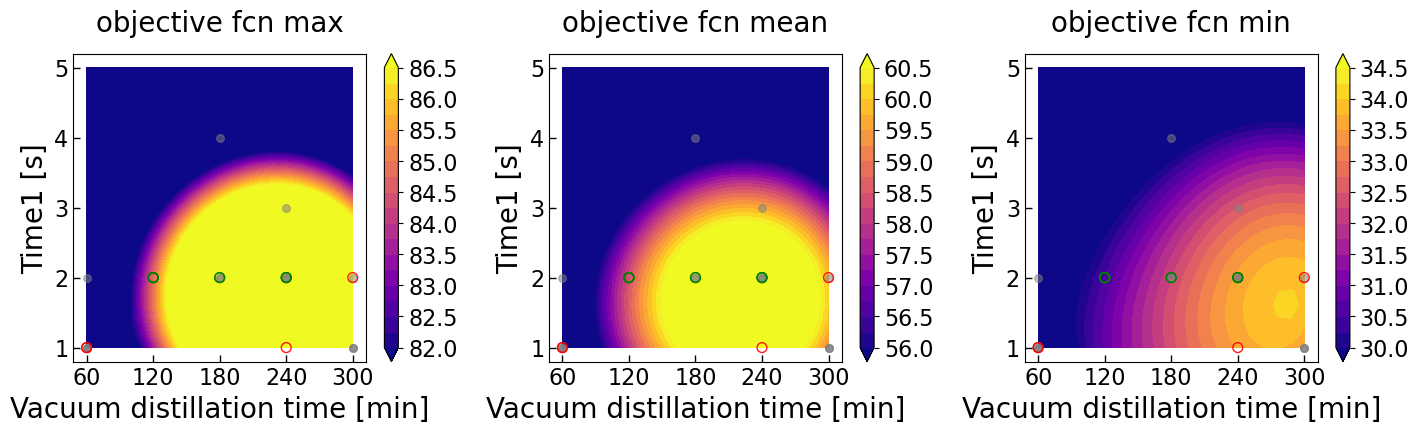

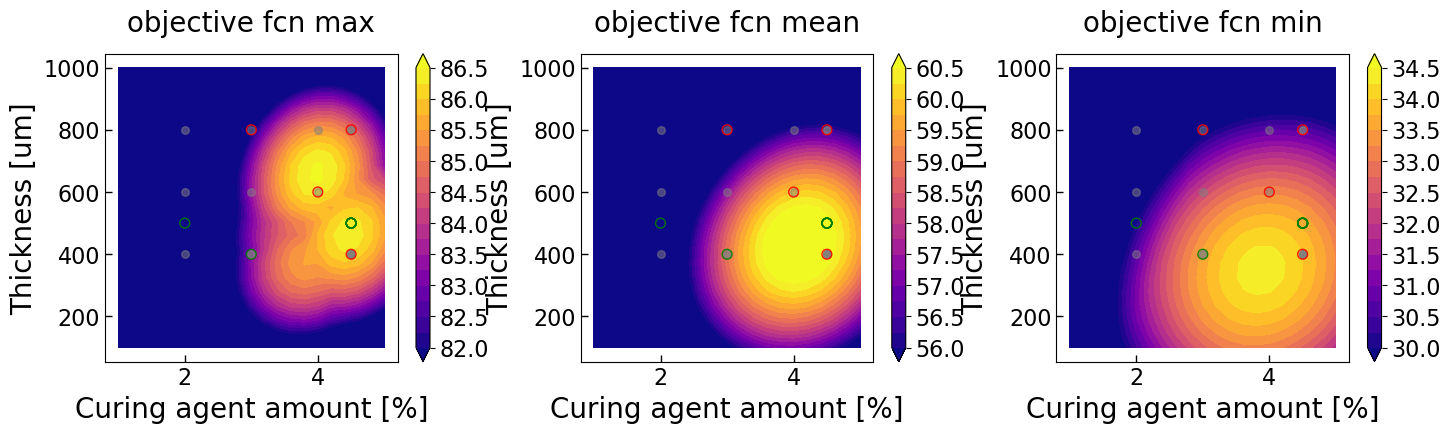

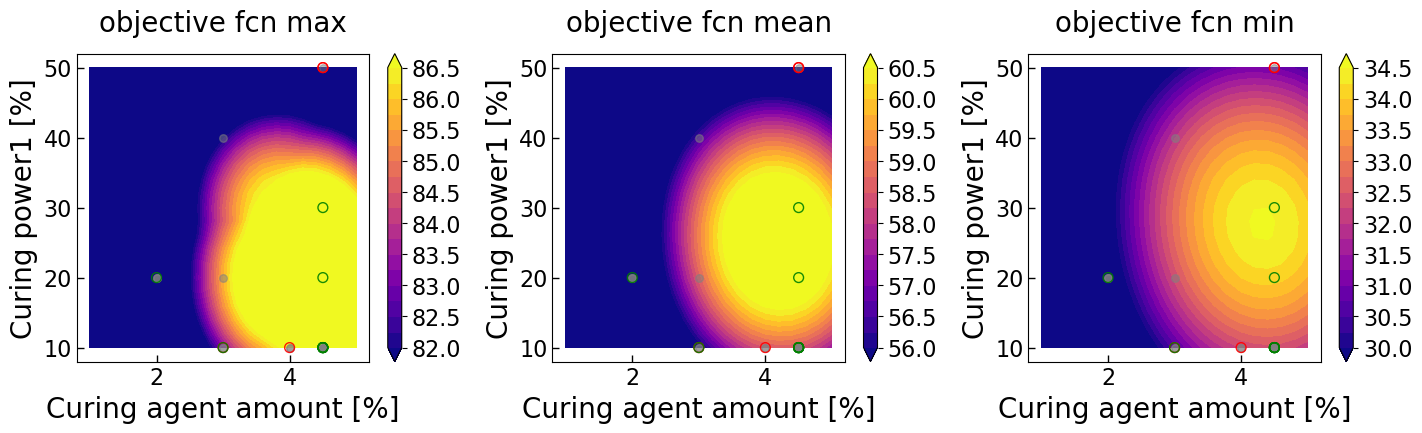

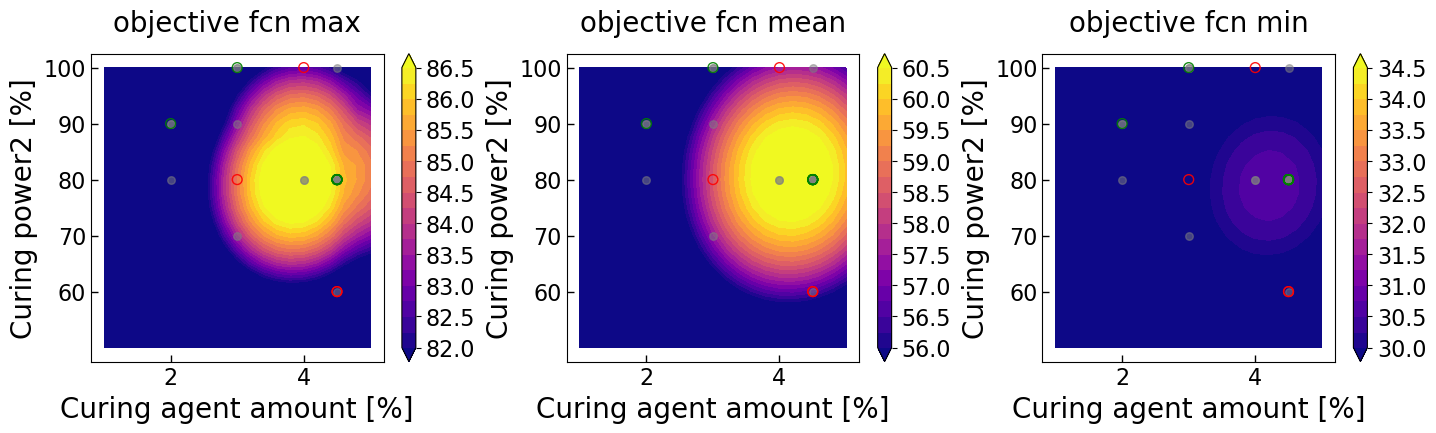

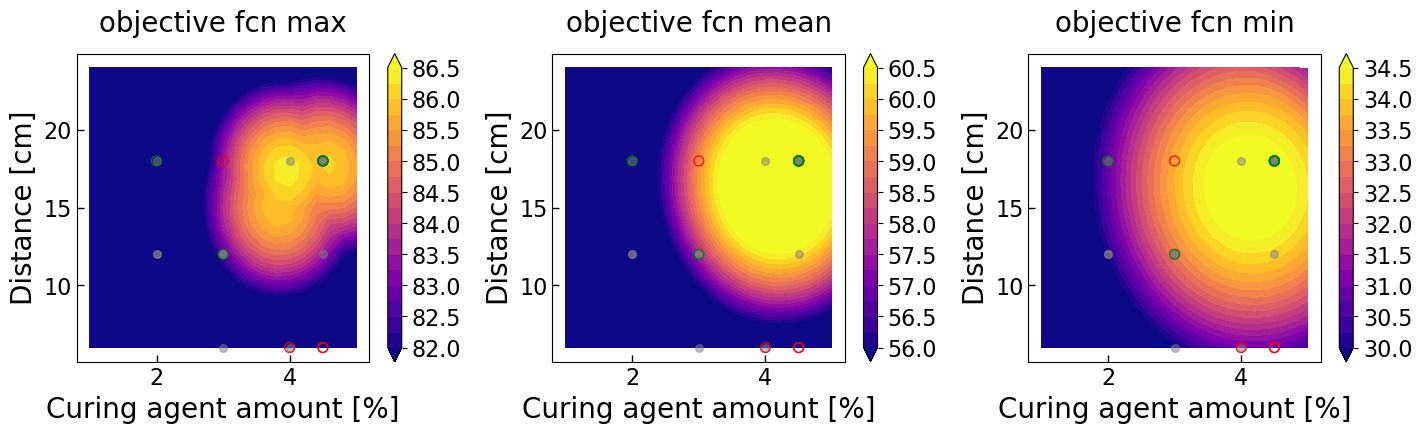

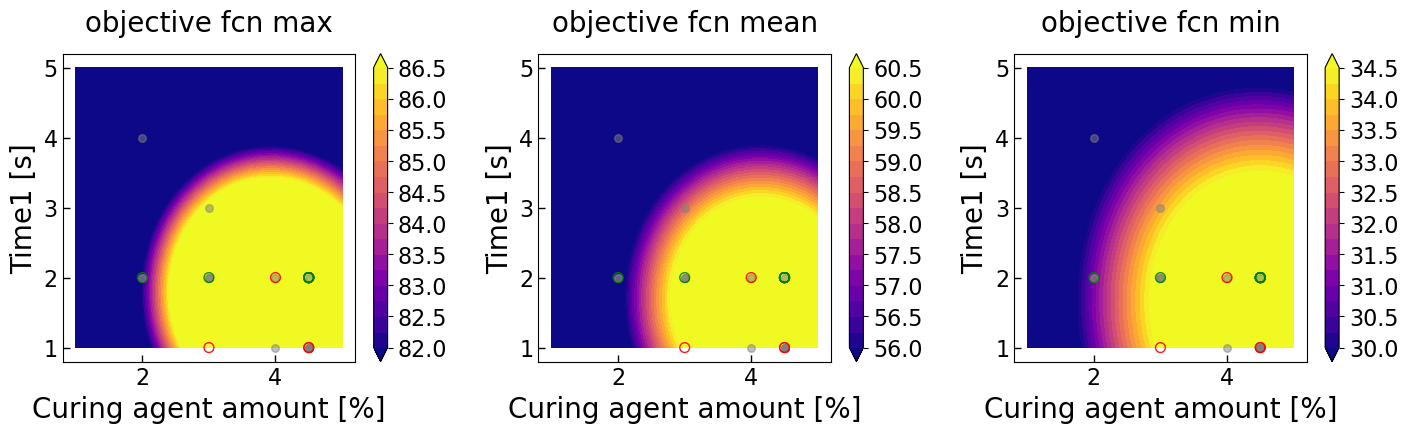

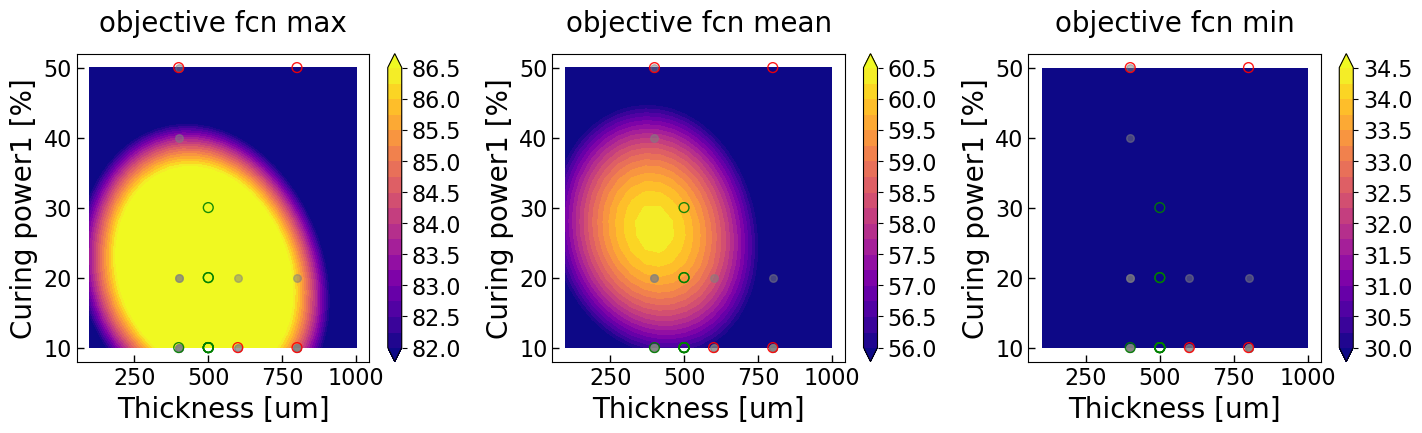

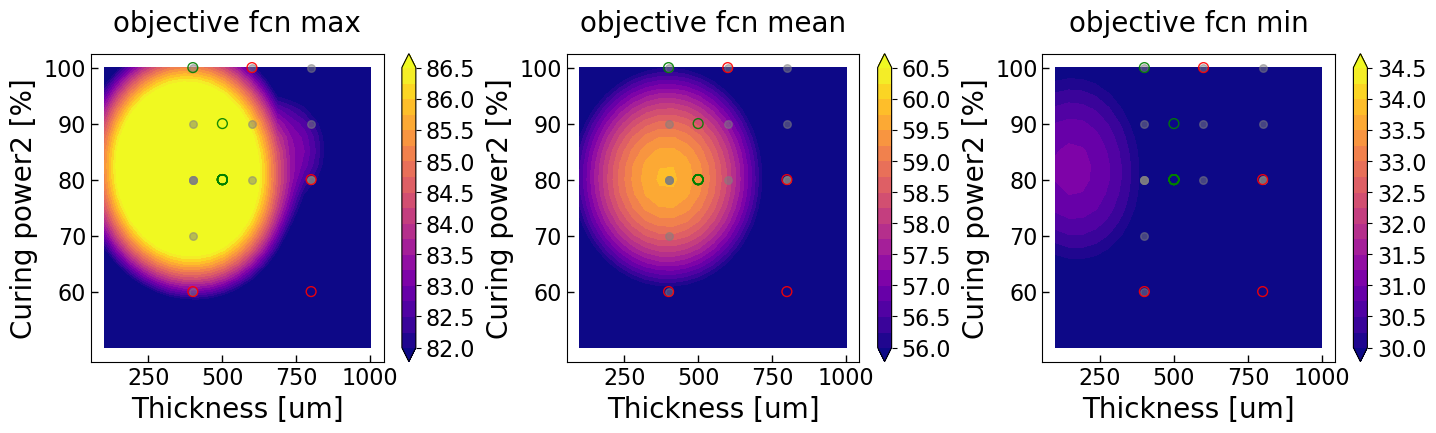

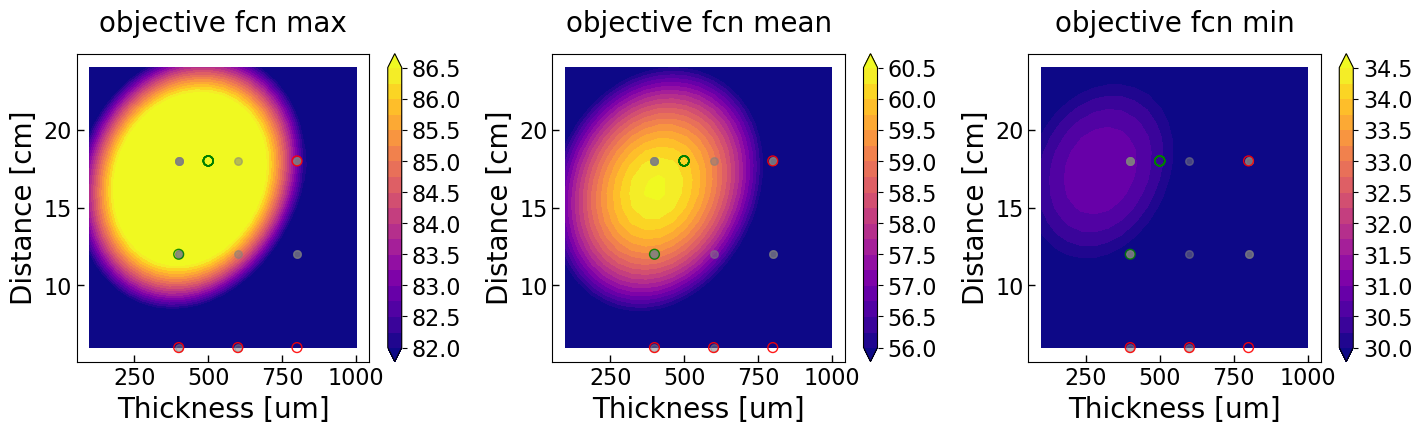

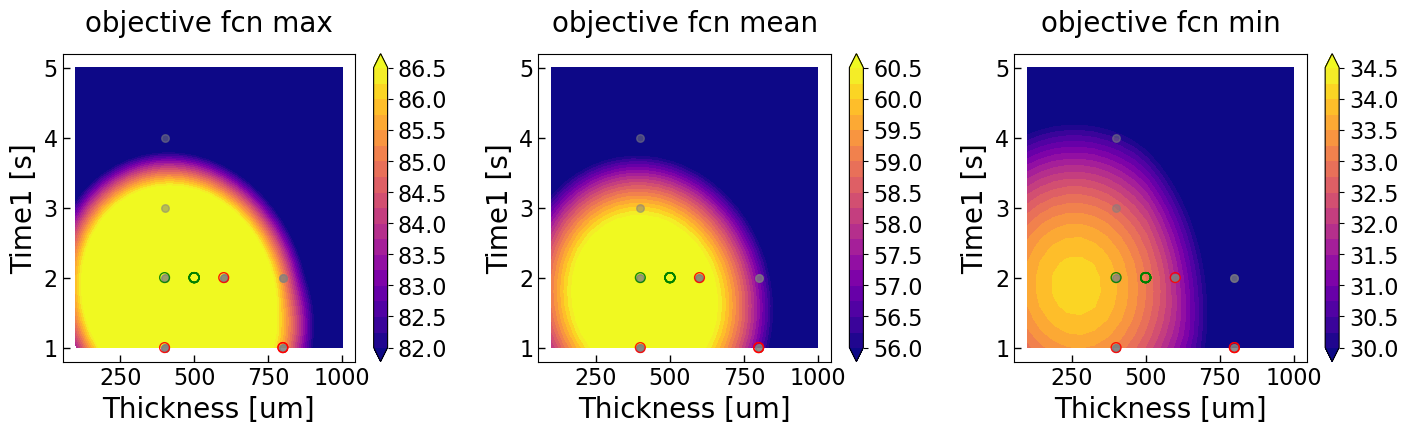

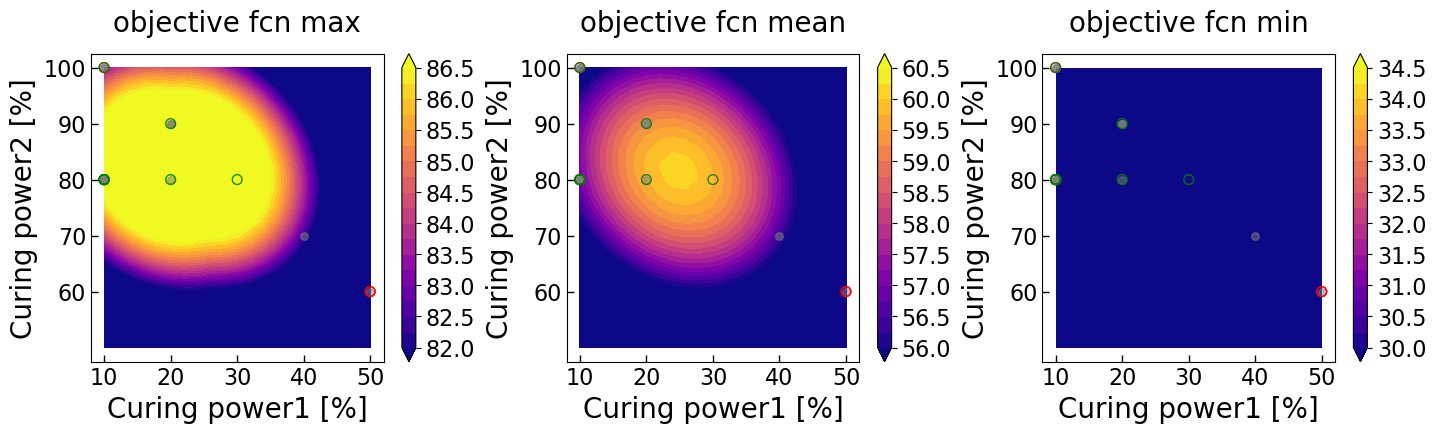

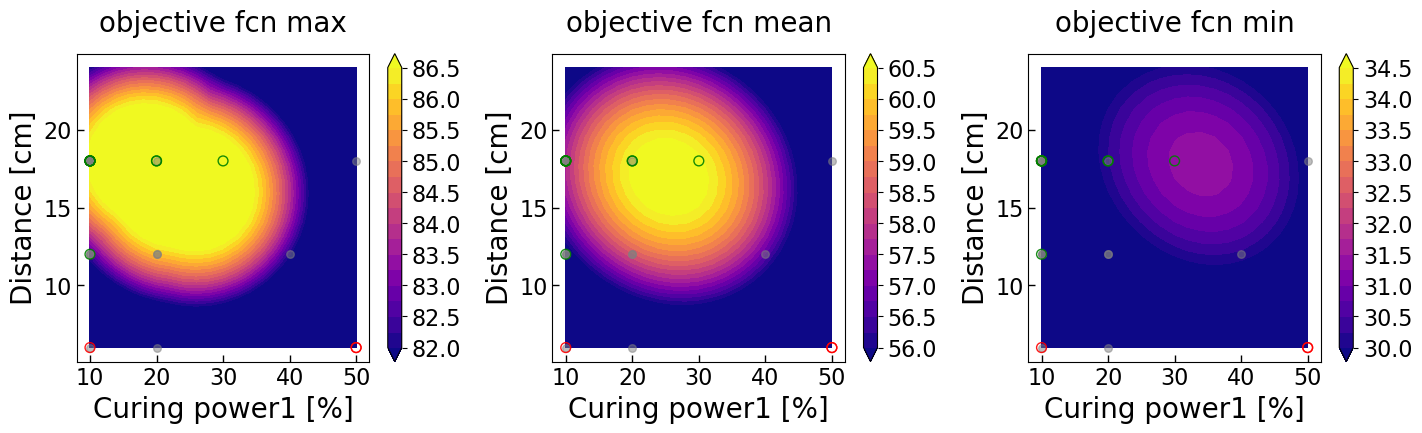

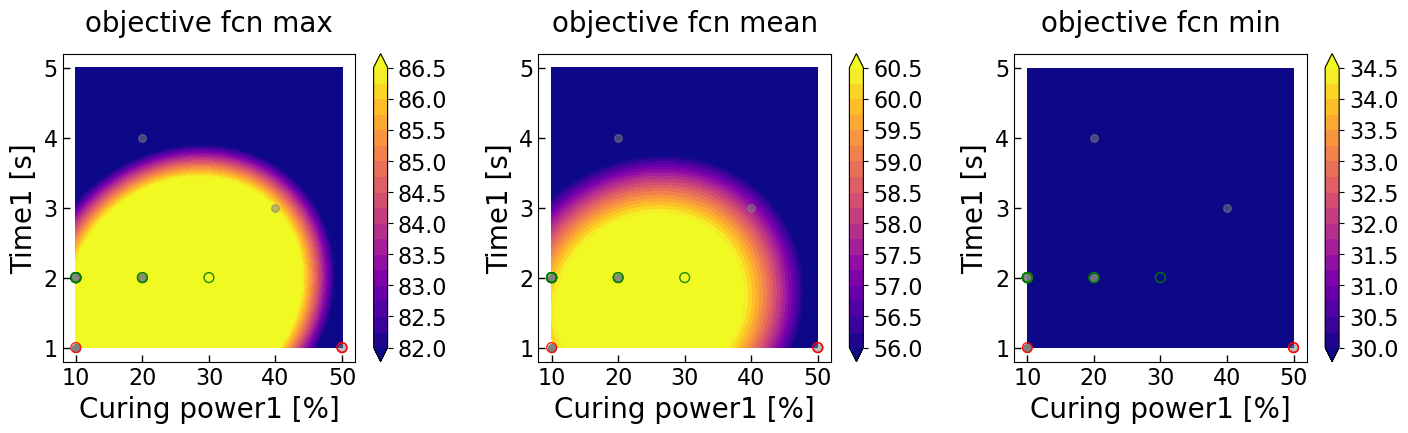

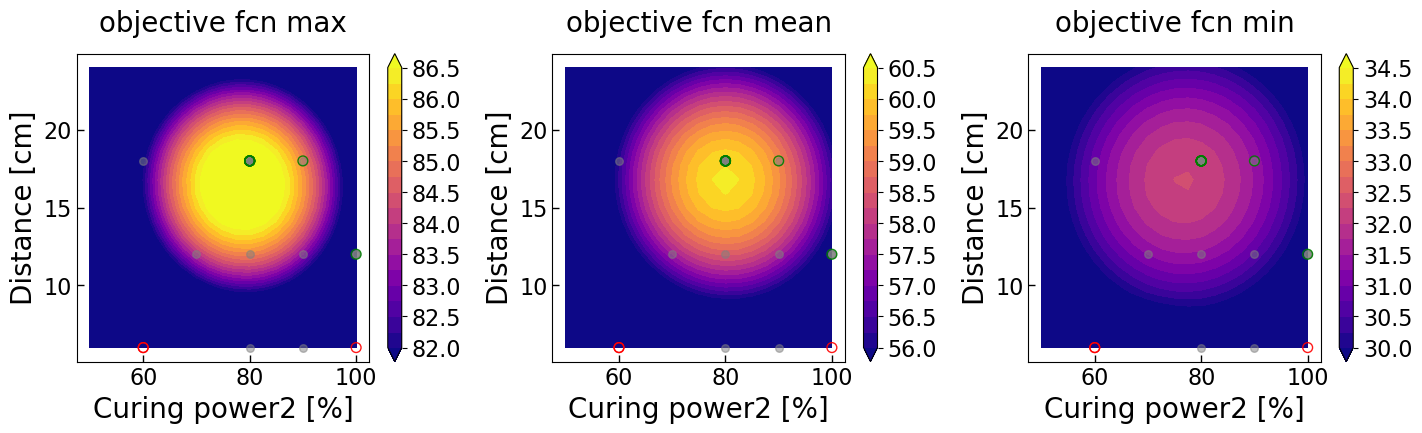

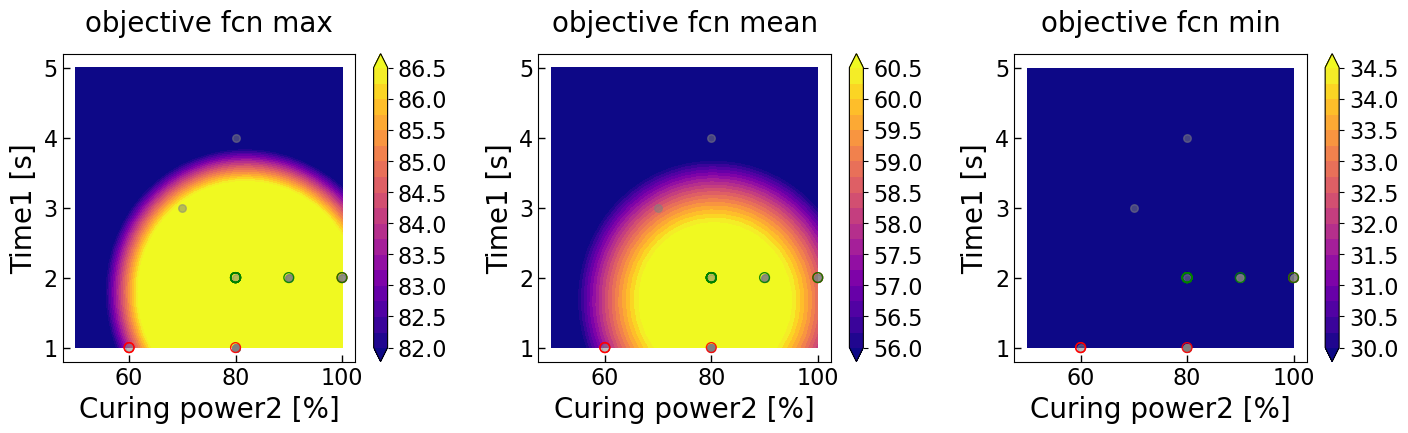

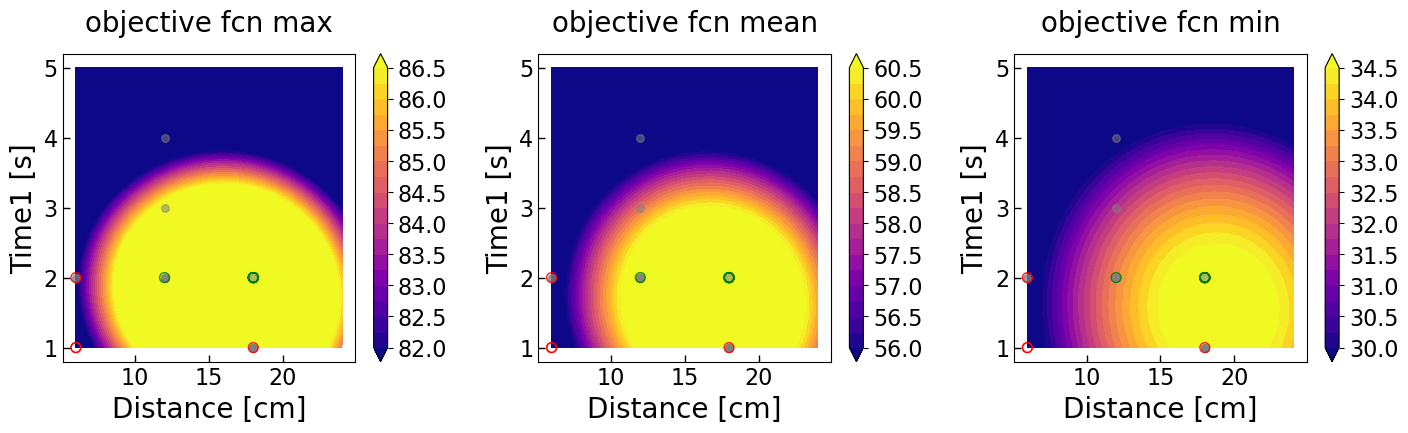

In [21]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_device.iloc[:,1:9].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        
## Generate a 2D grid for Contour plot
        ind1 = i
        ind2 = j+i+1
        if ind2 >= len(x_columns):
            continue  
        n_steps =21
        x1x2y_pred, x1x2y_uncer =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_GQDs = np.copy(x_sampled)
                x_GQDs[:,ind1] = x1
                x_GQDs[:,ind2] = x2
                y_pred, y_uncer = f_obj(x_GQDs)
                y_pred = -y_pred
                x1_org = x_denormalizer(x_GQDs)[0,ind1]
                x2_org = x_denormalizer(x_GQDs)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(y_pred), np.mean(y_pred), np.min(y_pred)])
                x1x2y_uncer.append([x1_org, x2_org, np.max(np.sqrt(y_uncer)), np.mean(np.sqrt(y_uncer)), np.min(np.sqrt(y_uncer))])
        
        x1 = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2 = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
            
        y_pred_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        y_pred_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        y_pred_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)
        
        y_uncer_max = np.array(x1x2y_uncer, dtype=object)[:,2].reshape(n_steps, n_steps)
        y_uncer_mean = np.array(x1x2y_uncer, dtype=object)[:,3].reshape(n_steps, n_steps)
        y_uncer_min = np.array(x1x2y_uncer, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
## Contour for Prediction Transmittance Mean
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [82, 56, 30]
        for ax, c_offset, y in zip(axes, colorbar_offset,
                                   [y_pred_max, y_pred_mean, y_pred_min]):
            
            c_plt1 = ax.contourf(x1, x2, y, levels = np.arange(19)*0.25+c_offset, cmap='plasma', extend = 'both')
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], ## show the conditions with poor film quality
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')

            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            ax.set_xlabel(str(x_columns[ind1]),fontsize =  fs)
            ax.set_ylabel(str(x_columns[ind2]),fontsize =  fs)

            x1_delta = (np.max(x1)-np.min(x1))*0.05
            x2_delta = (np.max(x2)-np.min(x2))*0.05
            ax.set_xlim(np.min(x1)-x1_delta, np.max(x1)+x1_delta)
            ax.set_ylim(np.min(x2)-x2_delta, np.max(x2)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8)#, grid_alpha = 0.5
            if ind1==0:#GQDs-30 amount
                ax.set_xticks([10,20, 30, 40, 50])
            if ind1==1:#VVacuum distillation time
                ax.set_xticks([60, 120, 180, 240,300])
            if ind1==4:#Curing power1
                ax.set_xticks([10, 20, 30, 40, 50])
            if ind2==5:#Curing power2
                ax.set_yticks([60, 70, 80, 90, 100])
            #ax.grid(True, linestyle='-.')

        axes[0].set_title('objective fcn max', pad = title_pad,fontsize =  fs)
        axes[1].set_title('objective fcn mean', pad = title_pad,fontsize =  fs)
        axes[2].set_title('objective fcn min', pad = title_pad,fontsize =  fs)

        plt.subplots_adjust(wspace = 0.3)
        plt.show()
# # Contour for Uncertainty        
#         fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
#         colorbar_offset = [3, 2.5, 2]
#         for ax, c_offset, y in zip(axes, colorbar_offset,
#                                    [y_uncer_max, y_uncer_mean, y_uncer_min]):

#             c_plt1 = ax.contourf(x1, x2, y,  levels = np.arange(11)*0.2+c_offset, cmap='plasma', extend = 'both')
#             fig.colorbar(c_plt1, ax= ax)
#             ax.scatter(x_denormalizer(X)[:, ind1], 
#                        x_denormalizer(X)[:, ind2], 
#                        s = 50, facecolors='none', alpha = 0.9, edgecolor = 'gray')
#             ax.set_xlabel(str(x_columns[ind1]))
#             ax.set_ylabel(str(x_columns[ind2]))

#             x1_delta = (np.max(x1)-np.min(x1))*0.05
#             x2_delta = (np.max(x2)-np.min(x2))*0.05
#             ax.set_xlim(np.min(x1)-x1_delta, np.max(x1)+x1_delta)
#             ax.set_ylim(np.min(x2)-x2_delta, np.max(x2)+x2_delta)


#         axes[0].set_title('objective uncer max', pad = title_pad)
#         axes[1].set_title('objective uncer mean', pad = title_pad)
#         axes[2].set_title('objective uncer min', pad = title_pad)
#         plt.subplots_adjust(wspace = 0.25)
        plt.show()

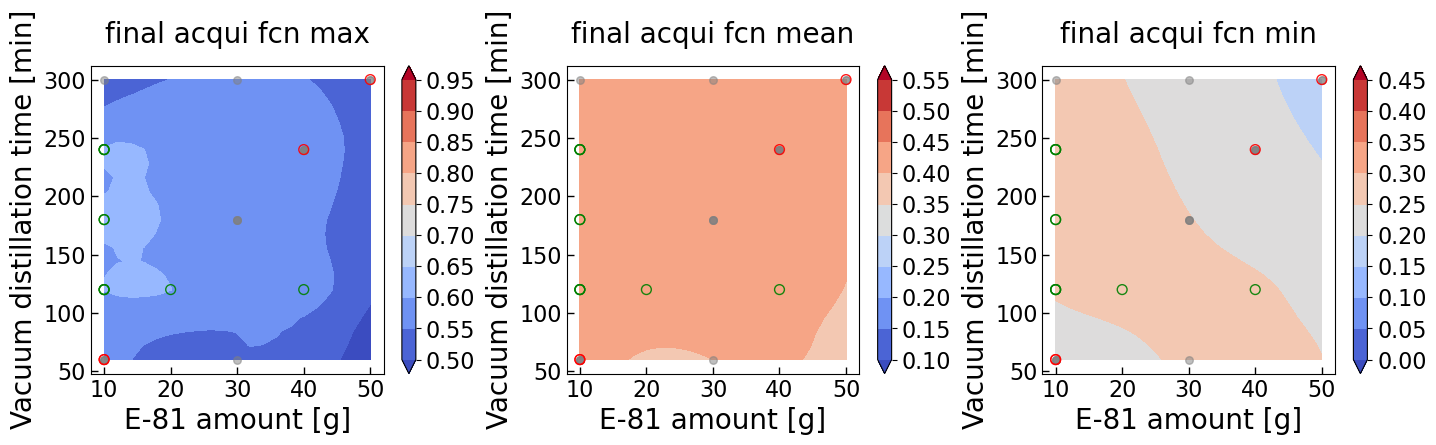

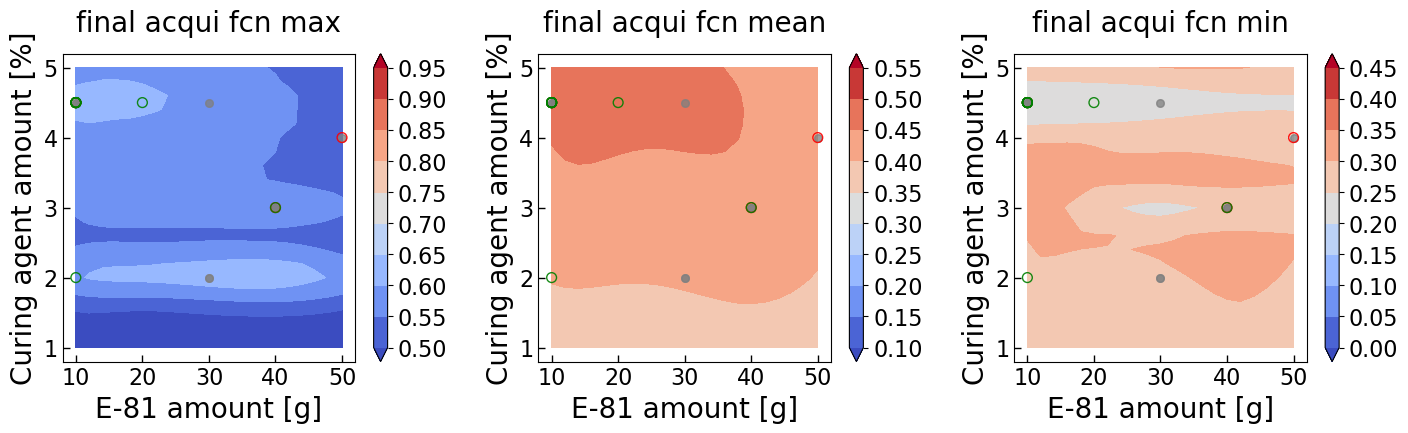

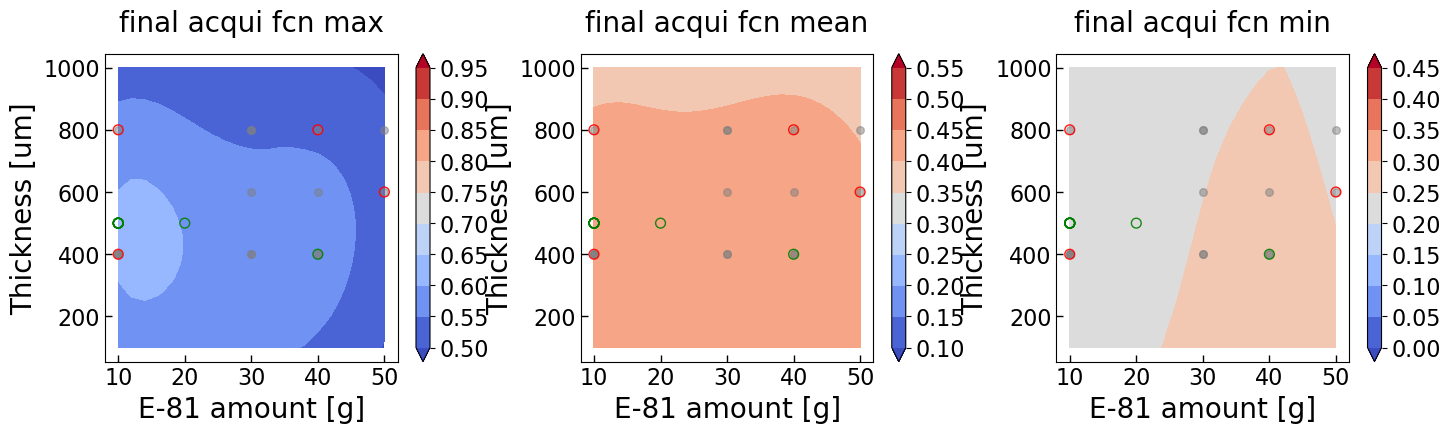

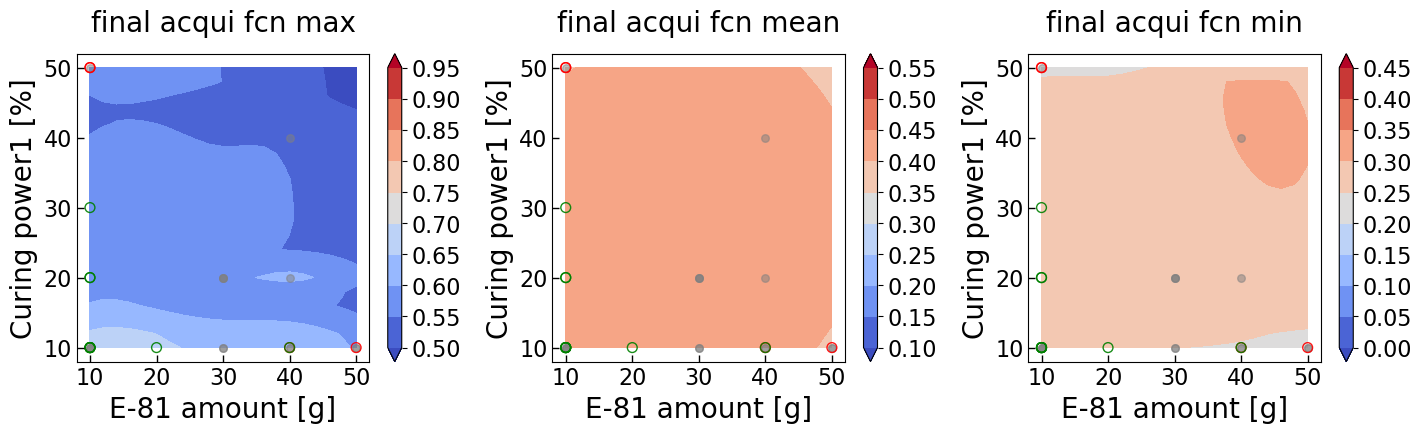

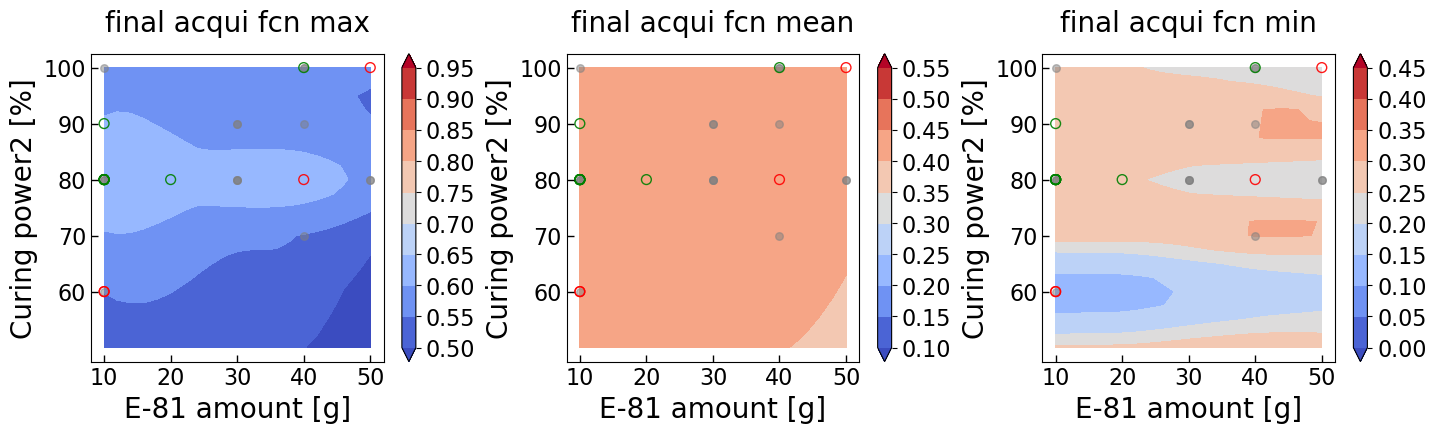

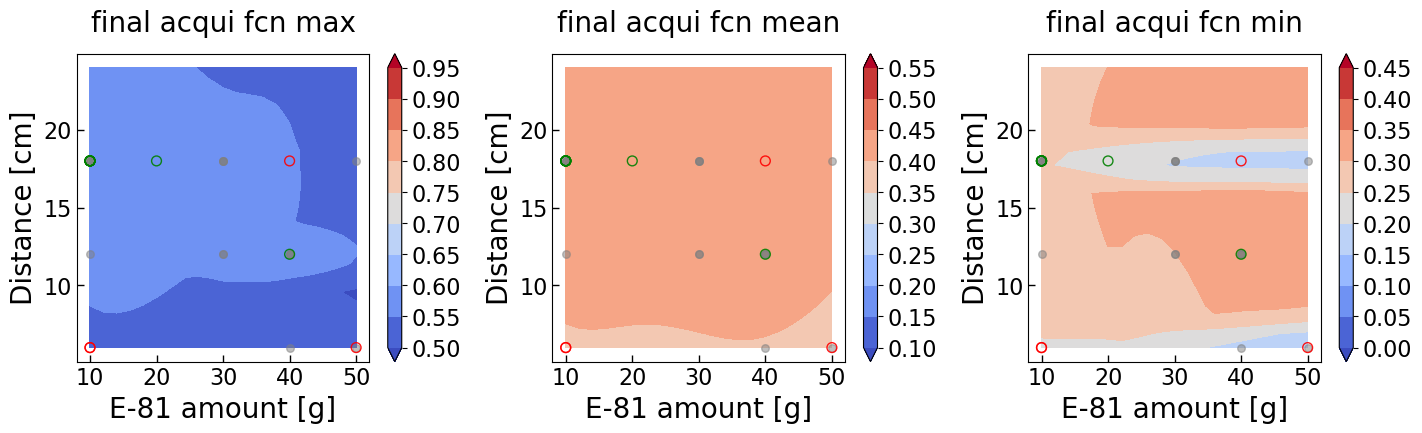

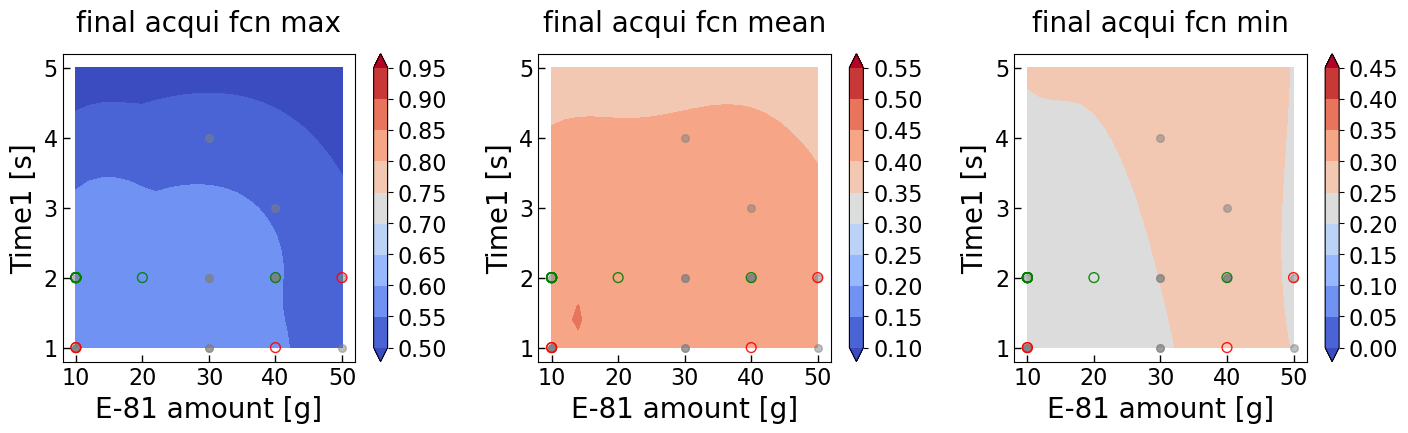

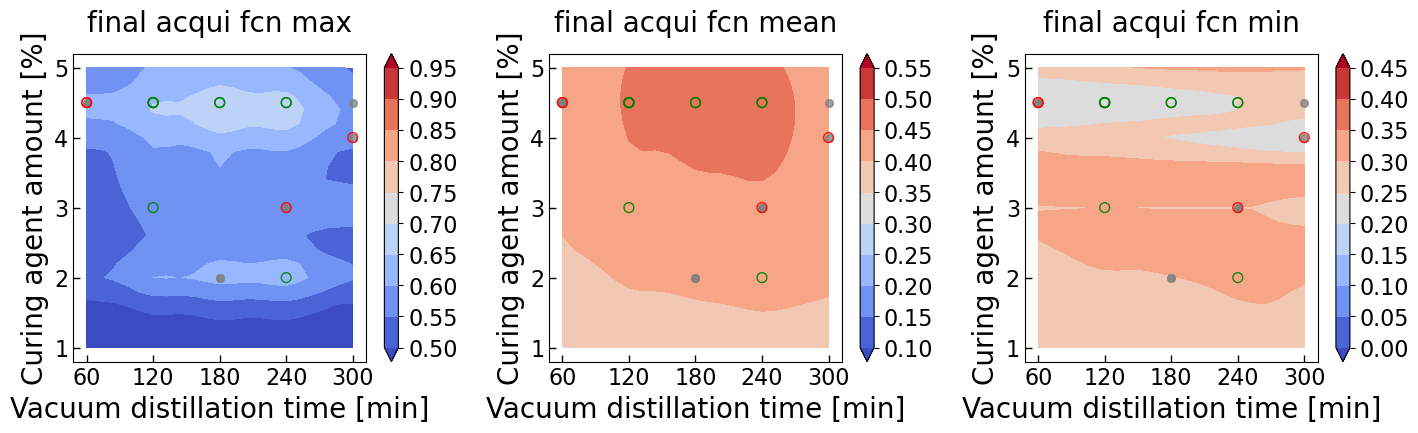

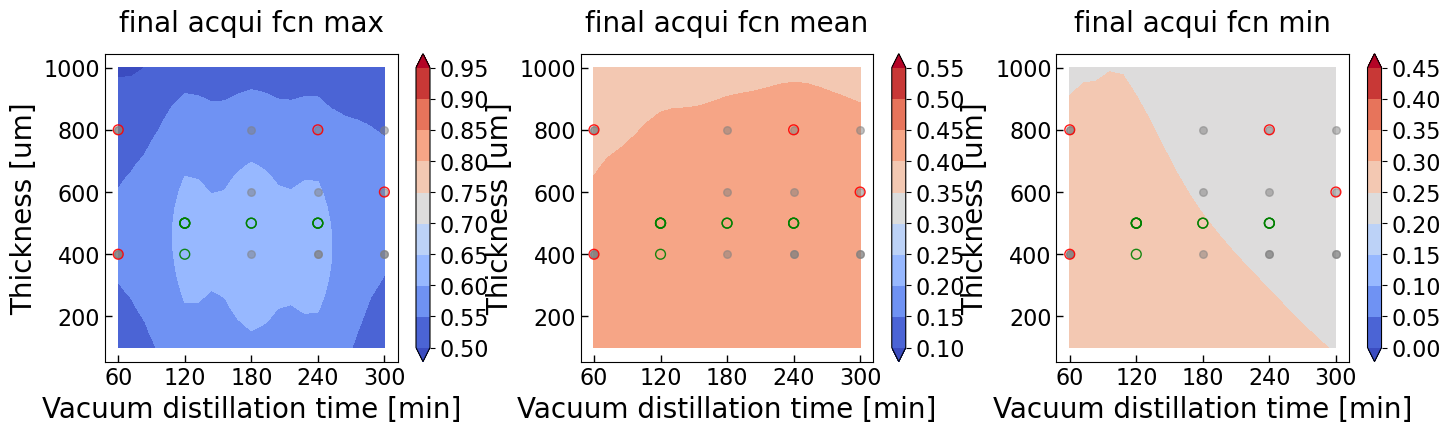

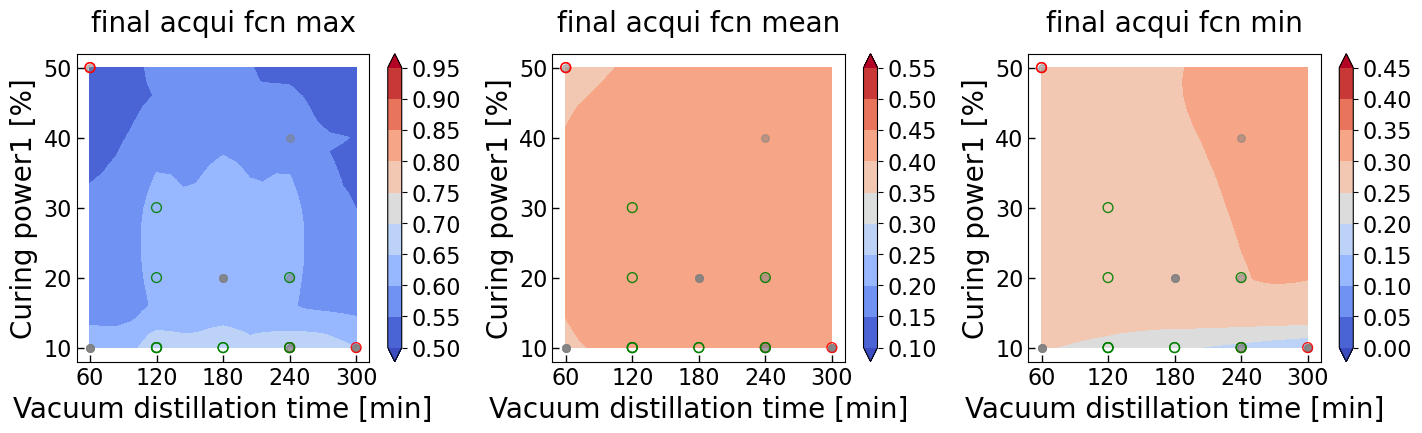

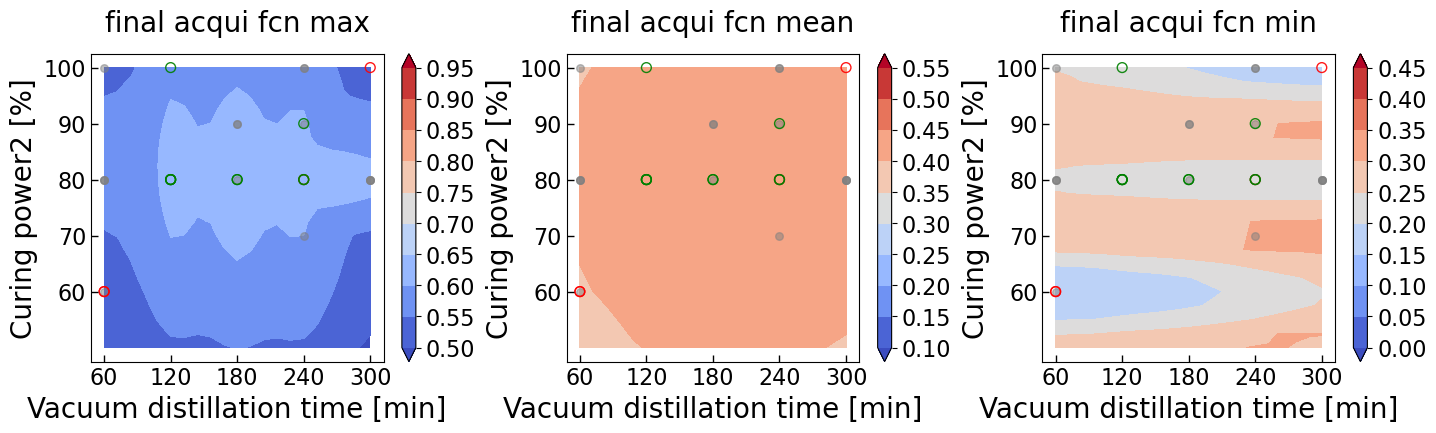

KeyboardInterrupt: 

In [22]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:9].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        if ind2 >= len(x_columns):
            continue  
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_GQDs = np.copy(x_sampled)
                x_GQDs[:,ind1] = x1
                x_GQDs[:,ind2] = x2
                yc_pr = f_cons_acq(x_GQDs)
                x1_org = x_denormalizer(x_GQDs)[0,ind1]
                x2_org = x_denormalizer(x_GQDs)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.1, 0.0]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y/100, levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(X)[:, ind1], 
                       x_denormalizer(X)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                       x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')
            ax.set_xlabel(str(x_columns[ind1]),fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]),fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            if ind1==0:#GQDs-30 amount
                ax.set_xticks([10,20, 30, 40, 50])
            if ind1==1:#VVacuum distillation time
                ax.set_xticks([60, 120, 180, 240,300])
            if ind1==4:#Curing power1
                ax.set_xticks([10, 20, 30, 40, 50])
            if ind2==5:#Curing power2
                ax.set_yticks([60, 70, 80, 90, 100])
            #ax.grid(True, linestyle='-.')
            
            
        axes[0].set_title('final acqui fcn max', pad = title_pad,fontsize = fs)
        axes[1].set_title('final acqui fcn mean', pad = title_pad,fontsize = fs)
        axes[2].set_title('final acqui fcn min', pad = title_pad,fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

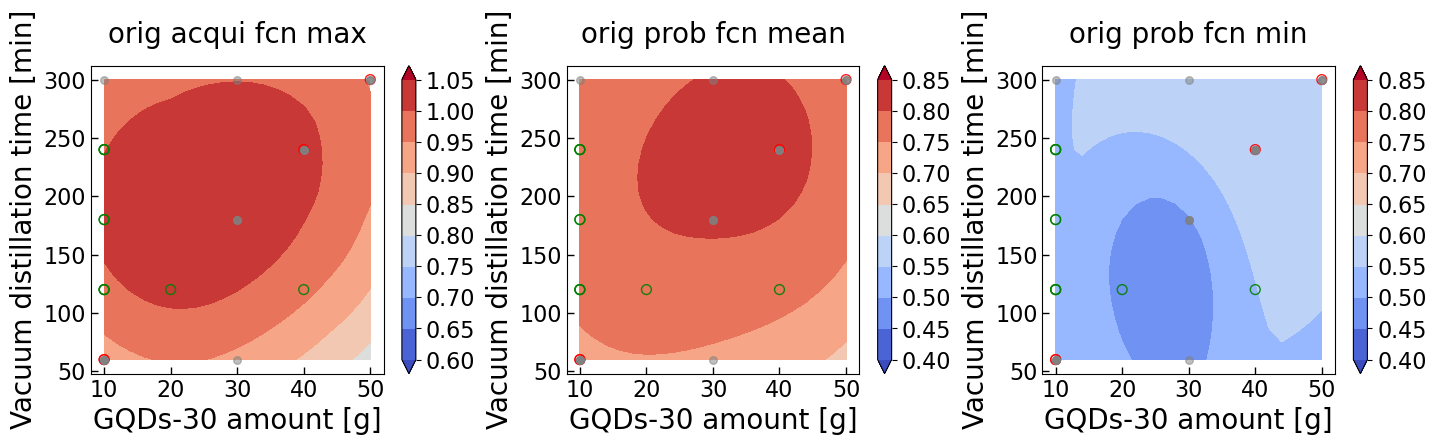

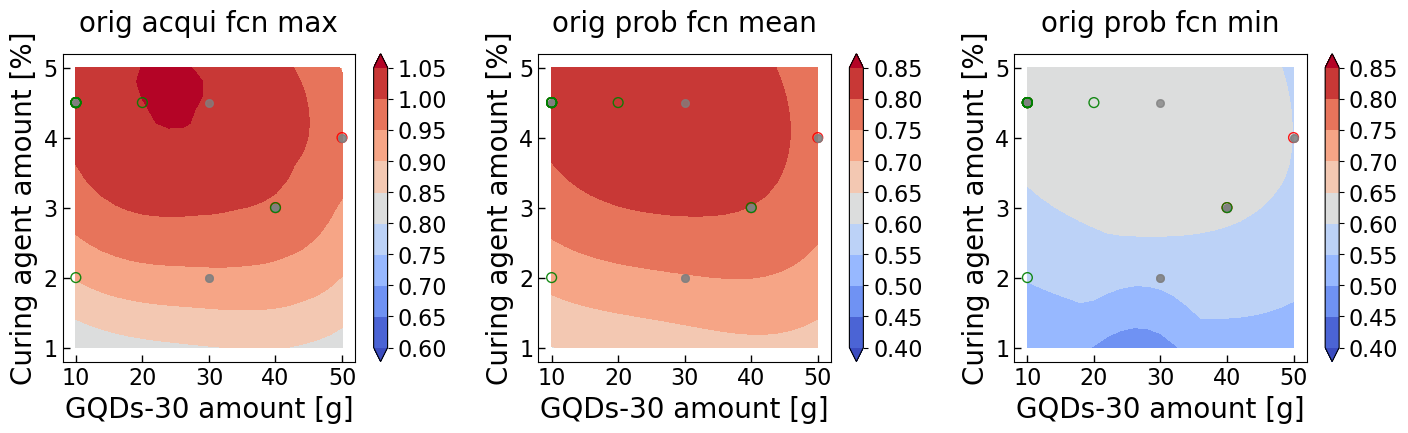

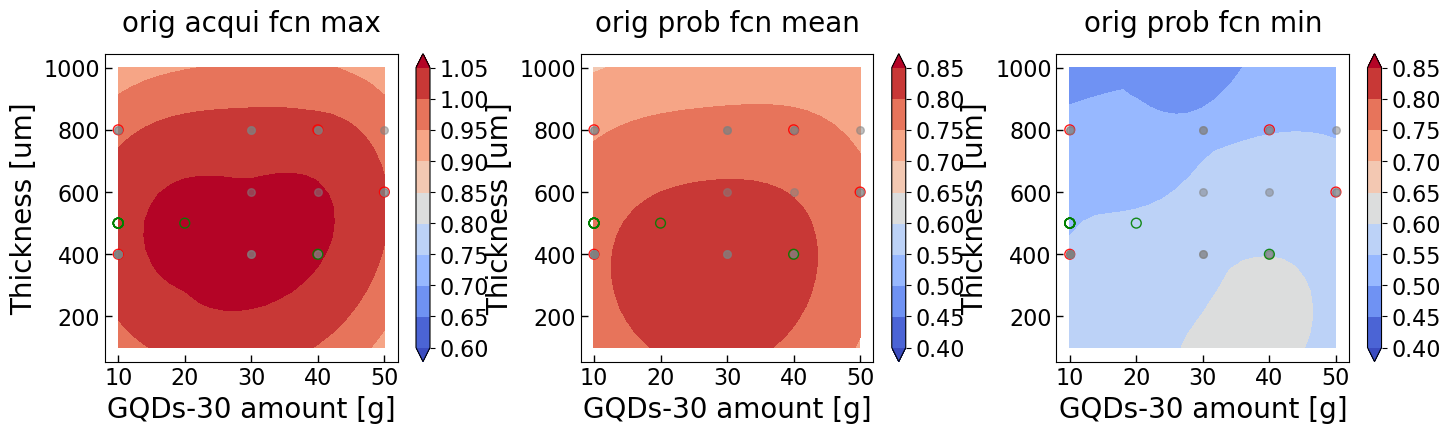

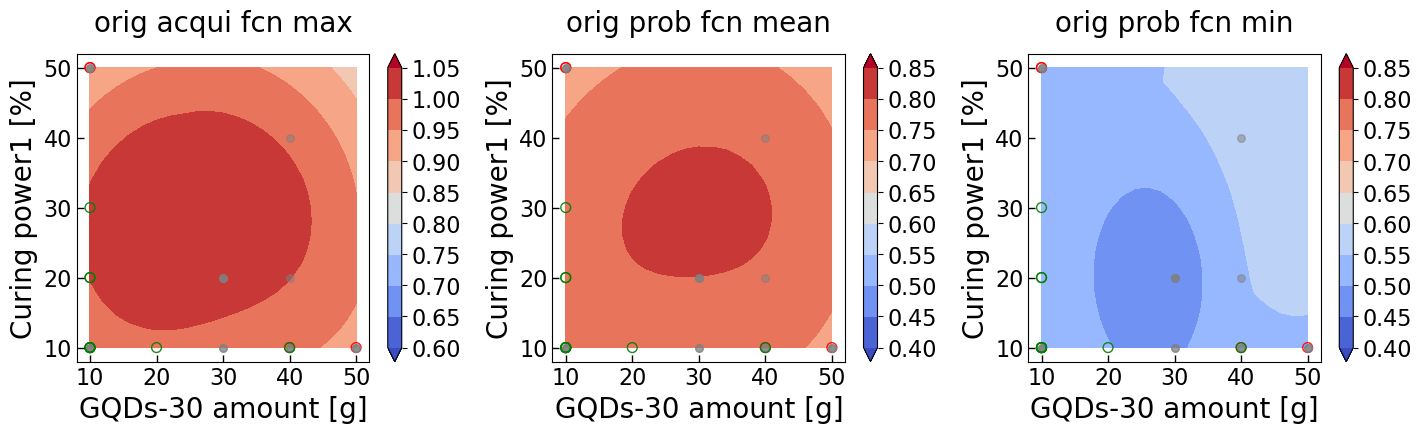

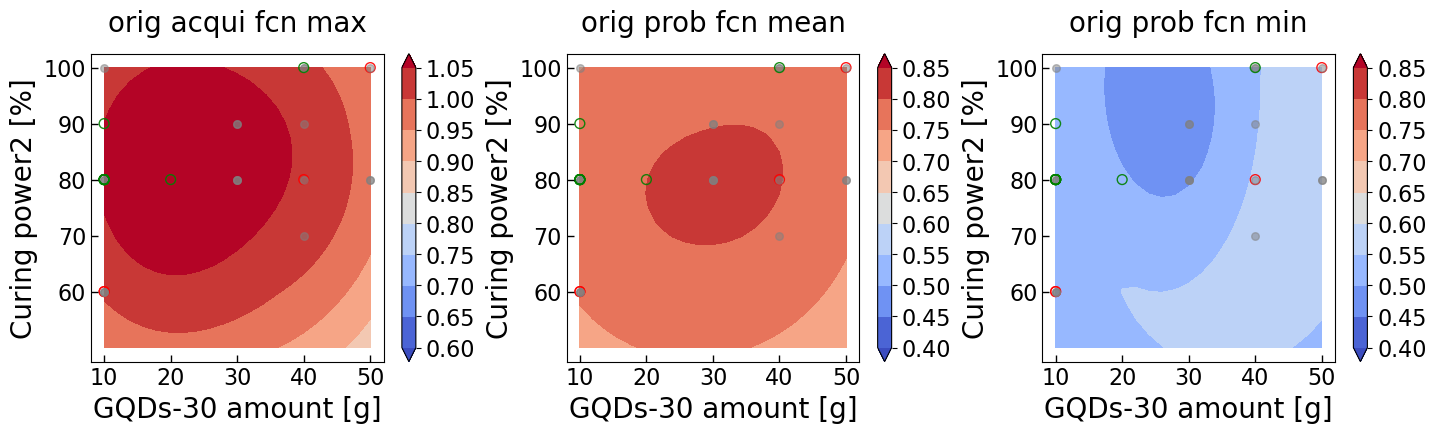

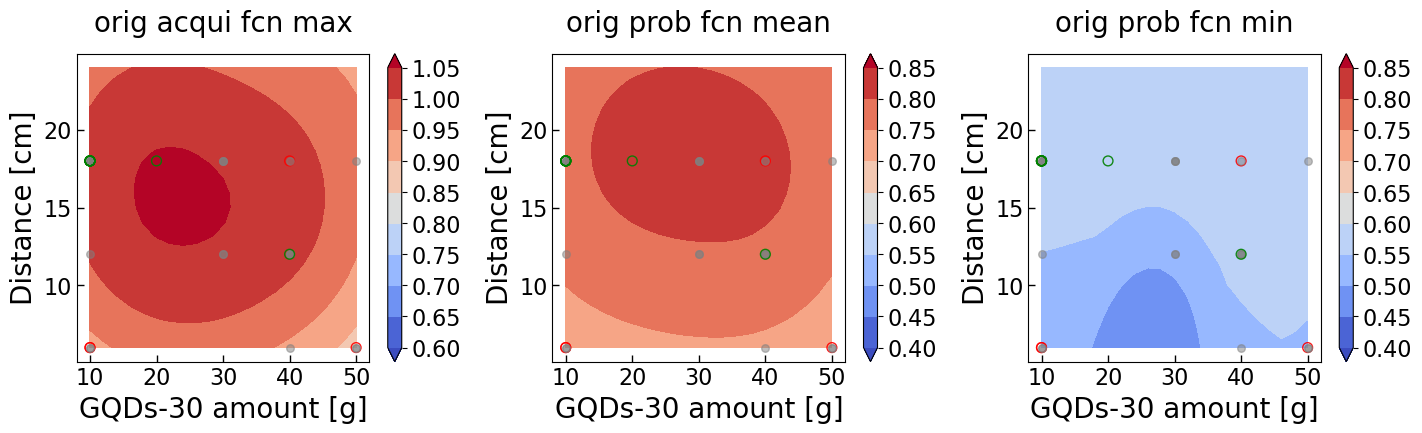

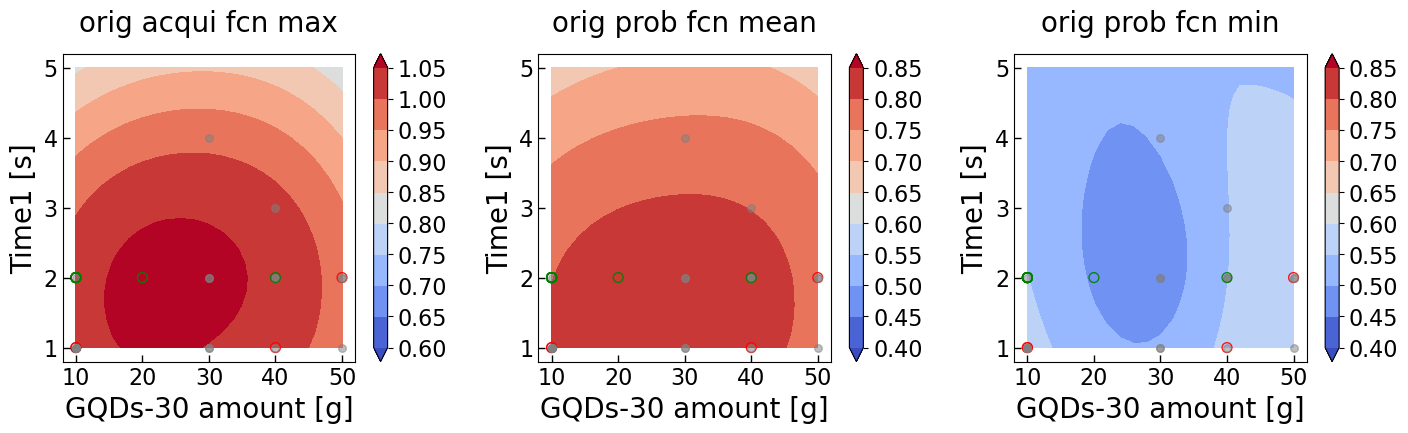

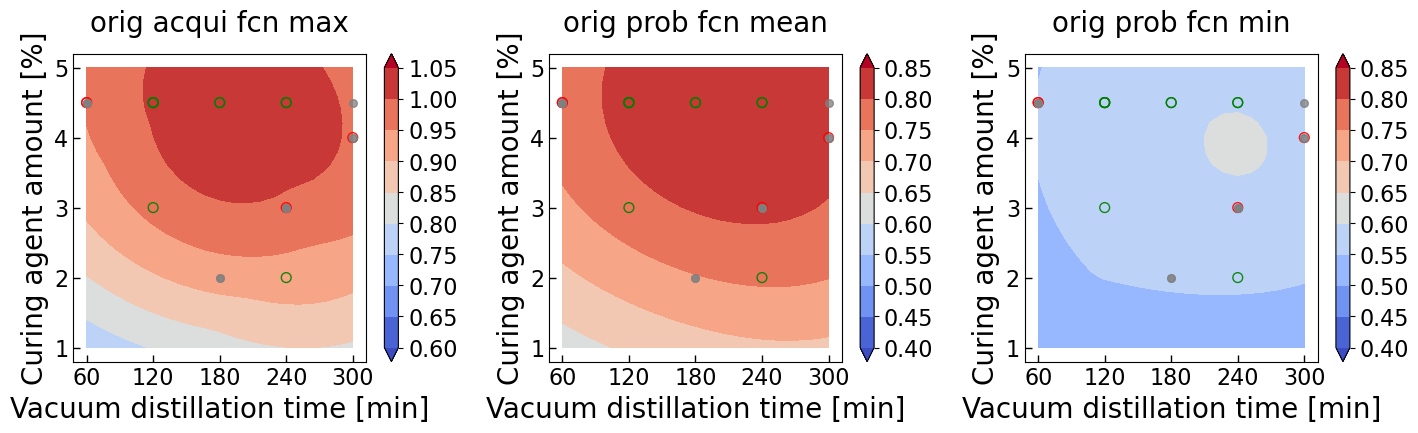

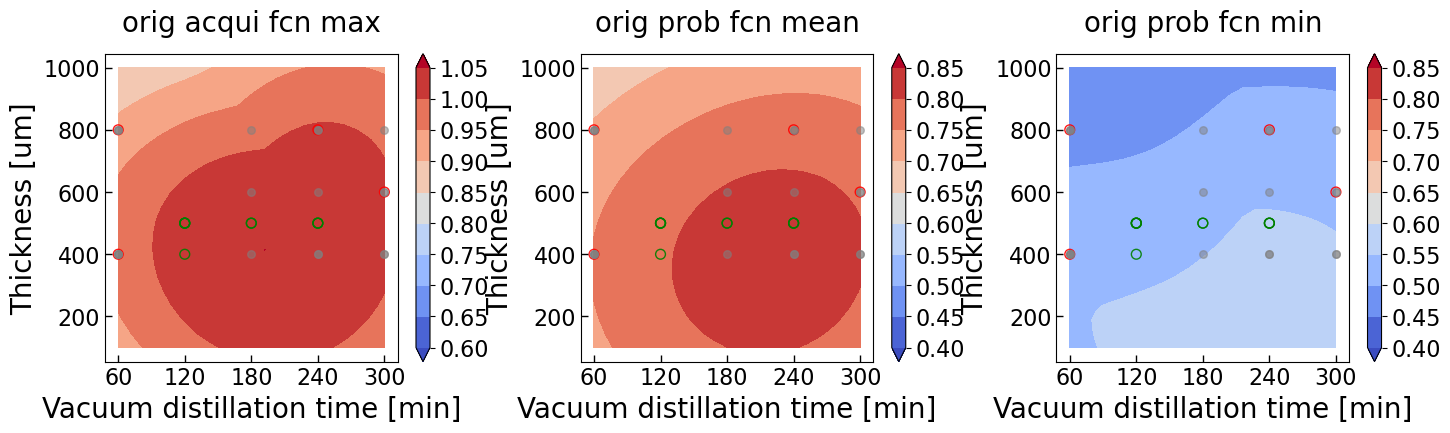

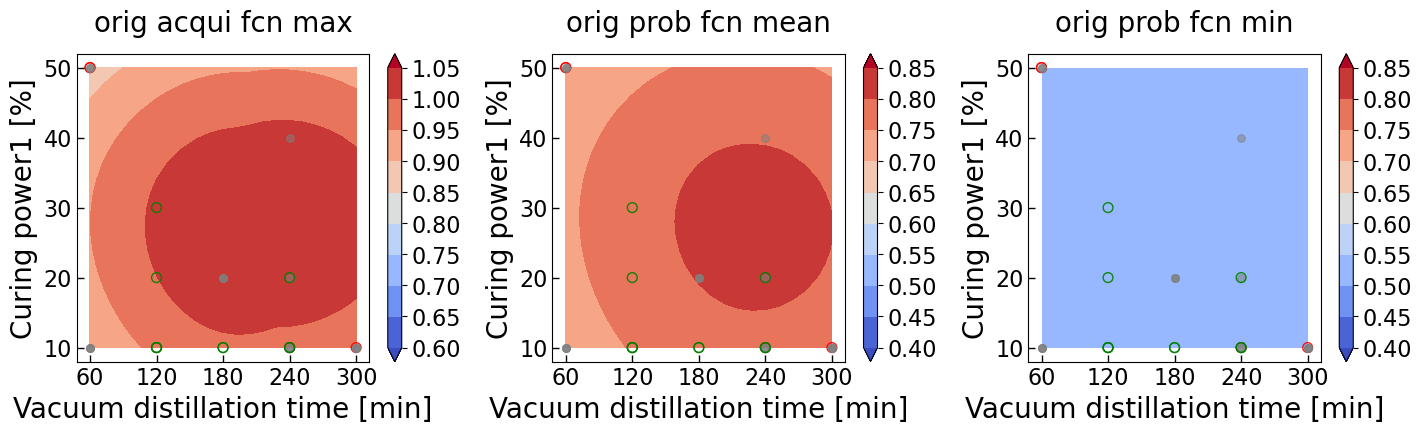

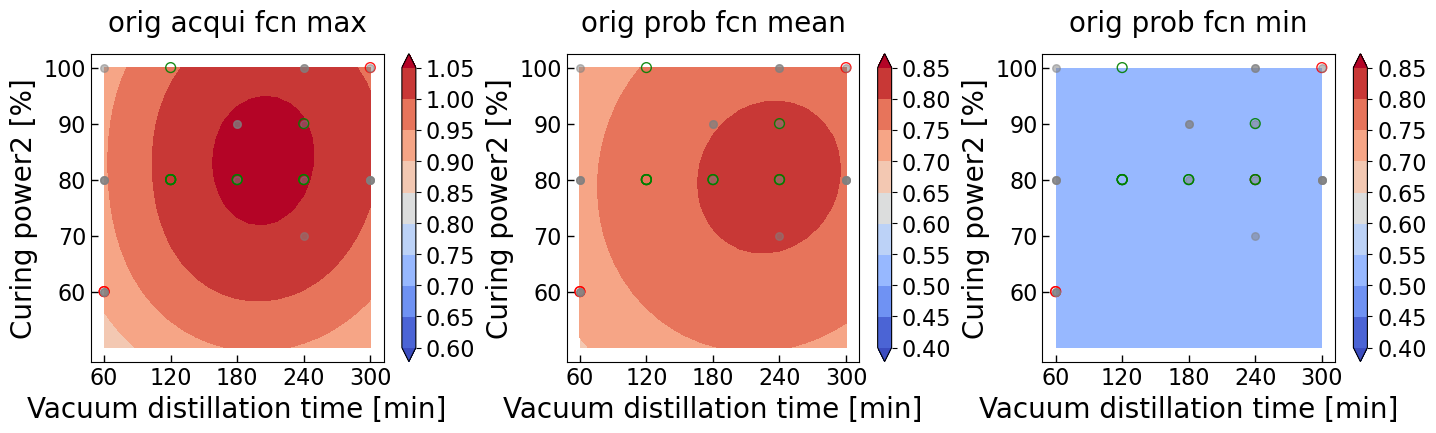

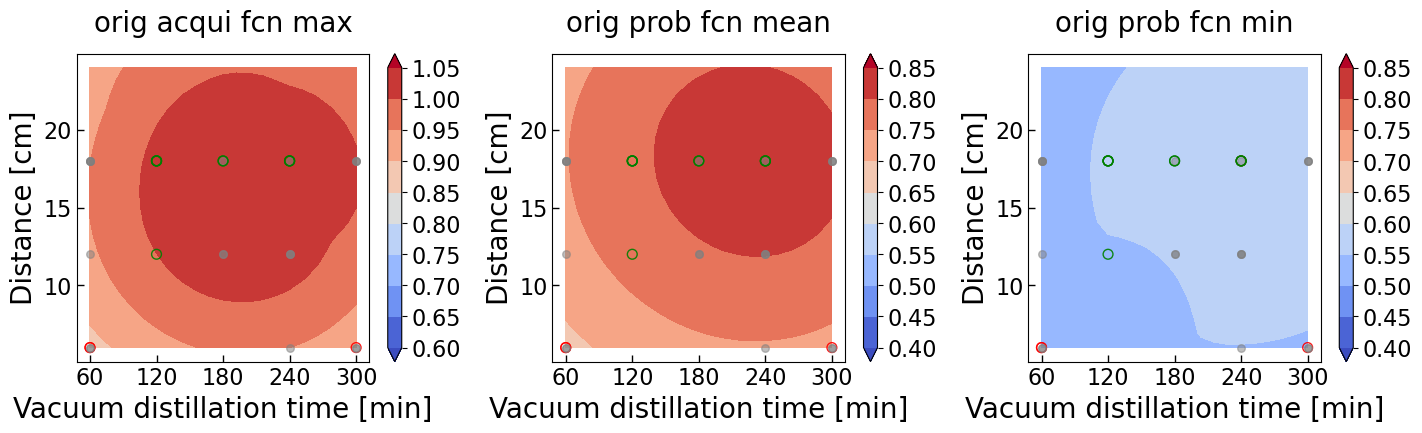

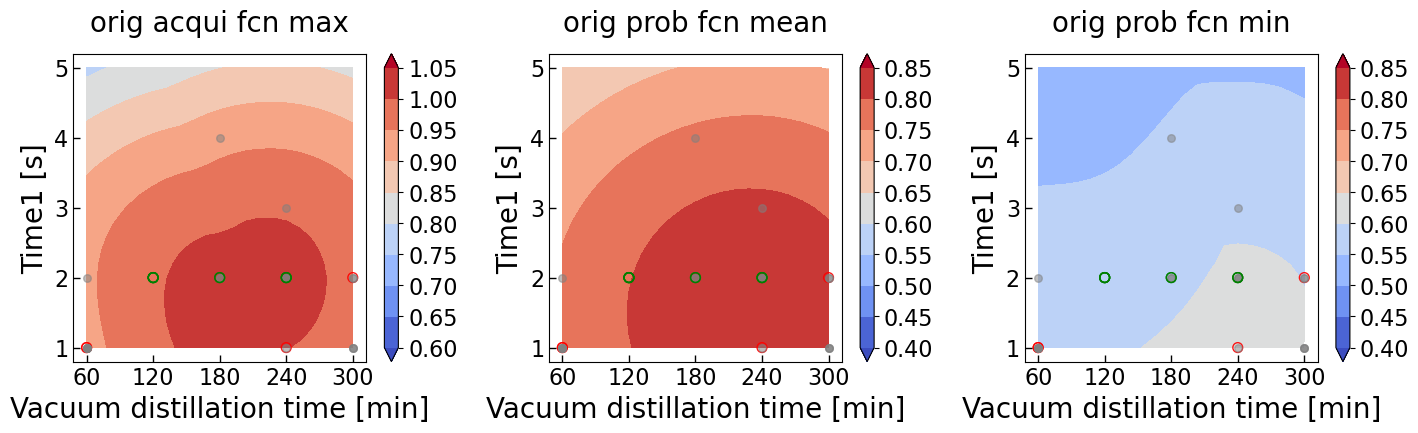

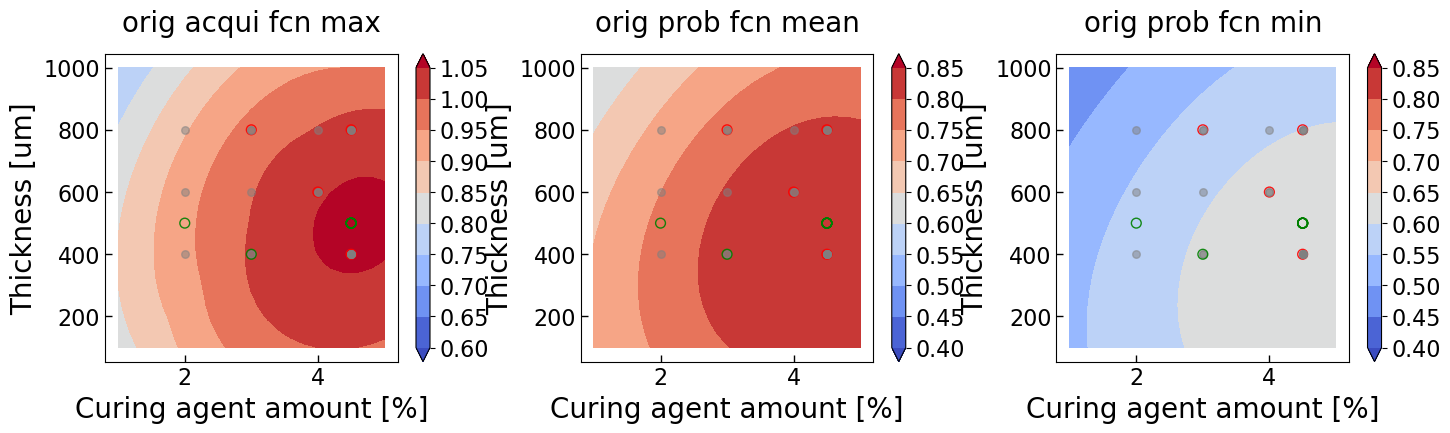

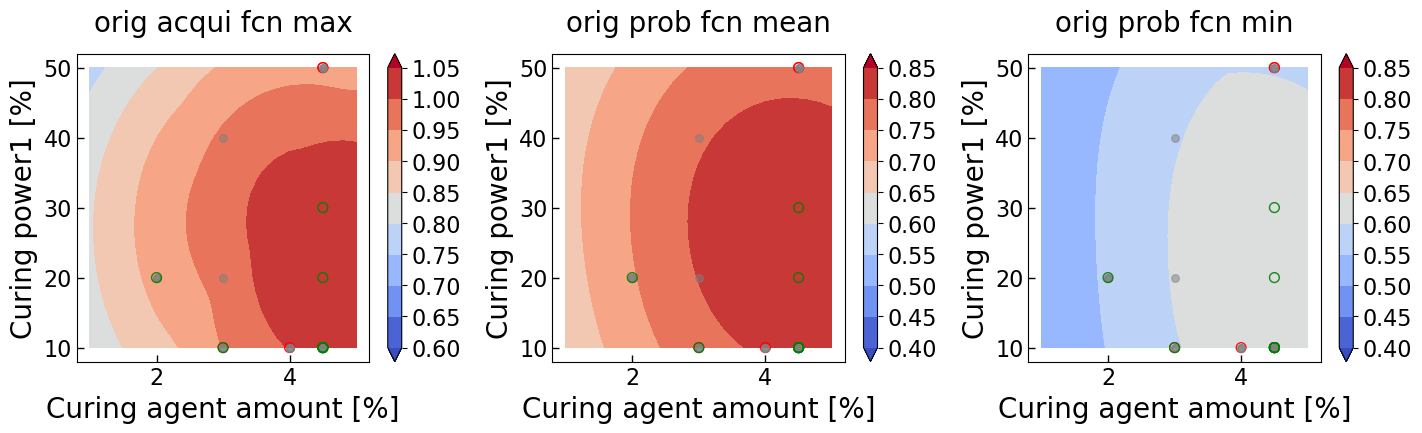

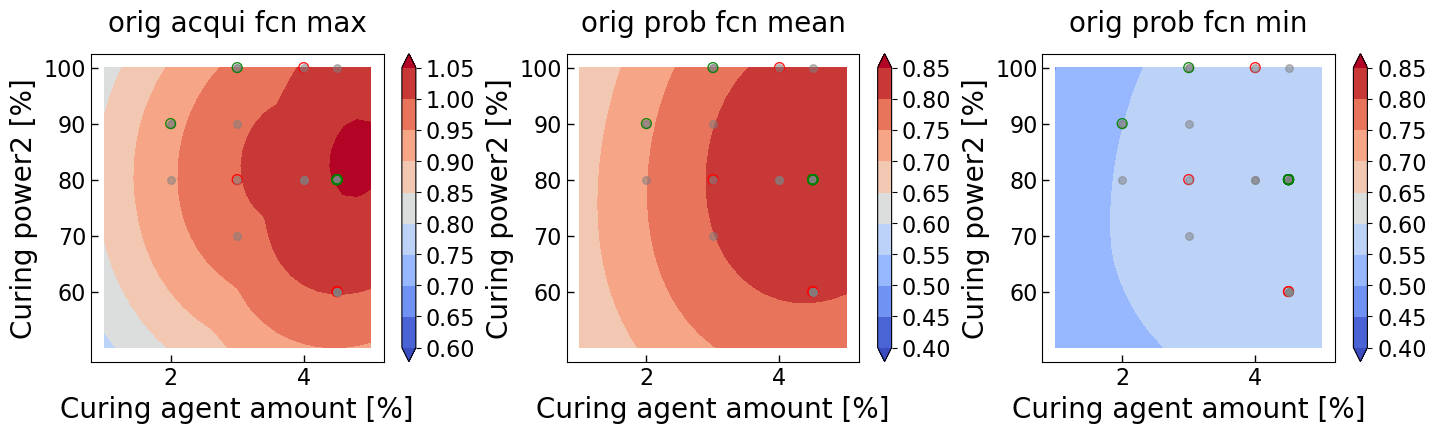

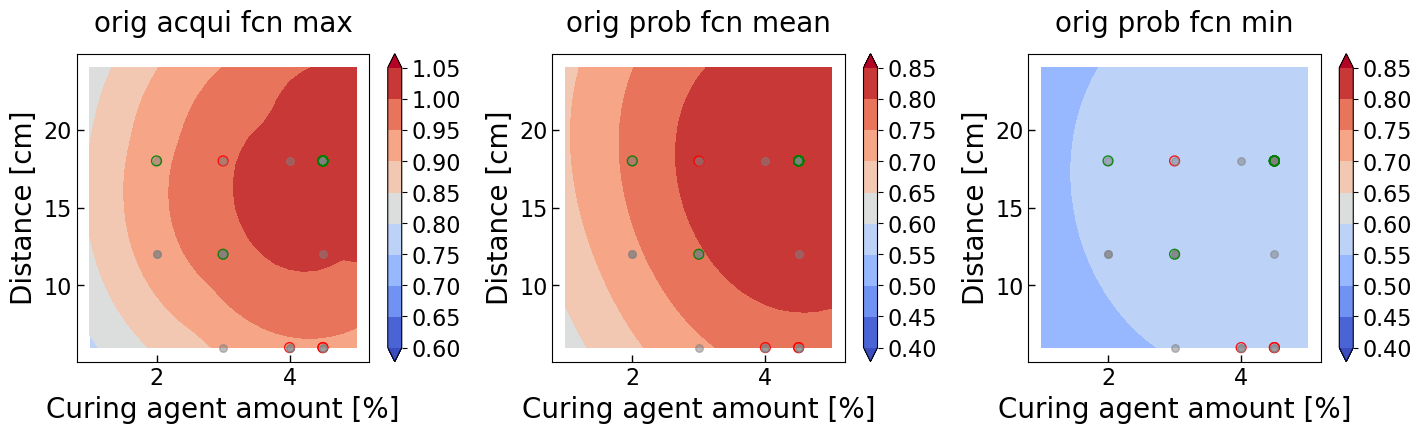

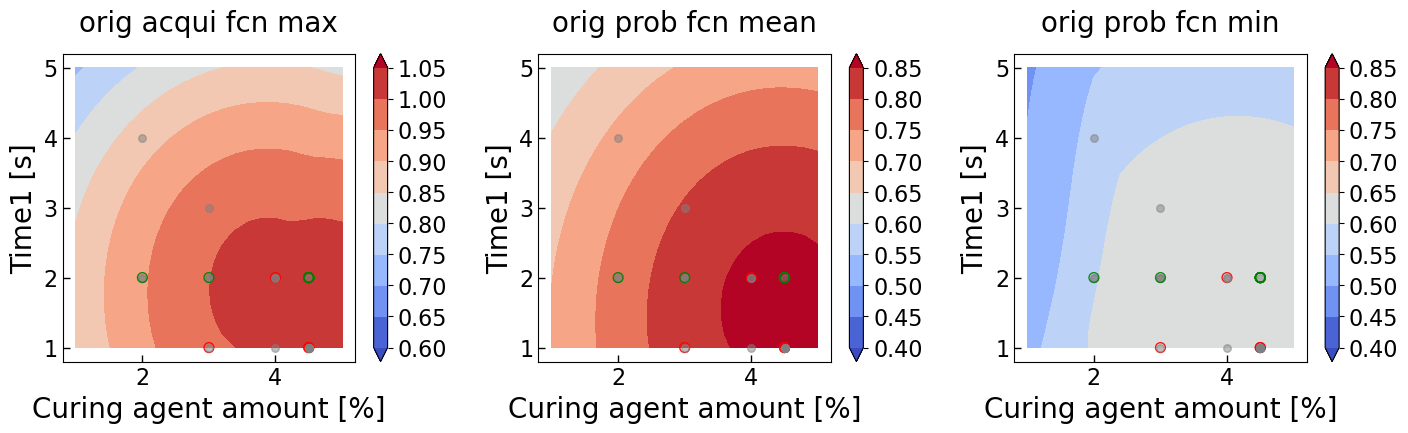

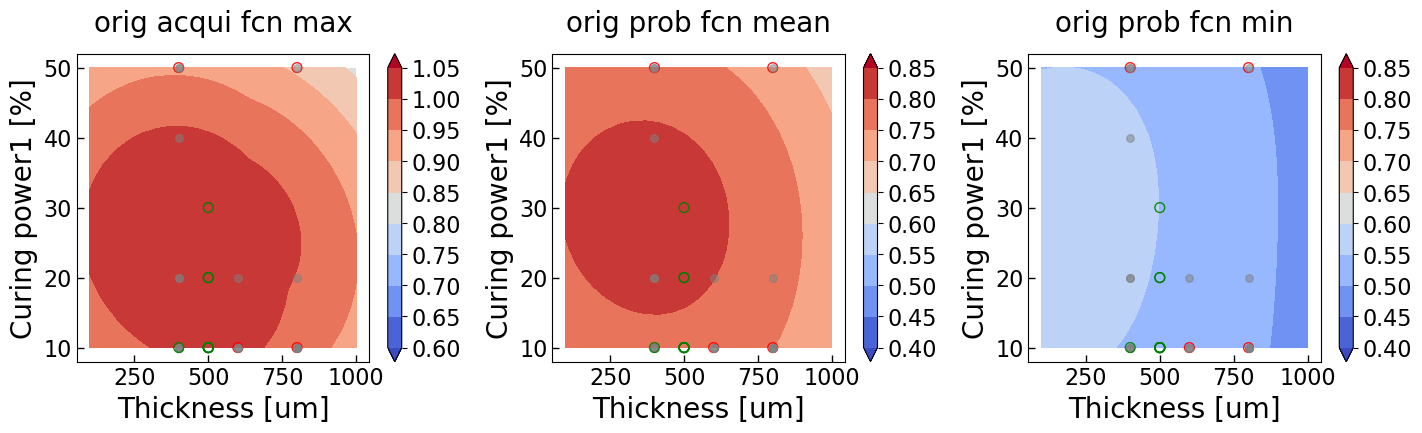

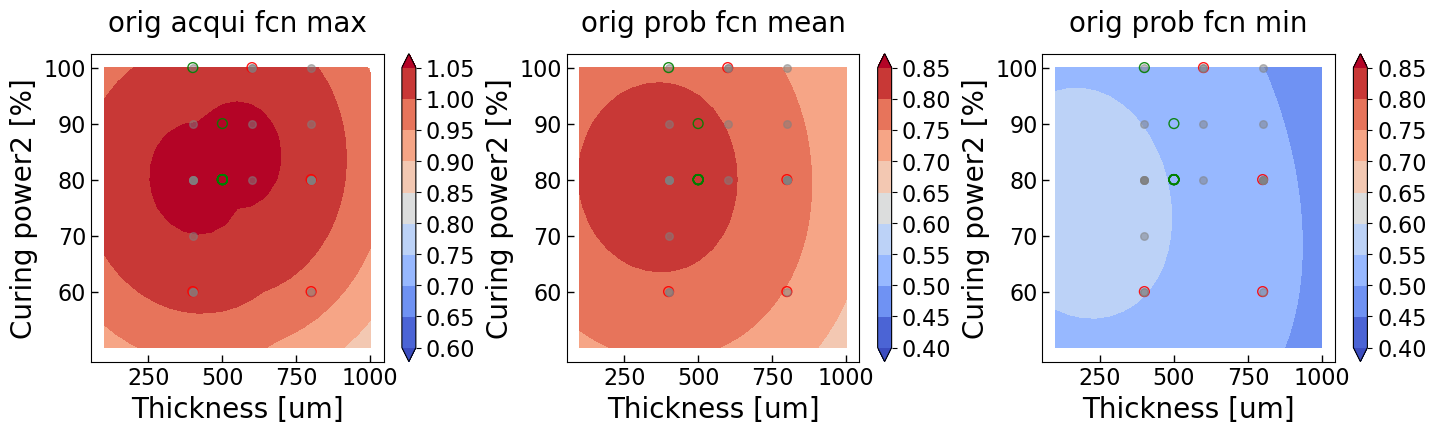

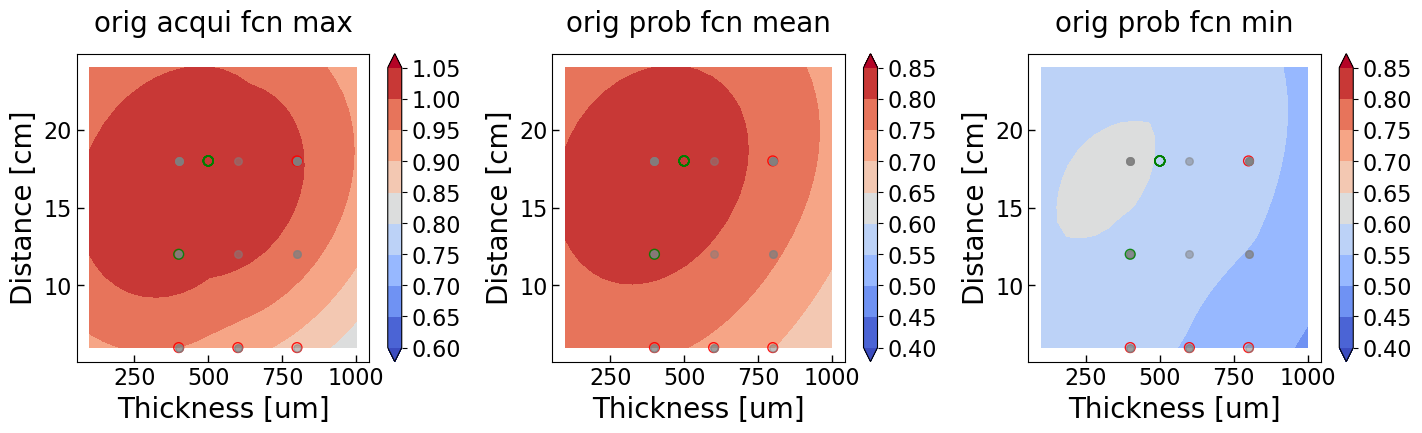

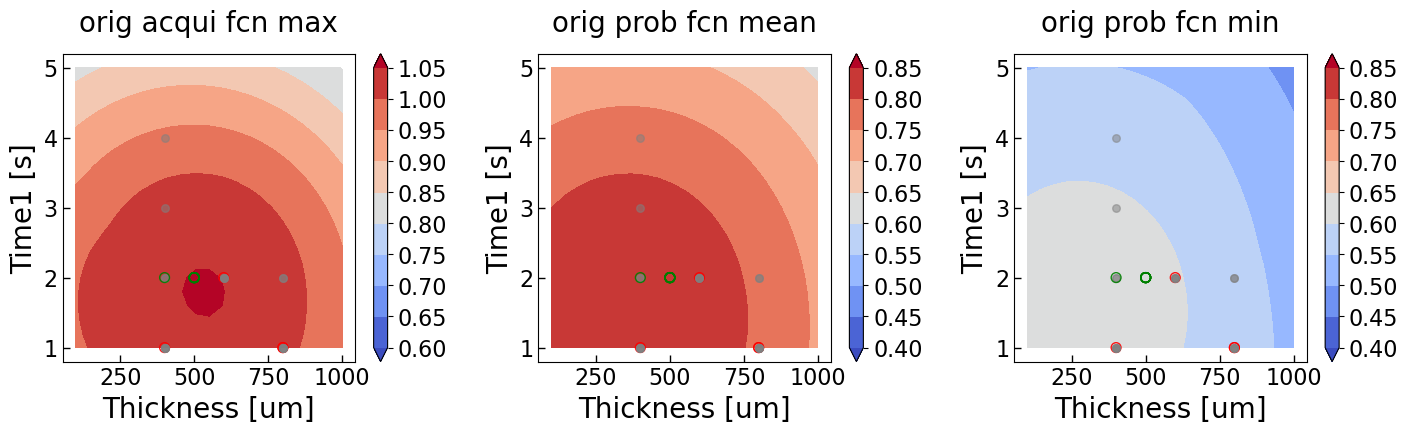

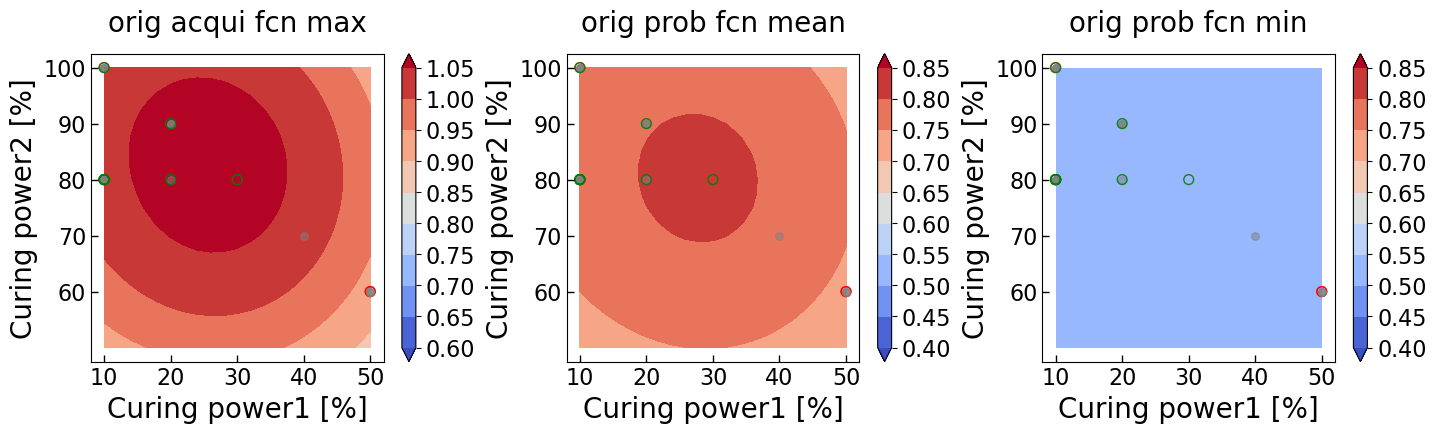

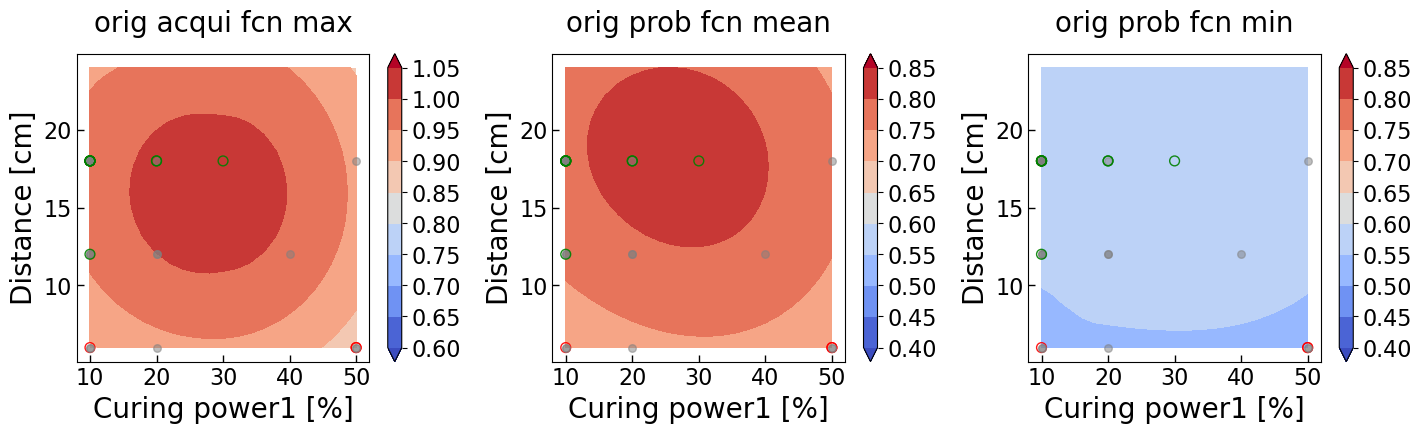

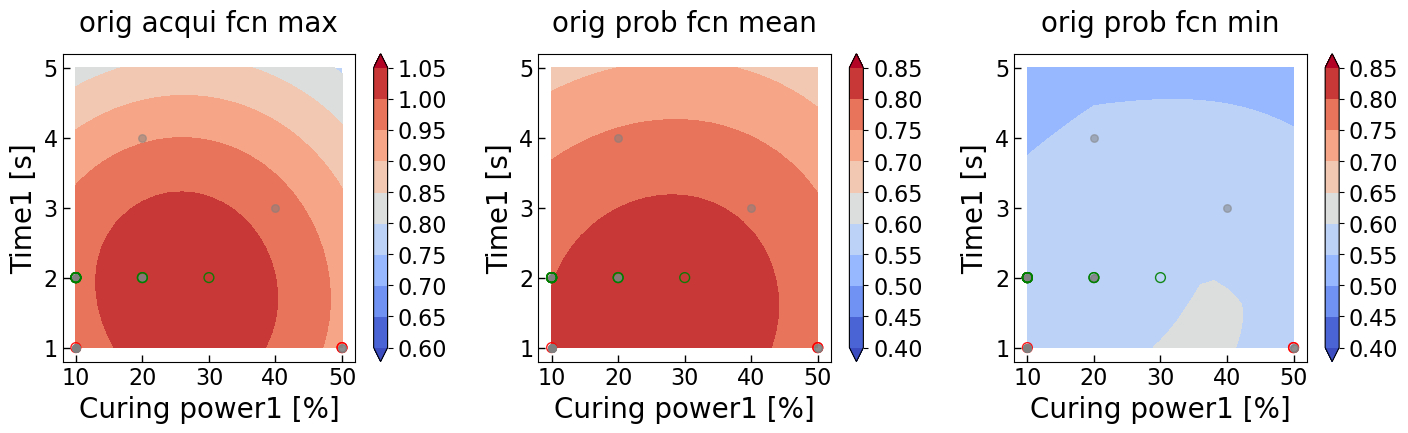

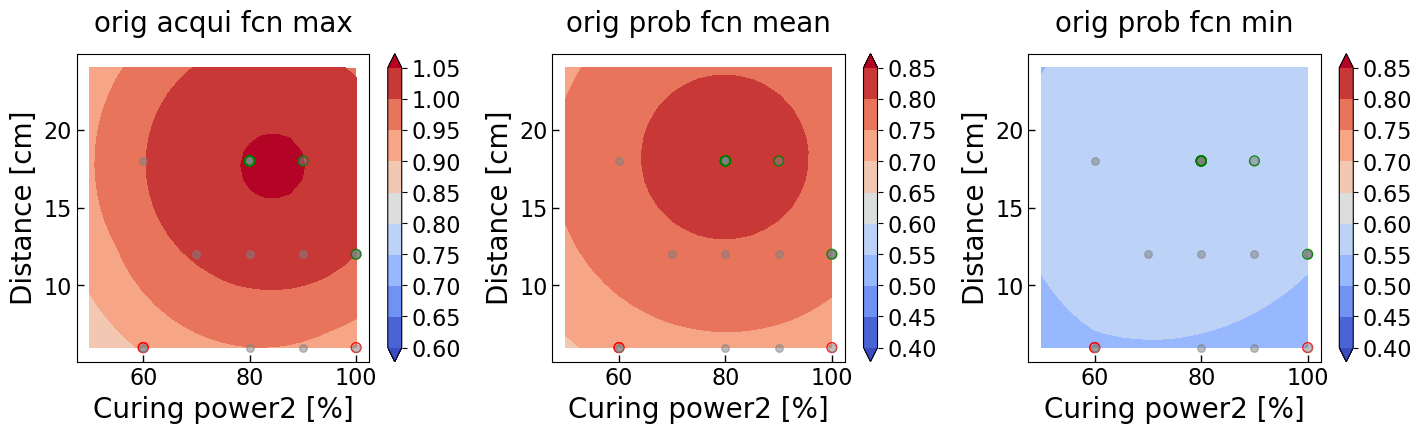

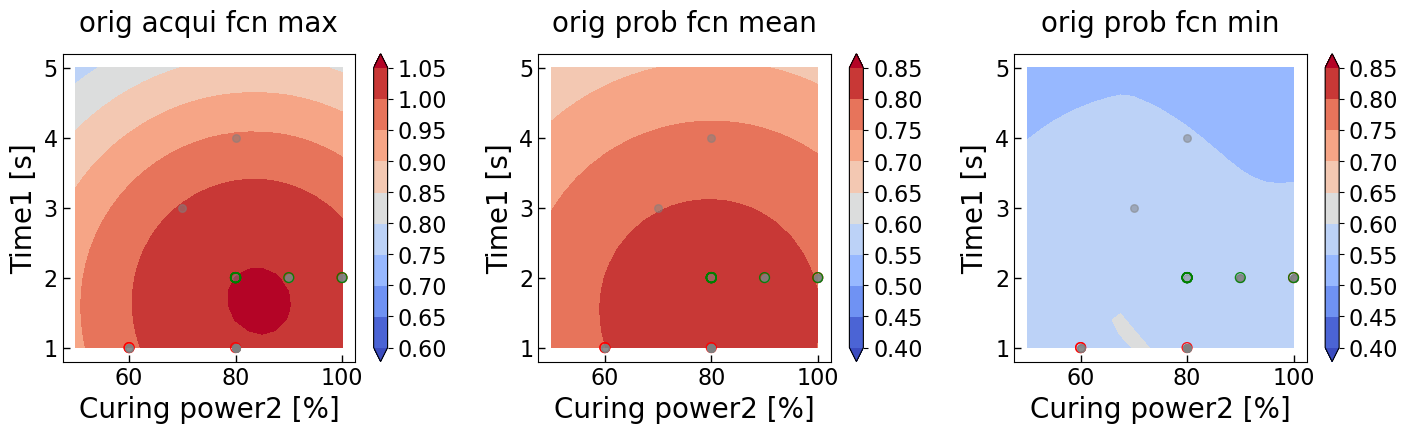

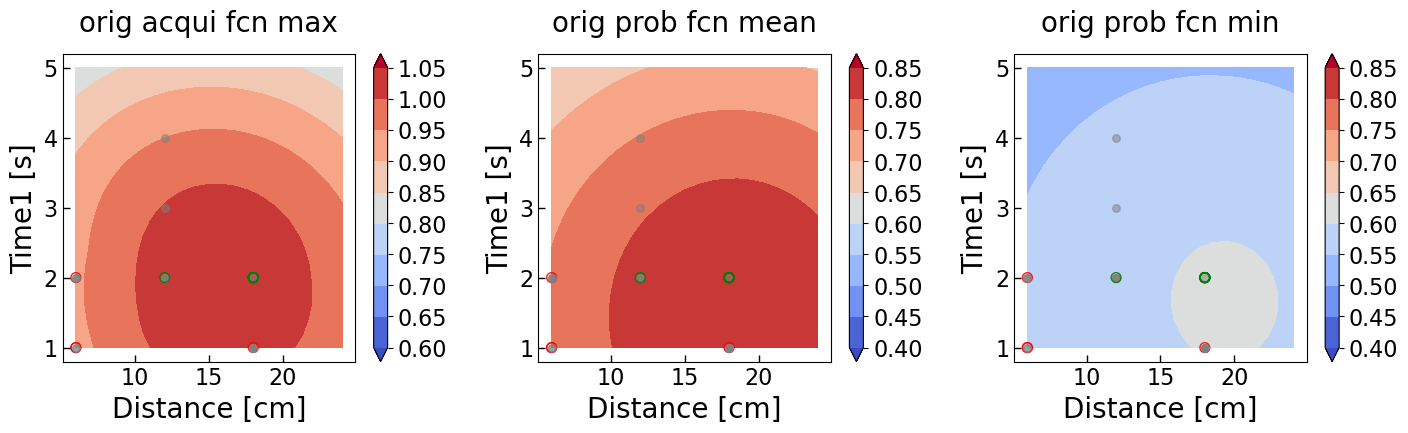

In [148]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:9].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        if ind2 >= len(x_columns):
            continue  
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_GQDs = np.copy(x_sampled)
                x_GQDs[:,ind1] = x1
                x_GQDs[:,ind2] = x2
                yc_pr = f_raw_acq(x_GQDs)
                x1_org = x_denormalizer(x_GQDs)[0,ind1]
                x2_org = x_denormalizer(x_GQDs)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.6, 0.4, 0.4]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y/100,levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                   x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                   s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(Xc)[:, ind1], 
                       x_denormalizer(Xc)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')

            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            if ind1==0:#GQDs-30 amount
                ax.set_xticks([10,20, 30, 40, 50])
            if ind1==1:#VVacuum distillation time
                ax.set_xticks([60, 120, 180, 240,300])
            if ind1==4:#Curing power1
                ax.set_xticks([10, 20, 30, 40, 50])
            if ind2==5:#Curing power2
                ax.set_yticks([60, 70, 80, 90, 100])
            #axes[i].grid(True, linestyle='-.')

        axes[0].set_title('orig acqui fcn max', pad = title_pad, fontsize = fs)
        axes[1].set_title('orig prob fcn mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('orig prob fcn min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()

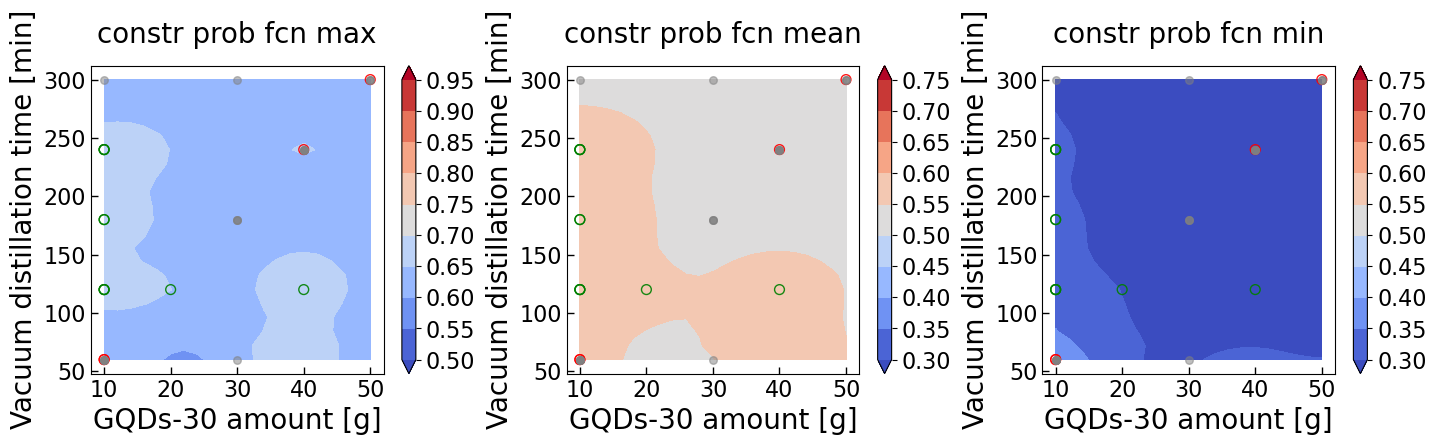

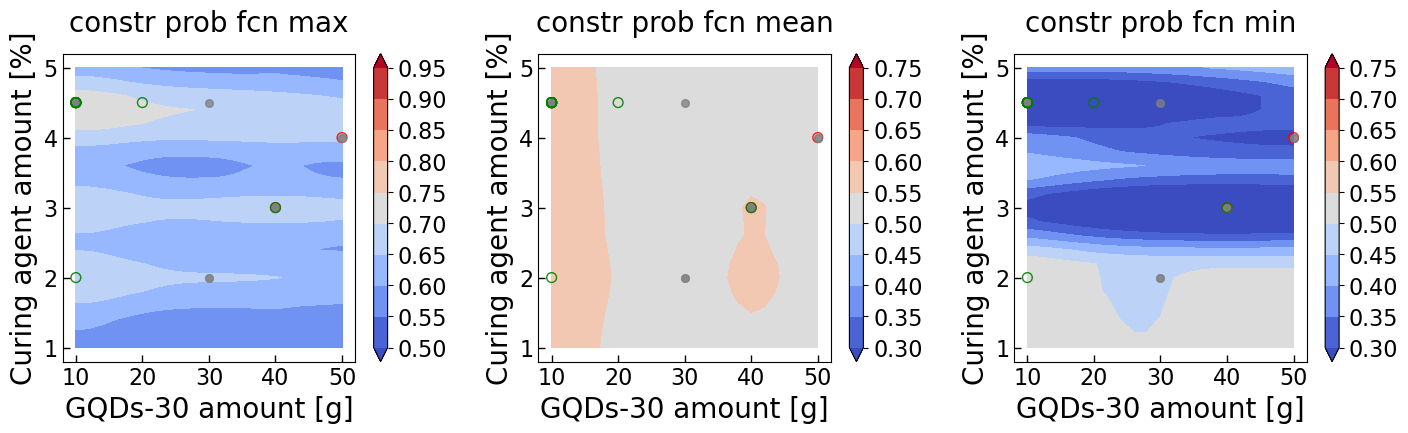

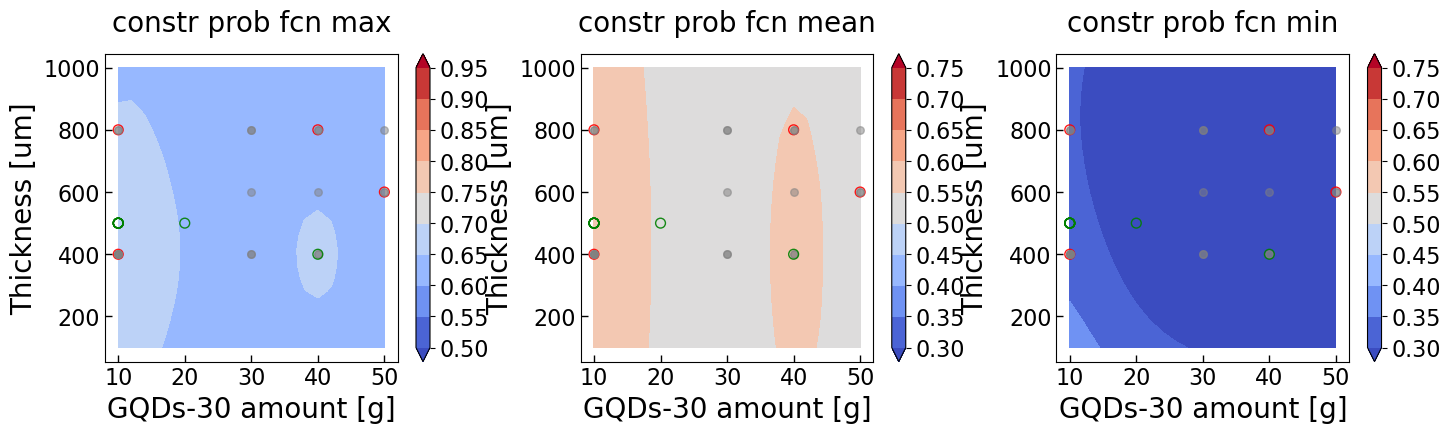

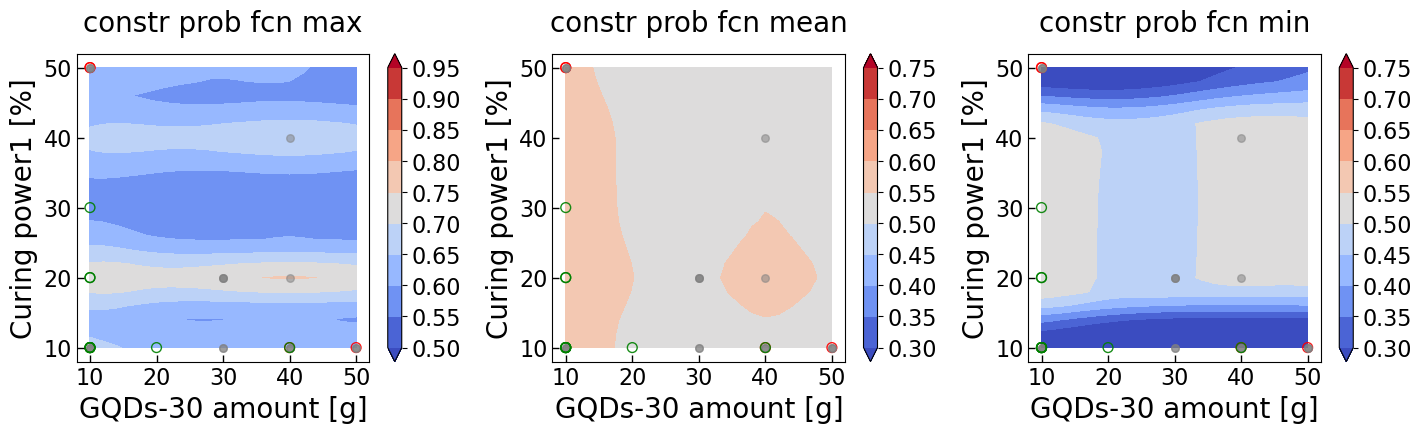

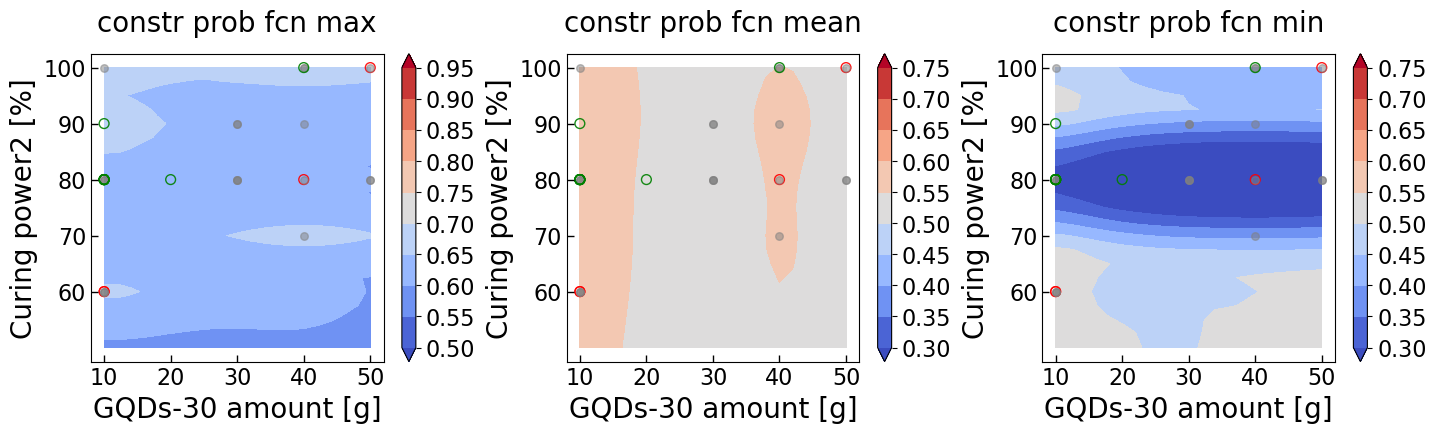

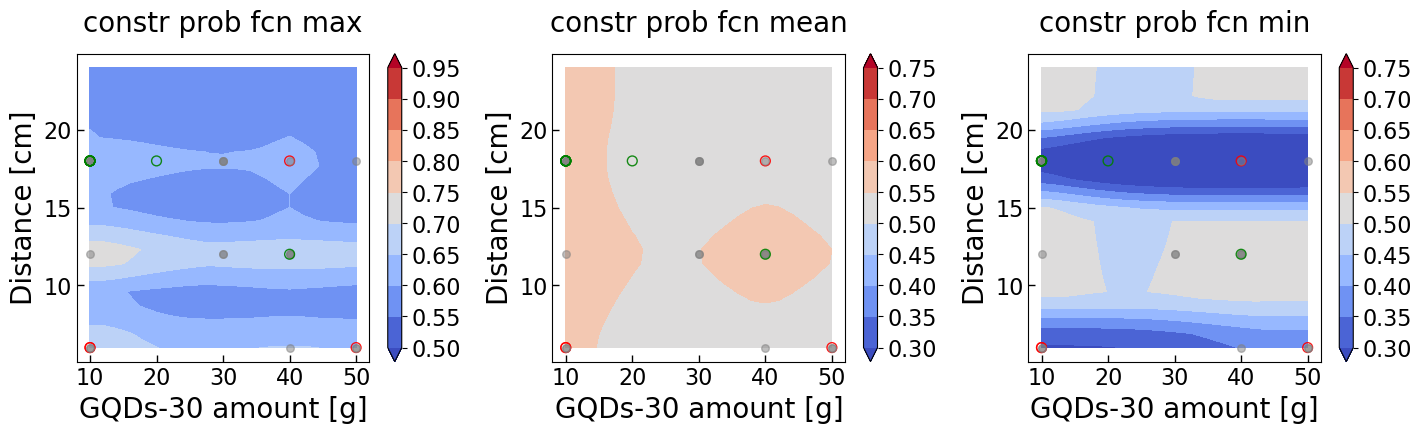

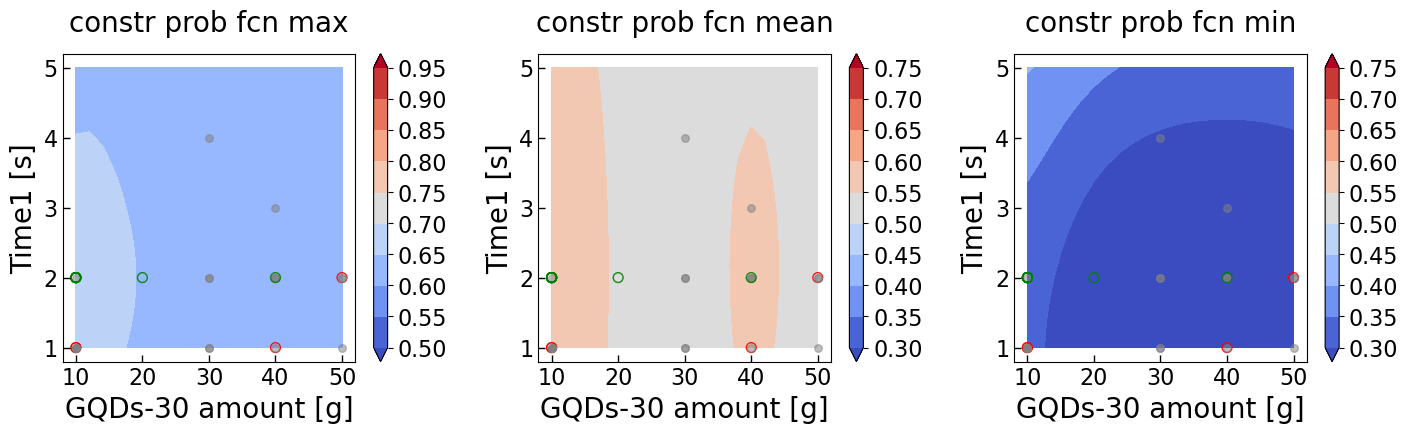

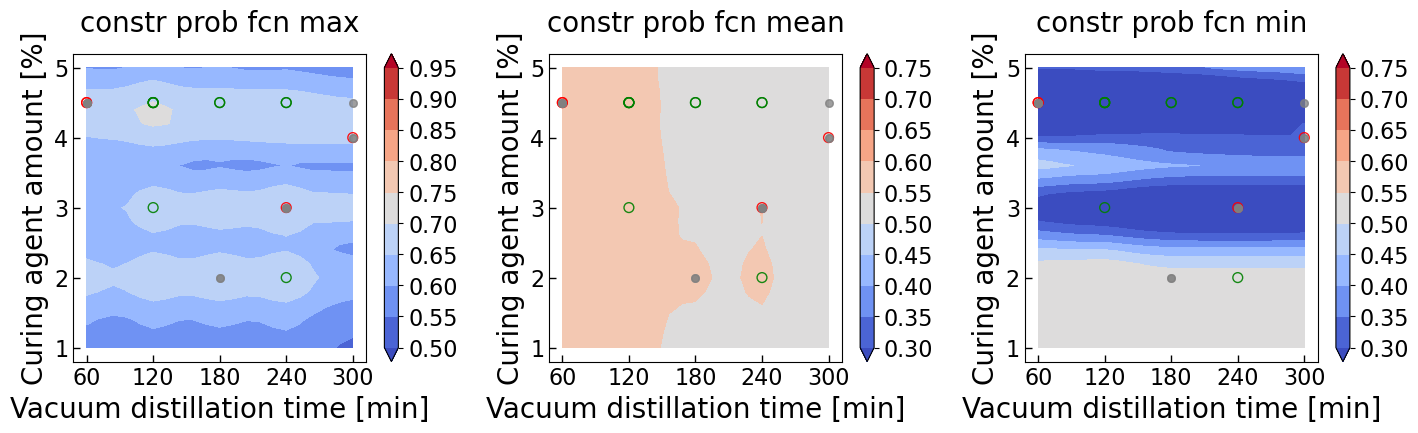

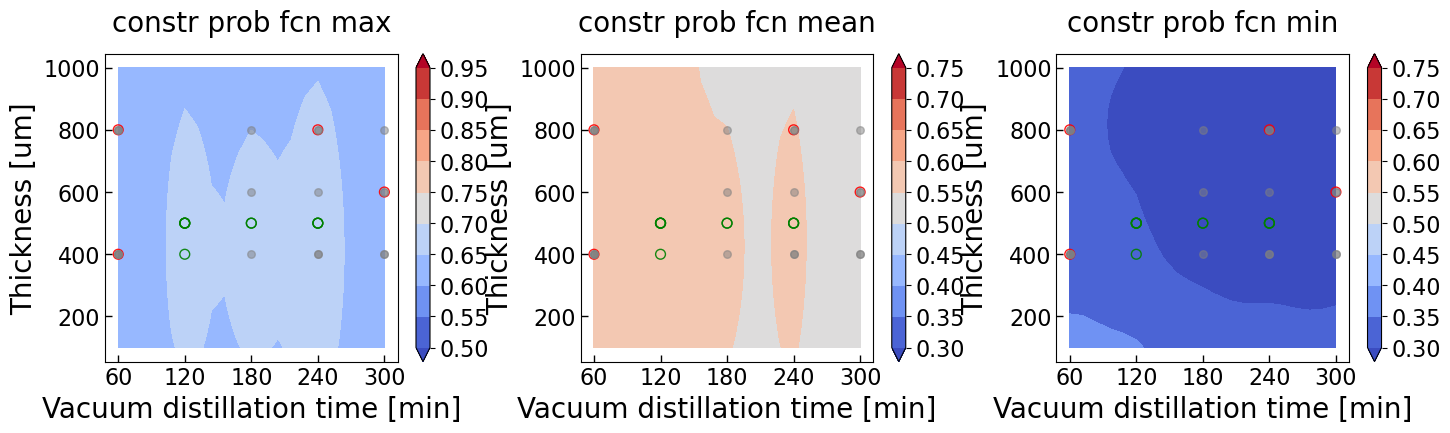

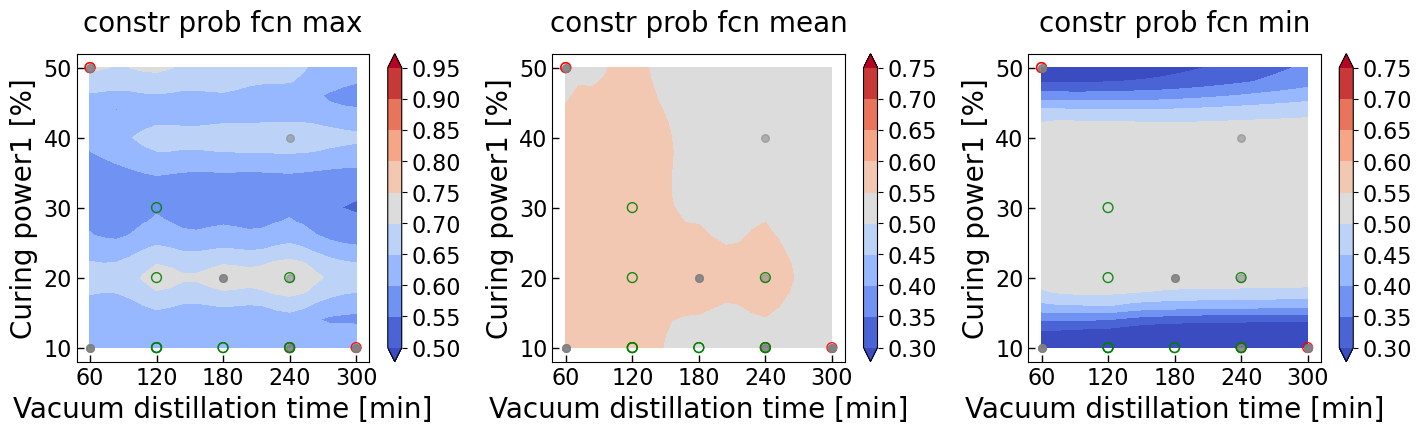

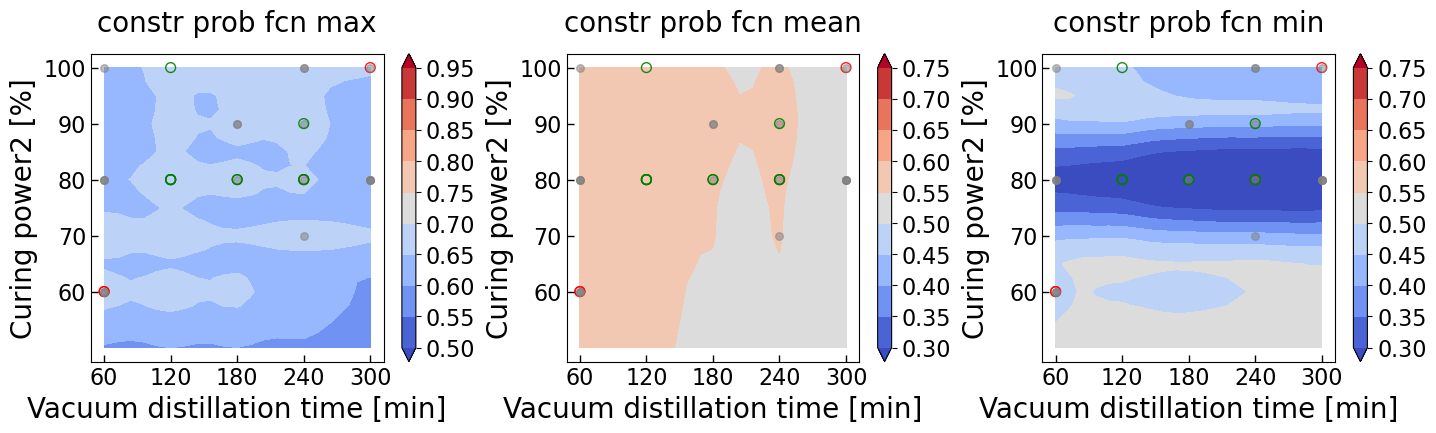

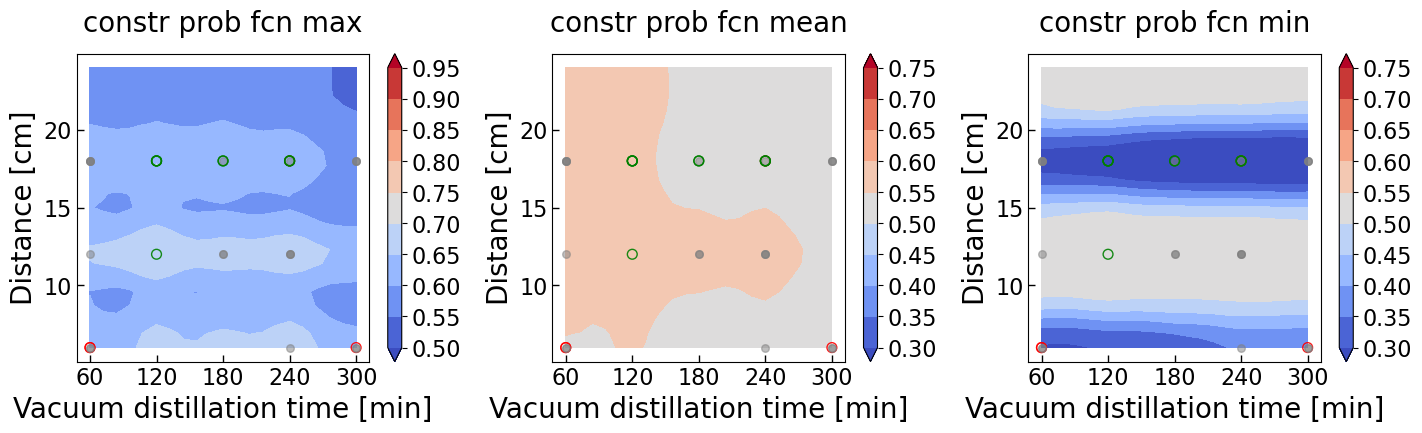

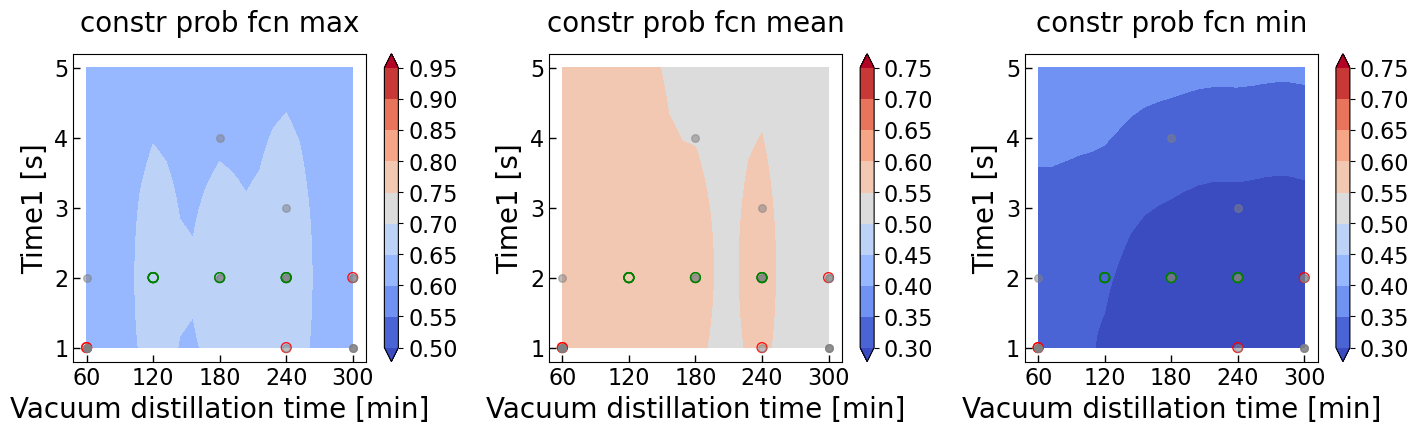

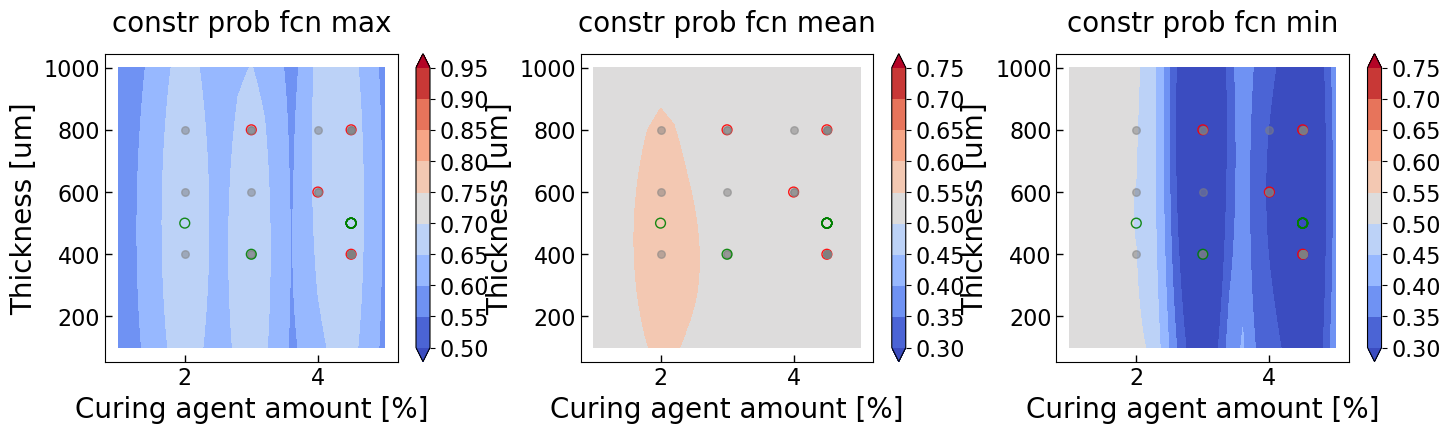

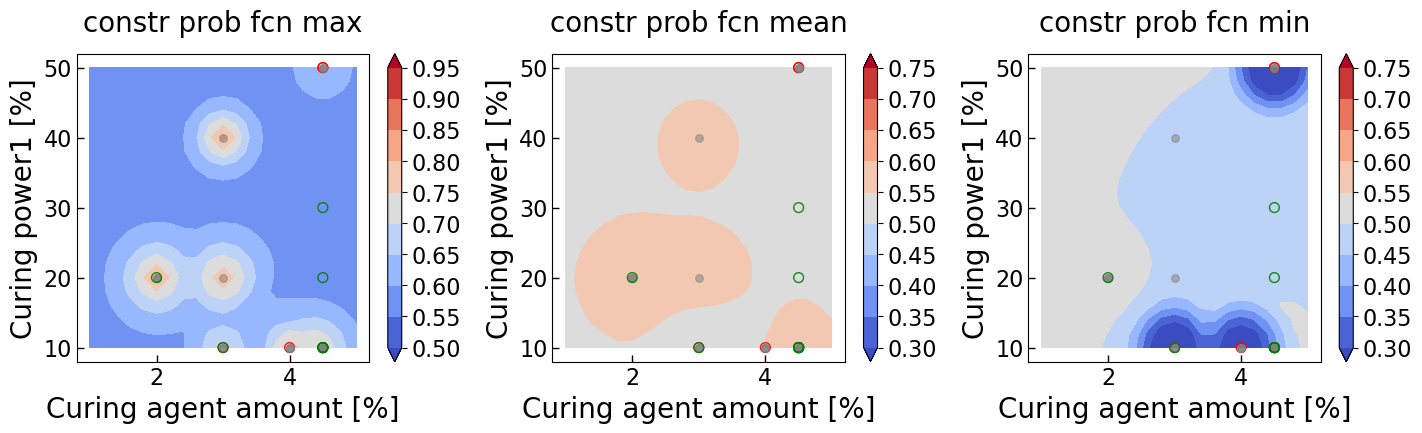

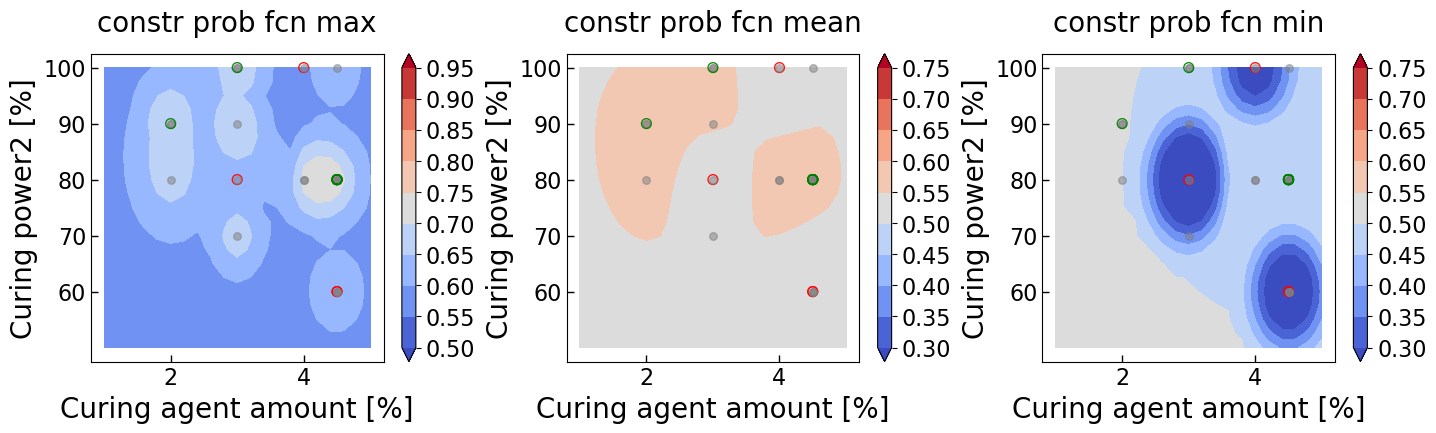

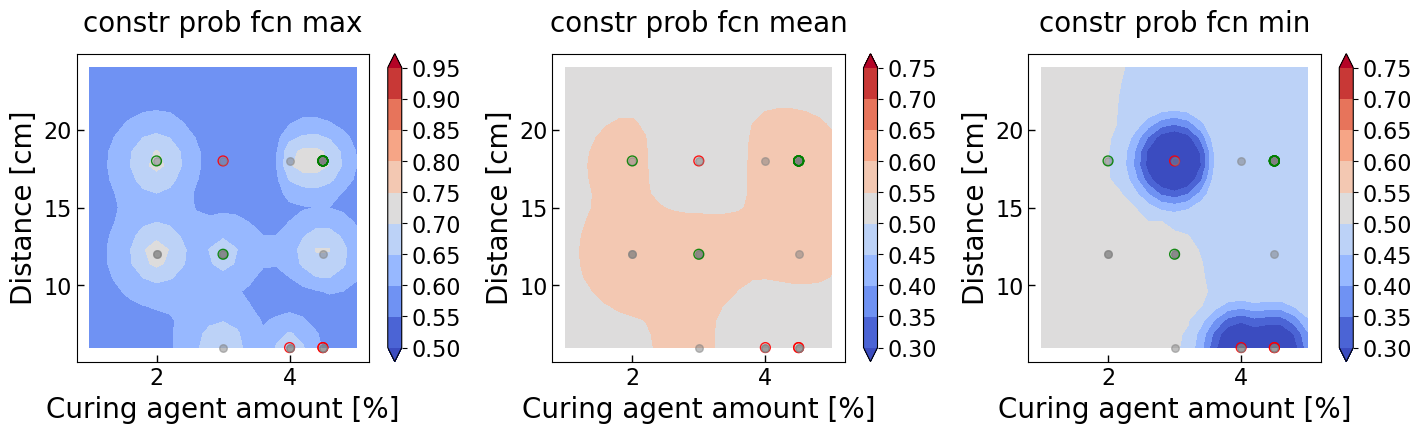

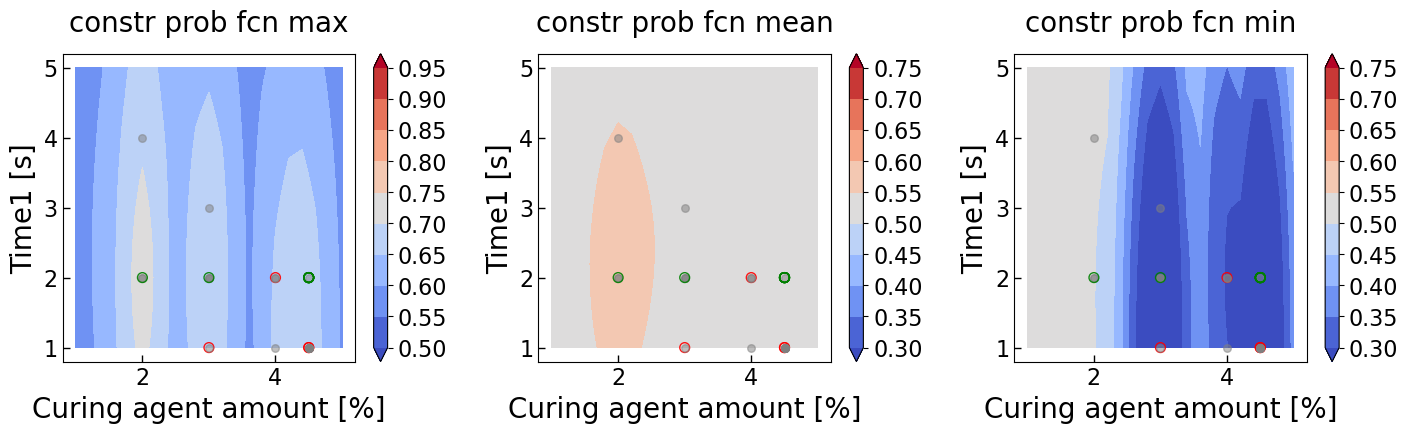

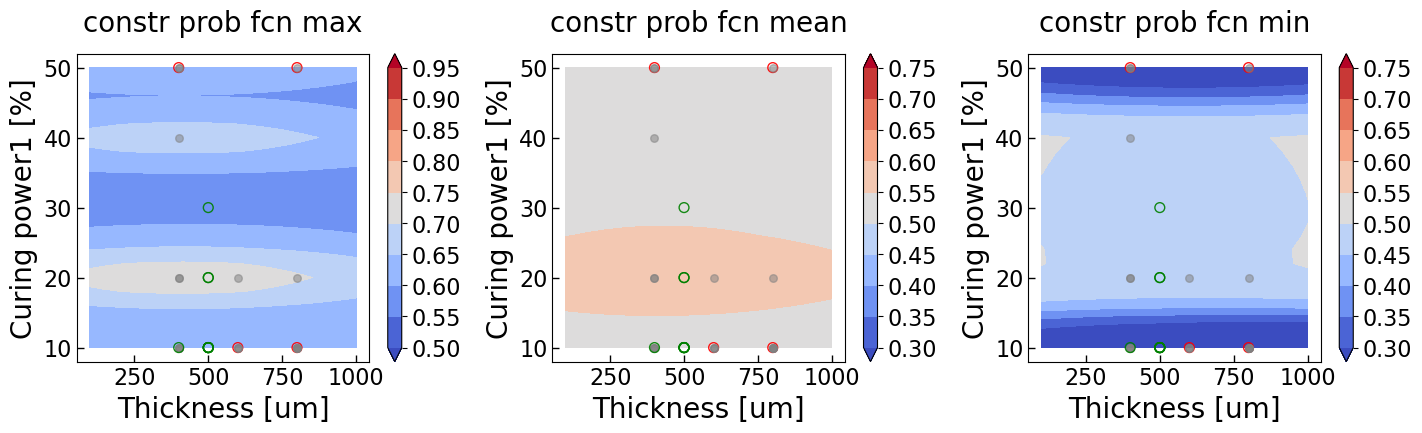

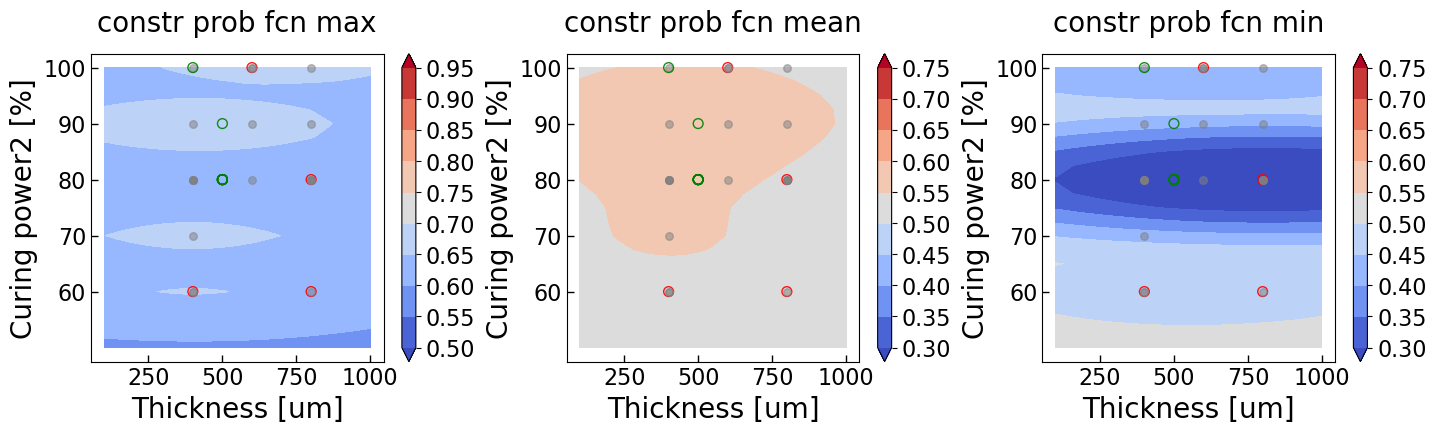

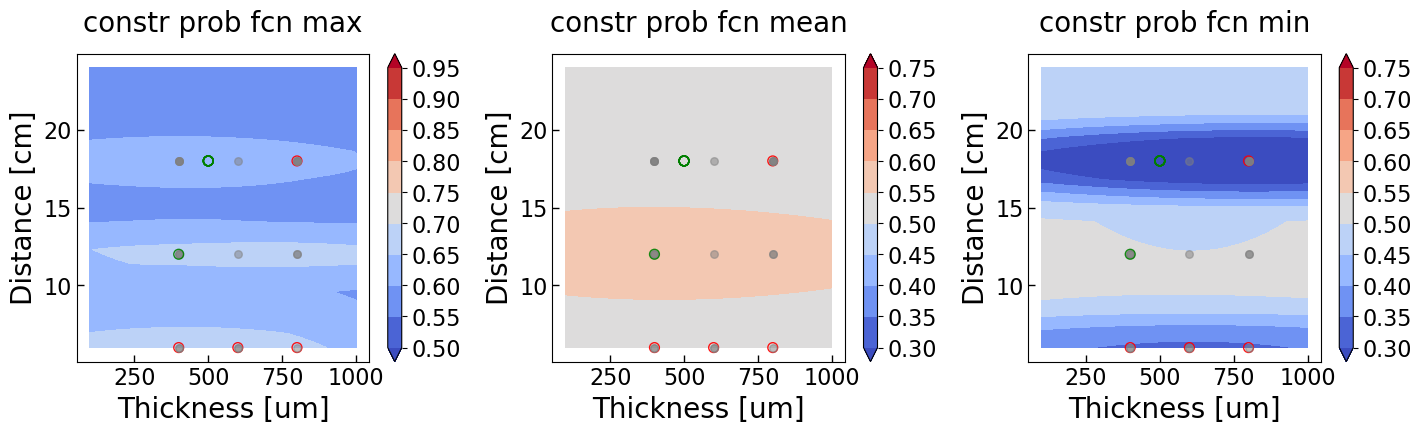

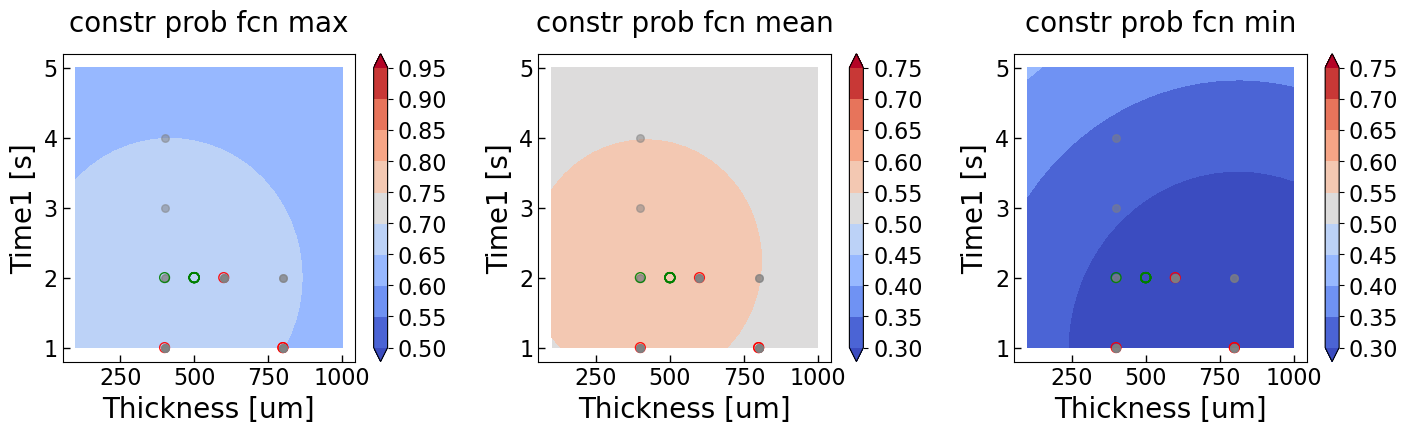

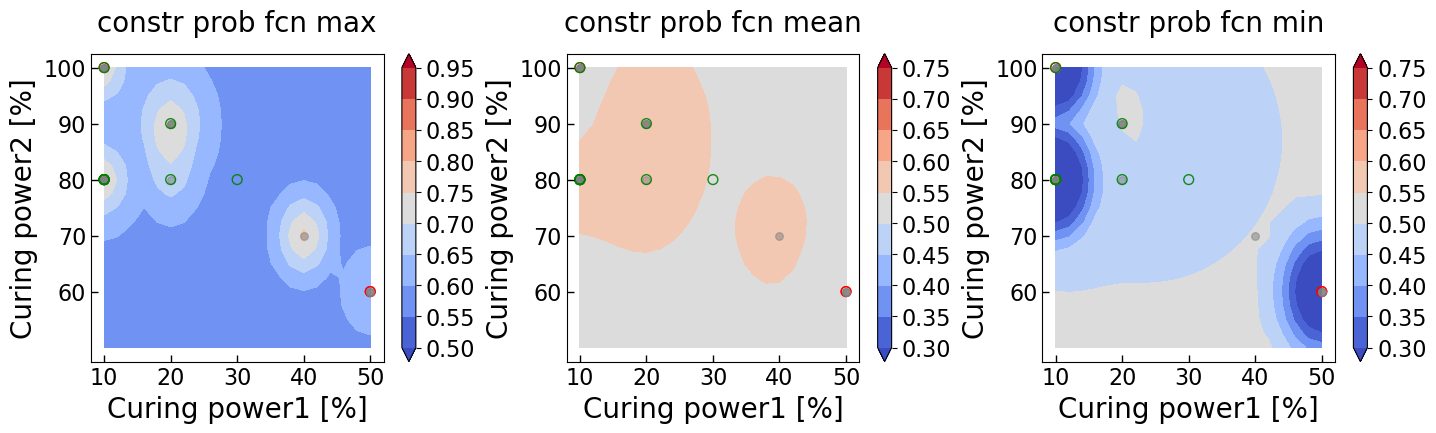

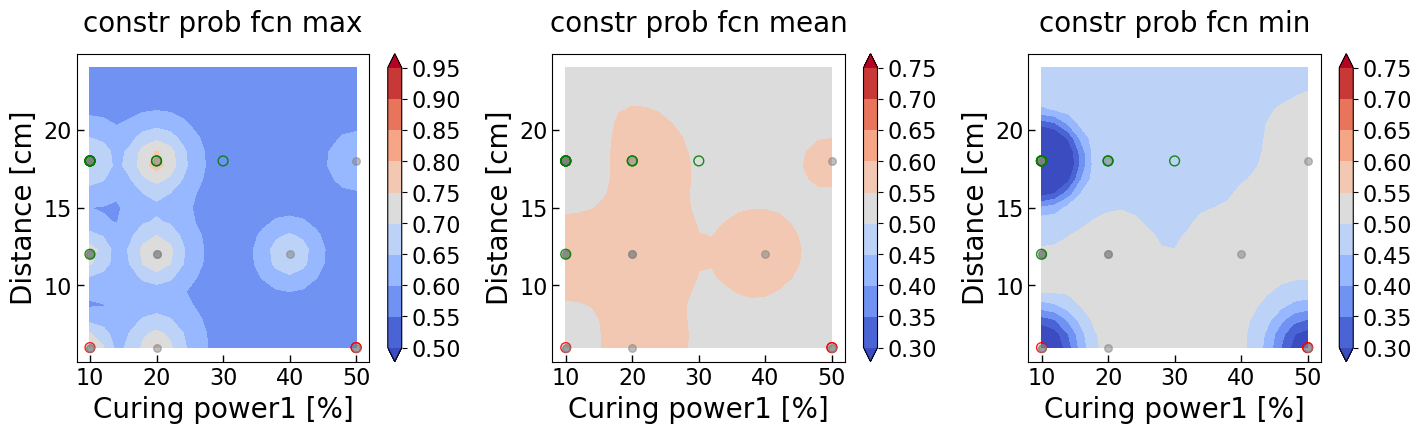

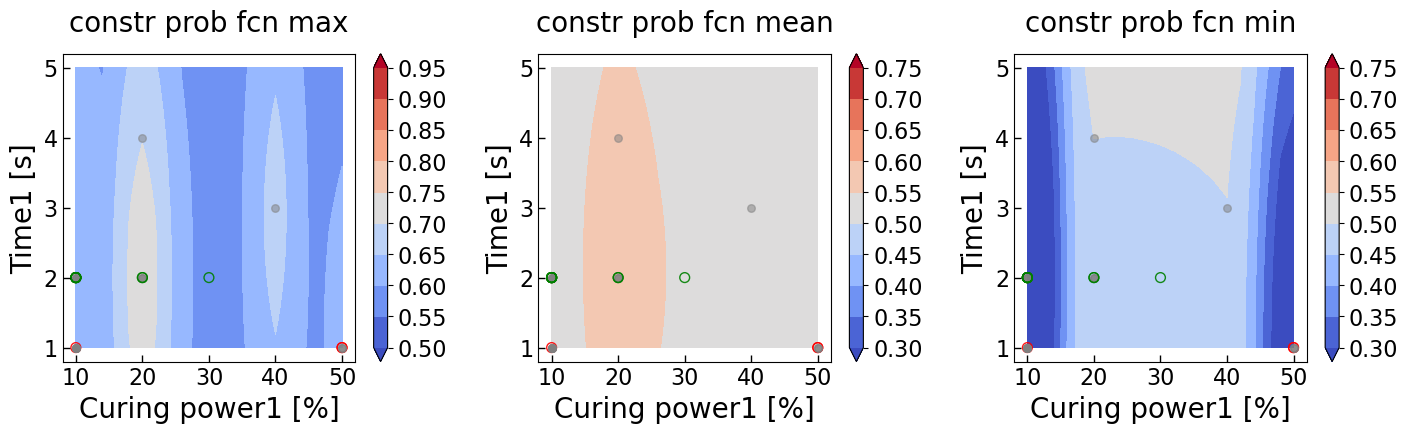

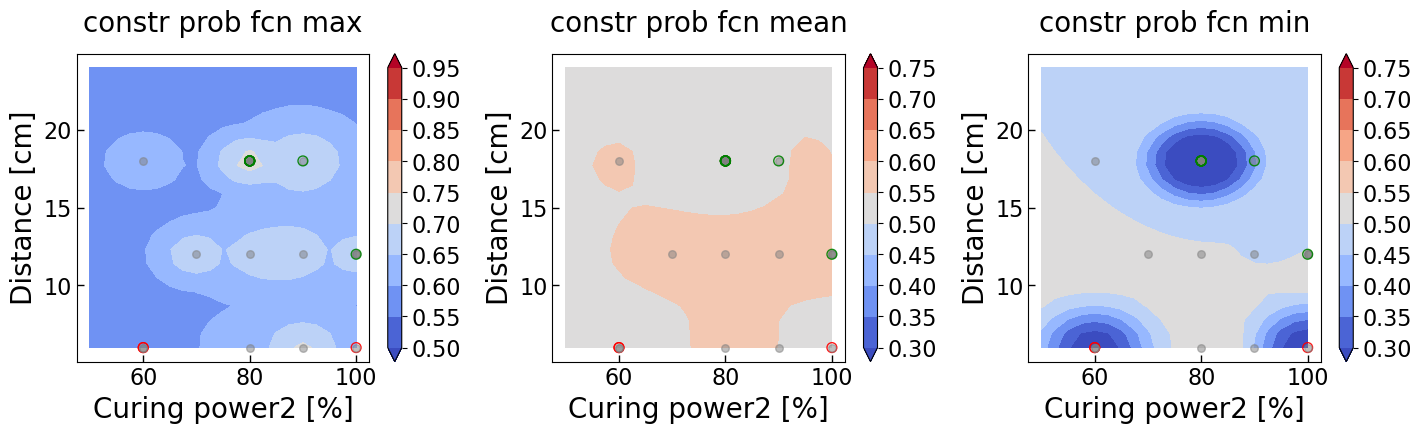

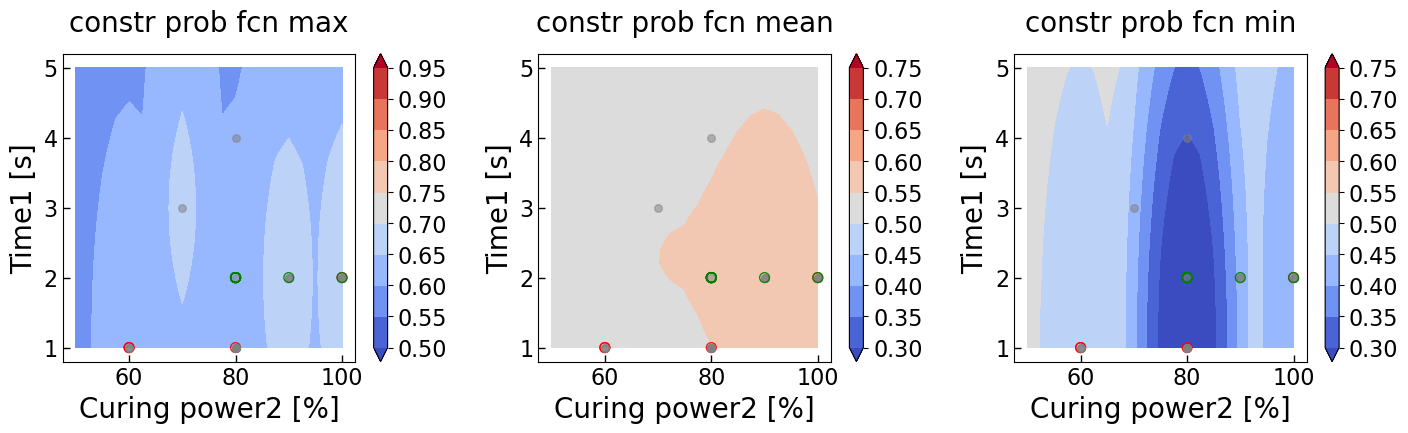

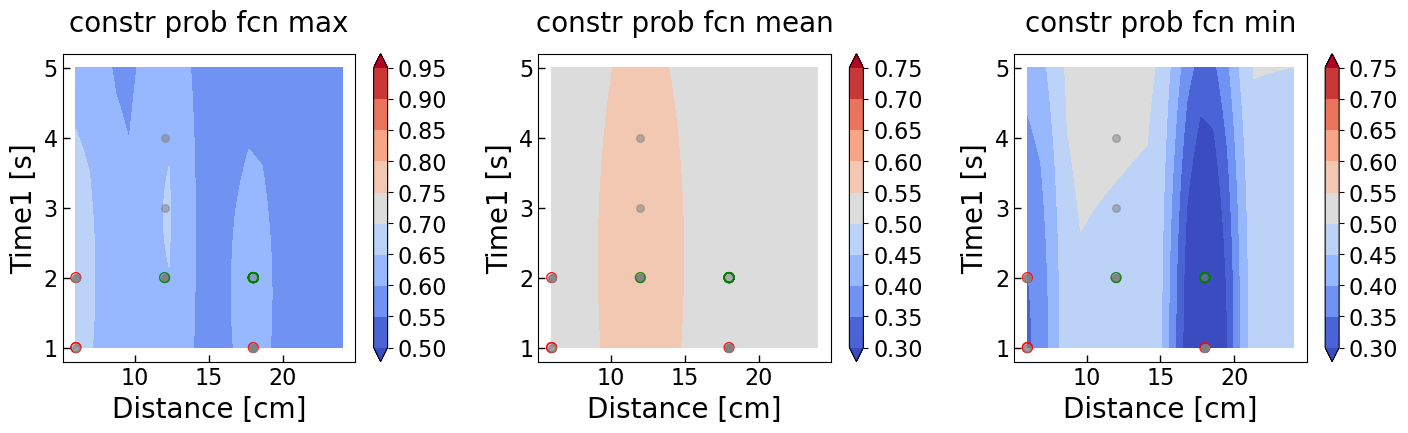

In [149]:
design = RandomDesign(parameter_space)
x_sampled = design.get_samples(200)
x_columns = df_film.iloc[:,1:-2].columns
for i in range(input_dim):
    for j in range(input_dim-i-1):
        ind1 = i
        ind2 = j+i+1
        if ind2 >= len(x_columns):
            continue  
        n_steps =21
        x1x2y_pred, x1x2y_var =[[],[]]
        for x1 in np.linspace(0, 1, n_steps):
            for x2 in np.linspace(0, 1, n_steps):
                x_GQDs = np.copy(x_sampled)
                x_GQDs[:,ind1] = x1
                x_GQDs[:,ind2] = x2
                yc_pr = f_cons_pr(x_GQDs)
                x1_org = x_denormalizer(x_GQDs)[0,ind1]
                x2_org = x_denormalizer(x_GQDs)[0,ind2]
                x1x2y_pred.append([x1_org, x2_org, np.max(yc_pr), np.mean(yc_pr), np.min(yc_pr)])
                
        x1c = np.array(x1x2y_pred, dtype=object)[:,0].reshape(n_steps, n_steps)
        x2c = np.array(x1x2y_pred, dtype=object)[:,1].reshape(n_steps, n_steps)
        yc_pr_max = np.array(x1x2y_pred, dtype=object)[:,2].reshape(n_steps, n_steps)
        yc_pr_mean = np.array(x1x2y_pred, dtype=object)[:,3].reshape(n_steps, n_steps)
        yc_pr_min = np.array(x1x2y_pred, dtype=object)[:,4].reshape(n_steps, n_steps)

        fs = 20
        title_pad = 16
        
        fig,axes = plt.subplots(1, 3, figsize=(17, 4), sharey = False, sharex = False)
        colorbar_offset = [0.5, 0.3, 0.3]
        for ax, y, c_offset in zip(axes, [yc_pr_max, yc_pr_mean, yc_pr_min],colorbar_offset):
            c_plt1 = ax.contourf(x1c, x2c, y,levels = np.arange(10)*0.05+c_offset, cmap='coolwarm', extend = 'both')# 
            cbar = fig.colorbar(c_plt1, ax= ax)
            cbar.ax.tick_params(labelsize=fs*0.8)
            ax.scatter(x_denormalizer(Xc[Yc[:,-1]==0])[:, ind1], 
                   x_denormalizer(Xc[Yc[:,-1]==0])[:, ind2], 
                   s = 50, facecolors='none', alpha = 0.9, edgecolor = 'red')
            ax.scatter(x_denormalizer(Xc)[:, ind1], 
                       x_denormalizer(Xc)[:, ind2], 
                       s = 30, facecolors='gray', alpha = 0.5, edgecolor = 'gray')
            ax.scatter(x_denormalizer(X_new)[:, ind1], 
                       x_denormalizer(X_new)[:, ind2], 
                       s = 50, facecolors='none', alpha = 0.9, edgecolor = 'green')

            ax.set_xlabel(str(x_columns[ind1]), fontsize = fs)
            ax.set_ylabel(str(x_columns[ind2]), fontsize = fs)

            x1_delta = (np.max(x1c)-np.min(x1c))*0.05
            x2_delta = (np.max(x2c)-np.min(x2c))*0.05
            ax.set_xlim(np.min(x1c)-x1_delta, np.max(x1c)+x1_delta)
            ax.set_ylim(np.min(x2c)-x2_delta, np.max(x2c)+x2_delta)
            ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            if ind1==0:#GQDs-30 amount
                ax.set_xticks([10,20, 30, 40, 50])
            if ind1==1:#VVacuum distillation time
                ax.set_xticks([60, 120, 180, 240,300])
            if ind1==4:#Curing power1
                ax.set_xticks([10, 20, 30, 40, 50])
            if ind2==5:#Curing power2
                ax.set_yticks([60, 70, 80, 90, 100])
            #axes[i].grid(True, linestyle='-.')

        axes[0].set_title('constr prob fcn max', pad = title_pad, fontsize = fs)
        axes[1].set_title('constr prob fcn mean', pad = title_pad, fontsize = fs)
        axes[2].set_title('constr prob fcn min', pad = title_pad, fontsize = fs)
        plt.subplots_adjust(wspace = 0.3)
        plt.show()